# Stock Market Data Exploratory Data Analysis
This Jupyter notebook is intended for the exploratory data analysis of stock market data ranging from 2010 to 2017. The objective is to uncover insights, patterns, and anomalies in the data to inform subsequent feature engineering and predictive modeling steps.

## Table of Contents
- Introduction
- Data Loading
- Data Overview
- Features Description
- Univariate Analysis
- Correlation Analysis
- Missing Values Handling
- Prepare Data
- Summary and Conclusions

## Introduction
Provide an overview of the dataset, the scope of the analysis, and the objectives you aim to achieve with this EDA.

In [228]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [102]:
dir = '../data/raw/'
data_set = ['Processed_NYSE.csv', 'Processed_NASDAQ.csv', 'Processed_DJI.csv', 'Processed_S&P.csv', 'Processed_RUSSELL.csv']
dfs_list = []

# Load the dataset
for file_name in data_set:
    df = pd.read_csv(dir + file_name)
    dfs_list.append(df)
    print(df.head(2))

         Date        Close    Volume       mom  mom1  mom2  mom3  ROC_5  \
0  2009-12-31  7184.959961       NaN       NaN   NaN   NaN   NaN    NaN   
1  2010-01-04  7326.740234  0.921723  0.019733   NaN   NaN   NaN    NaN   

   ROC_10  ROC_15  ...   NZD  silver-F  RUSSELL-F  S&P-F   CHF  \
0     NaN     NaN  ...  0.03      0.26      -1.08  -1.00 -0.11   
1     NaN     NaN  ...  1.52      3.26       1.61   1.62 -0.57   

   Dollar index-F  Dollar index  wheat-F   XAG   XAU  
0           -0.08         -0.06    -0.48  0.30  0.39  
1           -0.59         -0.42     3.12  3.91  2.10  

[2 rows x 84 columns]
         Date        Close    Volume       mom  mom1  mom2  mom3  ROC_5  \
0  2009-12-31  2269.149902       NaN       NaN   NaN   NaN   NaN    NaN   
1  2010-01-04  2308.419922  0.560308  0.017306   NaN   NaN   NaN    NaN   

   ROC_10  ROC_15  ...   NZD  silver-F  RUSSELL-F  S&P-F   CHF  \
0     NaN     NaN  ...  0.03      0.26      -1.08  -1.00 -0.11   
1     NaN     NaN  ...  1.52 

## Data Overview

### General Properties
- Data shape
- Data types
- Descriptive statistics


In [84]:
# data shape
for df in dfs_list:
    print("Data Shape:", df.shape)

Data Shape: (1984, 84)
Data Shape: (1984, 84)
Data Shape: (1984, 84)
Data Shape: (1984, 84)
Data Shape: (1984, 84)


In [85]:
# Columns in each df
for df in dfs_list:
    print(list(df.columns))
    print("\n")

['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA', 'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'JPM', 'MSFT', 'WFC', 'XOM', 'FCHI', 'FTSE', 'GDAXI', 'DJI', 'HSI', 'IXIC', 'SSEC', 'S&P', 'RUT', 'TE1', 'TE2', 'TE3', 'TE5', 'TE6', 'DE1', 'DE2', 'DE4', 'DE5', 'DE6', 'CTB3M', 'CTB6M', 'CTB1Y', 'Name', 'AUD', 'Brent', 'CAC-F', 'copper-F', 'WIT-oil', 'DAX-F', 'DJI-F', 'EUR', 'FTSE-F', 'gold-F', 'HSI-F', 'KOSPI-F', 'NASDAQ-F', 'GAS-F', 'Nikkei-F', 'NZD', 'silver-F', 'RUSSELL-F', 'S&P-F', 'CHF', 'Dollar index-F', 'Dollar index', 'wheat-F', 'XAG', 'XAU']


['Date', 'Close', 'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'ROC_5', 'ROC_10', 'ROC_15', 'ROC_20', 'EMA_10', 'EMA_20', 'EMA_50', 'EMA_200', 'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10', 'Oil', 'Gold', 'DAAA', 'DBAA', 'GBP', 'JPY', 'CAD', 'CNY', 'AAPL', 'AMZN', 'GE', 'JNJ', 'J

## Features Description

Based on the paper provided this is the description for each feature/col:


| #   | Feature  | Description                                                          | Type                | Source / Calculation   |
|-----|----------|----------------------------------------------------------------------|---------------------|------------------------|
| 1   | Day      | which day of week                                                    | Primitive           | Pandas                 |
| 2   | Close    | Close price                                                          | Primitive           | Yahoo Finance          |
| 3   | Vol      | Relative change of volume                                            | Technical Indicator | TA-Lib                 |
| 4   | MOM-1    | Return of 2 days before                                              | Technical Indicator | TA-Lib                 |
| 5   | MOM-2    | Return of 3 days before                                              | Technical Indicator | TA-Lib                 |
| 6   | MOM-3    | Return of 4 days before                                              | Technical Indicator | TA-Lib                 |
| 7   | ROC-5    | 5 days Rate of Change                                                | Technical Indicator | TA-Lib                 |
| 8   | ROC-10   | 10 days Rate of Change                                               | Technical Indicator | TA-Lib                 |
| 9   | ROC-15   | 15 days Rate of Change                                               | Technical Indicator | TA-Lib                 |
| 10  | ROC-20   | 20 days Rate of Change                                               | Technical Indicator | TA-Lib                 |
| 11  | EMA-10   | 10 days Exponential Moving Average                                   | Technical Indicator | TA-Lib                 |
| 12  | EMA-20   | 20 days Exponential Moving Average                                   | Technical Indicator | TA-Lib                 |
| 13  | EMA-50   | 50 days Exponential Moving Average                                   | Technical Indicator | TA-Lib                 |
| 14  | EMA-200  | 200 days Exponential Moving Average                                  | Technical Indicator | TA-Lib                 |
| 15  | DTB4WK   | 4-Week Treasury Bill: Secondary Market Rate                          | Other               | FRED                   |
| 16  | DTB3     | 3-Month Treasury Bill: Secondary Market Rate                         | Other               | FRED                   |
| 17  | DTB6     | 6-Month Treasury Bill: Secondary Market Rate                         | Other               | FRED                   |
| 18  | DGS5     | 5-Year Treasury Constant Maturity Rate                               | Other               | FRED                   |
| 19  | DGS10    | 10-Year Treasury Constant Maturity Rate                              | Other               | FRED                   |
| 20  | DAAA     | Moody's Seasoned Aaa Corporate Bond Yield                            | Other               | FRED                   |
| 21  | DBAA     | Moody's Seasoned Baa Corporate Bond Yield                            | Other               | FRED                   |
| 22  | TE1      | DGS10-DTB4WK                                                         | Other               | FRED                   |
| 23  | TE2      | DGS10-DTB3                                                           | Other               | FRED                   |
| 24  | TE3      | DGS10-DTB6                                                           | Other               | FRED                   |
| 25  | TE5      | DTB3-DTB4WK                                                          | Other               | FRED                   |
| 26  | TE6      | DTB6-DTB4WK                                                          | Other               | FRED                   |
| 27  | DE1      | DBAA-BAAA                                                            | Other               | FRED                   |
| 28  | DE2      | DBAA-DGS10                                                           | Other               | FRED                   |
| 29  | DE4      | DBAA-DTB6                                                            | Other               | FRED                   |
| 30  | DE5      | DBAA-DTB3                                                            | Other               | FRED                   |
| 31  | DE6      | DBAA-DTB4WK                                                          | Other               | FRED                   |
| 32  | CTB3M    | Change in the market yield on U.S. Treasury securities at 3-month constant maturity, quoted on investment basis | Other | FRED |
| 33  | CTB6M    | Change in the market yield on U.S. Treasury securities at 6-month constant maturity, quoted on investment basis | Other | FRED |
| 34  | CTB1Y    | Change in the market yield on U.S. Treasury securities at 1-year constant maturity, quoted on investment basis | Other | FRED |
| 35  | Oil      | Relative change of oil price (WTI), Oklahoma                         | Commodity           | FRED                   |
| 36  | Oil      | Relative change of oil price (Brent)                                 | Commodity           | Investing.com          |
| 37  | Oil      | Relative change of oil price (WTI)                                   | Commodity           | Investing.com          |
| 38  | Gold     | Relative change of gold price (London market)                        | Commodity           | FRED                   |
| 39  | Gold-F   | Relative change of gold price futures                                | Commodity           | Investing.com          |
| 40  | XAU-USD  | Relative change of gold spot U.S. dollar                             | Commodity           | Investing.com          |
| 41  | XAG-USD  | Relative change of silver spot U.S. dollar                           | Commodity           | Investing.com          |
| 42  | Gas      | Relative change of gas price                                         | Commodity           | Investing.com          |
| 43  | Silver   | Relative change of silver price                                      | Commodity           | Investing.com          |
| 44  | Copper   | Relative change of copper future                                     | Commodity           | Investing.com          |
| 45  | IXIC     | Return of NASDAQ Composite index                                     | World Indices       | Yahoo Finance          |
| 46  | GSPC     | Return of S&P 500 index                                              | World Indices       | Yahoo Finance          |
| 47  | DJI      | Return of Dow Jones Industrial Average                               | World Indices       | Yahoo Finance          |
| 48  | NYSE     | Return of NY stock exchange index                                    | World Indices       | Yahoo Finance          |
| 49  | RUSSELL  | Return of RUSSELL 2000 index                                         | World Indices       | Yahoo Finance          |
| 50  | HSI      | Return of Hang Seng index                                            | World Indices       | Yahoo Finance          |
| 51  | SSE      | Return of Shang Hai Stock Exchange Composite index                   | World Indices       | Yahoo Finance          |
| 52  | FCHI     | Return of CAC 40                                                     | World Indices       | Yahoo Finance          |
| 53  | FTSE     | Return of FTSE 100                                                   | World Indices       | Yahoo Finance          |
| 54  | GDAXI    | Return of DAX                                                        | World Indices       | Yahoo Finance          |
| 55  | USD-Y    | Relative change in US dollar to Japanese yen exchange rate           | Exchange Rate       | Yahoo Finance          |
| 56  | USD-GBP  | Relative change in US dollar to British pound exchange rate          | Exchange Rate       | Yahoo Finance          |
| 57  | USD-CAD  | Relative change in US dollar to Canadian dollar exchange rate        | Exchange Rate       | Yahoo Finance          |
| 58  | USD-CNY  | Relative change in US dollar to Chinese yuan exchange rate           | Exchange Rate       | Yahoo Finance          |
| 59  | USD-AUD  | Relative change in US dollar to Australian dollar exchange rate      | Exchange Rate       | Investing.com          |
| 60  | USD-NZD  | Relative change in US dollar to New Zealand dollar exchange rate     | Exchange Rate       | Investing.com          |
| 61  | USD-CHF  | Relative change in US dollar to Swiss franc exchange rate            | Exchange Rate       | Investing.com          |
| 62  | USD-EUR  | Relative change in US dollar to Euro exchange rate                   | Exchange Rate       | Investing.com          |
| 63  | USDX     | Relative change in US dollar index                                   | Exchange Rate       | Investing.com          |
| 64  | XOM      | Return of Exxon Mobil Corporation                                    | U.S. Companies      | Yahoo Finance          |
| 65  | JPM      | Return of JPMorgan Chase & Co.                                       | U.S. Companies      | Yahoo Finance          |
| 66  | AAPL     | Return of Apple Inc.                                                 | U.S. Companies      | Yahoo Finance          |
| 67  | MSFT     | Return of Microsoft Corporation                                      | U.S. Companies      | Yahoo Finance          |
| 68  | GE       | Return of General Electric Company                                   | U.S. Companies      | Yahoo Finance          |
| 69  | JNJ      | Return of Johnson & Johnson                                           | U.S. Companies      | Yahoo Finance          |
| 70  | WFC      | Return of Wells Fargo & Company                                      | U.S. Companies      | Yahoo Finance          |
| 71  | AMZN     | Return of Amazon.com Inc.                                            | U.S. Companies      | Yahoo Finance          |
| 72  | FCHI-F   | Return of CAC 40 Futures                                             | Futures             | Investing.com          |
| 73  | FTSE-F   | Return of FTSE 100 Futures                                           | Futures             | Investing.com          |
| 74  | GDAXI-F  | Return of DAX Futures                                                | Futures             | Investing.com          |
| 75  | HSI-F    | Return of Hang Seng index                                            | Futures             | Investing.com          |
| 76  | Nikkei-F | Return of Nikkei index                                               | Futures             | Investing.com          |
| 77  | KOSPI-F  | Return of Korean stock exchange                                      | Futures             | Investing.com          |
| 78  | IXIC-F   | Return of NASDAQ Composite index                                     | Futures             | Investing.com          |
| 79  | DJI-F    | Return of Dow Jones Industrial Average                               | Futures             | Investing.com          |
| 80  | S&P-F    | Return of S&P 500 index                                              | Futures             | Investing.com          |
| 81  | RUSSELL-F| Return of RUSSELL                                                    | Futures             | Investing.com          |
| 82  | USDX-F   | Relative change in US dollar index                                   | Futures             | Investing.com          |





In [22]:
dfs_list[0].describe(include='all')

Date         Close       Volume          mom         mom1  \
count         1984   1984.000000  1983.000000  1983.000000  1982.000000   
unique        1984           NaN          NaN          NaN          NaN   
top     2017-09-21           NaN          NaN          NaN          NaN   
freq             1           NaN          NaN          NaN          NaN   
mean           NaN   9465.266321     0.013520     0.000316     0.000318   
std            NaN   1564.079758     0.220261     0.009772     0.009774   
min            NaN   6434.810059    -1.000000    -0.070507    -0.070507   
25%            NaN   8043.210205    -0.085431    -0.003860    -0.003854   
50%            NaN   9780.470215    -0.001817     0.000517     0.000517   
75%            NaN  10793.117187     0.088964     0.005199     0.005199   
max            NaN  12430.519531     3.234605     0.052505     0.052505   

               mom2         mom3        ROC_5       ROC_10       ROC_15  ...  \
count   1981.000000  1980.000000  1979.000000  1974.000000  1969.000000  ...   
unique          NaN          NaN          NaN          NaN          NaN  ...   
top             NaN          NaN          NaN          NaN          NaN  ...   
freq            NaN          NaN          NaN          NaN          NaN  ...   
mean       0.000320     0.000320     0.152682     0.298220     0.450697  ...   
std        0.009776     0.009778     2.081131     2.712793     3.262844  ...   
min       -0.070507    -0.070507   -14.239148   -17.488337   -15.236372  ...   
25%       -0.003856    -0.003858    -0.841145    -1.012064    -1.169184  ...   
50%        0.000517     0.000519     0.269859     0.458845     0.720634  ...   
75%        0.005200     0.005202     1.292800     1.977991     2.479598  ...   
max        0.052505     0.052505     9.160839     9.392295    14.854859  ...   

                NZD     silver-F    RUSSELL-F        S&P-F          CHF  \
count   1984.000000  1984.000000  1984.000000  1984.000000  1984.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean      -0.001507    -0.047314     0.063634     0.043674    -0.002268   
std        0.752757     1.944127     1.254398     0.942540     0.742651   
min       -4.120000   -17.750000    -7.540000    -7.220000   -15.760000   
25%       -0.450000    -0.952500    -0.570000    -0.342500    -0.340000   
50%       -0.010000    -0.030000     0.120000     0.060000     0.000000   
75%        0.470000     0.930000     0.740000     0.500000     0.350000   
max        3.430000    12.810000     7.390000     5.440000     9.680000   

        Dollar index-F  Dollar index      wheat-F          XAG          XAU  
count      1984.000000   1984.000000  1982.000000  1984.000000  1984.000000  
unique             NaN           NaN          NaN          NaN          NaN  
top                NaN           NaN          NaN          NaN          NaN  
freq               NaN           NaN          NaN          NaN          NaN  
mean          0.010726      0.010338    -0.014743     0.010418     0.010025  
std           0.483800      0.495002     1.935339     1.832492     1.027910  
min          -2.390000     -4.280000   -11.060000   -12.930000    -8.490000  
25%          -0.270000     -0.270000    -1.190000    -0.840000    -0.520000  
50%           0.010000      0.000000    -0.085000     0.030000     0.020000  
75%           0.280000      0.280000     1.067500     0.920000     0.570000  
max           2.180000      3.980000    12.310000     6.530000     4.800000  

[11 rows x 84 columns]

In [24]:
# save it to read all of the cols
dfs_list[0].describe(include='all').to_csv(f"{data_set[0]}_describe.csv")

### Missing Values Analysis
- Missing features across dataframes 
- Count of NaNs across the dataset


In [18]:
# check if they have all the same set of features 
reference_columns = set(dfs_list[0].columns)

# Now check each dataframe against the reference
for df_name, df in zip(data_set,dfs_list):
    current_columns = set(df.columns)
    if current_columns != reference_columns:
        missing_columns = reference_columns.difference(current_columns)
        extra_columns = current_columns.difference(reference_columns)
        print(f"Dataframe '{df_name}' has some discrepancies.")
        if missing_columns:
            print(f"  Missing columns: {missing_columns}")
        if extra_columns:
            print(f"  Extra columns: {extra_columns}")
    else:
        print(f"Dataframe '{df_name}' has all the required columns.")

Dataframe 'Processed_NYSE.csv' has all the required columns.
Dataframe 'Processed_NASDAQ.csv' has some discrepancies.
  Missing columns: {'S&P', 'IXIC'}
  Extra columns: {'GSPC', 'NYSE'}
Dataframe 'Processed_DJI.csv' has some discrepancies.
  Missing columns: {'S&P', 'DJI'}
  Extra columns: {'GSPC', 'NYSE'}
Dataframe 'Processed_S&P.csv' has some discrepancies.
  Missing columns: {'S&P'}
  Extra columns: {'NYSE'}
Dataframe 'Processed_RUSSELL.csv' has some discrepancies.
  Missing columns: {'RUT'}
  Extra columns: {'NYSE'}


- So all have 84 cols , however some they have diffrent set of cols

         missing_count  missing_percentage
CAD                483           24.344758
JPY                479           24.143145
CNY                479           24.143145
GBP                478           24.092742
SSEC               238           11.995968
EMA_200            199           10.030242
HSI                170            8.568548
KOSPI-F             79            3.981855
HSI-F               75            3.780242
FTSE                71            3.578629
GDAXI               67            3.377016
EMA_50              49            2.469758
FCHI                40            2.016129
ROC_20              20            1.008065
EMA_20              19            0.957661
ROC_15              15            0.756048
ROC_10              10            0.504032
EMA_10               9            0.453629
FTSE-F               6            0.302419
ROC_5                5            0.252016


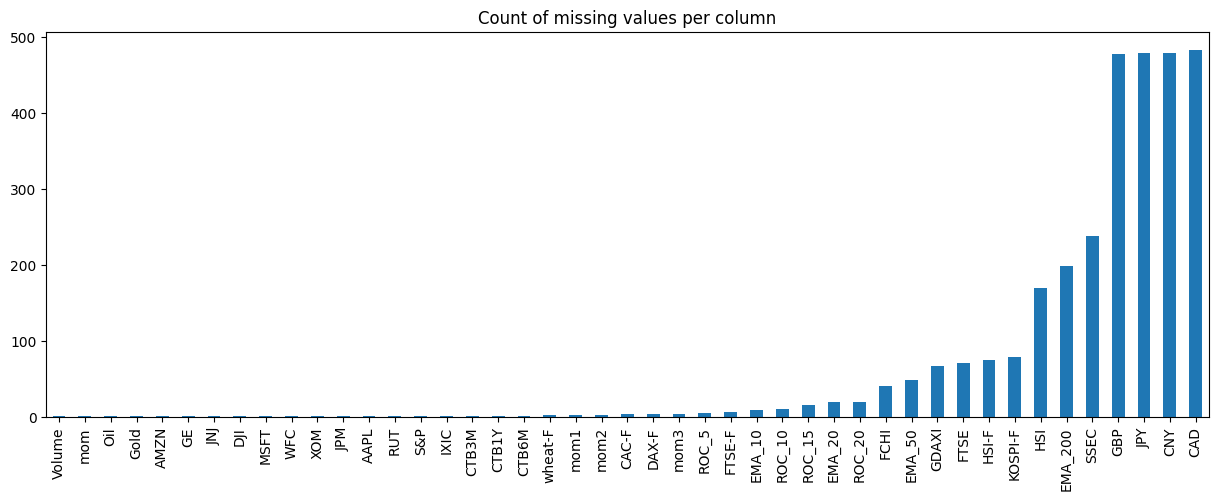

         missing_count  missing_percentage
CAD                483           24.344758
JPY                479           24.143145
CNY                479           24.143145
GBP                478           24.092742
SSEC               238           11.995968
EMA_200            199           10.030242
HSI                170            8.568548
KOSPI-F             79            3.981855
HSI-F               75            3.780242
FTSE                71            3.578629
GDAXI               67            3.377016
EMA_50              49            2.469758
FCHI                40            2.016129
ROC_20              20            1.008065
EMA_20              19            0.957661
ROC_15              15            0.756048
ROC_10              10            0.504032
EMA_10               9            0.453629
FTSE-F               6            0.302419
ROC_5                5            0.252016


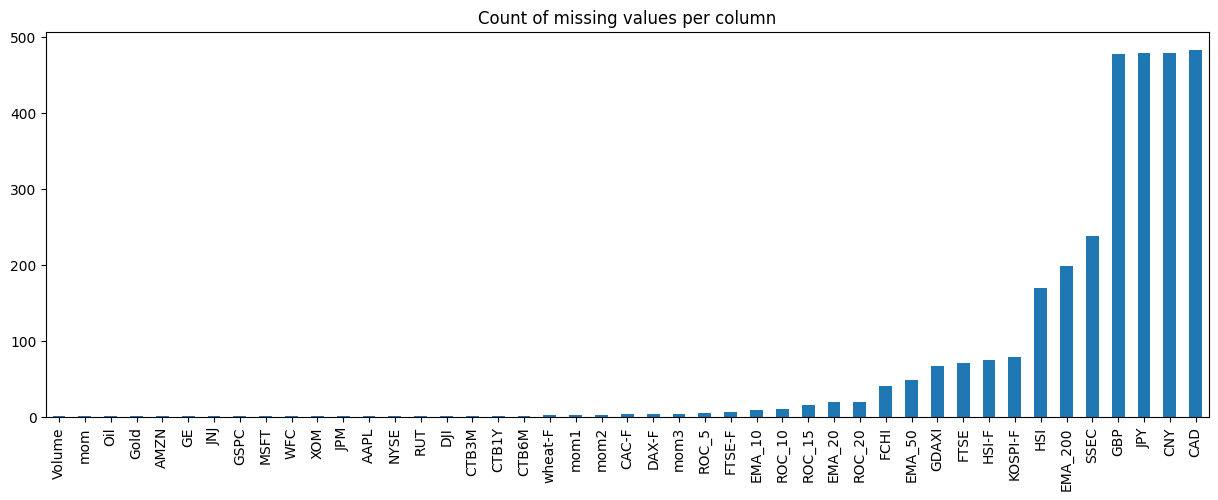

         missing_count  missing_percentage
CAD                483           24.344758
JPY                479           24.143145
CNY                479           24.143145
GBP                478           24.092742
SSEC               238           11.995968
EMA_200            199           10.030242
HSI                170            8.568548
KOSPI-F             79            3.981855
HSI-F               75            3.780242
FTSE                71            3.578629
GDAXI               67            3.377016
EMA_50              49            2.469758
FCHI                40            2.016129
ROC_20              20            1.008065
EMA_20              19            0.957661
ROC_15              15            0.756048
ROC_10              10            0.504032
EMA_10               9            0.453629
FTSE-F               6            0.302419
ROC_5                5            0.252016


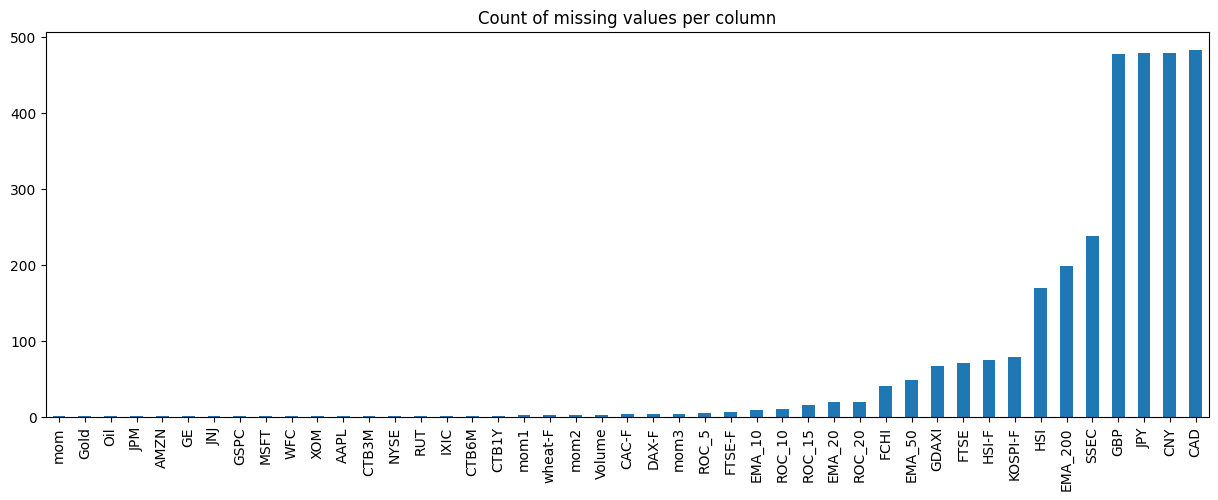

         missing_count  missing_percentage
CAD                483           24.344758
JPY                479           24.143145
CNY                479           24.143145
GBP                478           24.092742
SSEC               238           11.995968
EMA_200            199           10.030242
HSI                170            8.568548
KOSPI-F             79            3.981855
HSI-F               75            3.780242
FTSE                71            3.578629
GDAXI               67            3.377016
EMA_50              49            2.469758
FCHI                40            2.016129
ROC_20              20            1.008065
EMA_20              19            0.957661
ROC_15              15            0.756048
ROC_10              10            0.504032
EMA_10               9            0.453629
FTSE-F               6            0.302419
ROC_5                5            0.252016


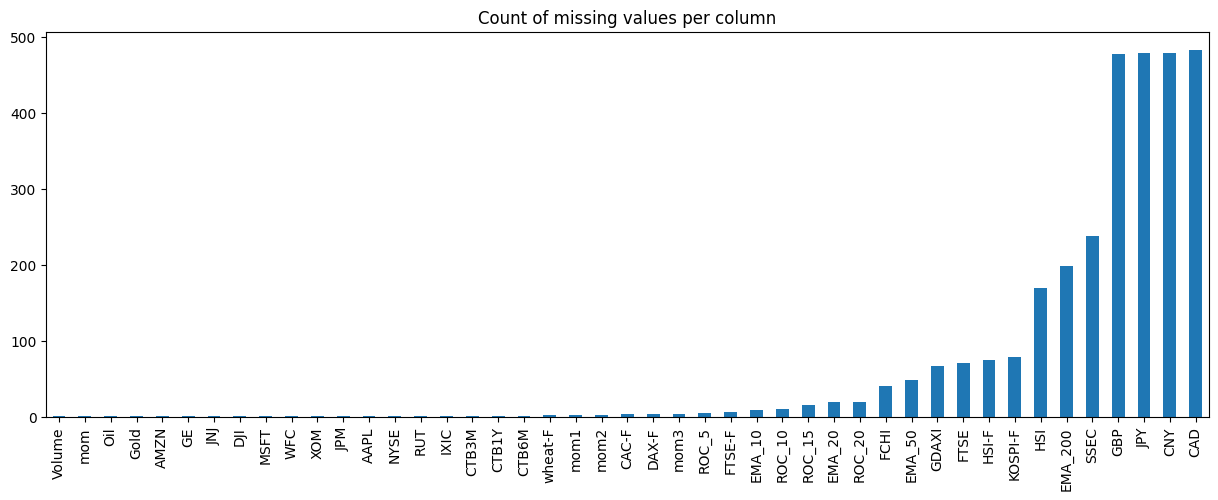

         missing_count  missing_percentage
CAD                483           24.344758
JPY                479           24.143145
CNY                479           24.143145
GBP                478           24.092742
SSEC               238           11.995968
EMA_200            199           10.030242
HSI                170            8.568548
KOSPI-F             79            3.981855
HSI-F               75            3.780242
FTSE                71            3.578629
GDAXI               67            3.377016
EMA_50              49            2.469758
FCHI                40            2.016129
ROC_20              20            1.008065
EMA_20              19            0.957661
ROC_15              15            0.756048
ROC_10              10            0.504032
EMA_10               9            0.453629
FTSE-F               6            0.302419
ROC_5                5            0.252016


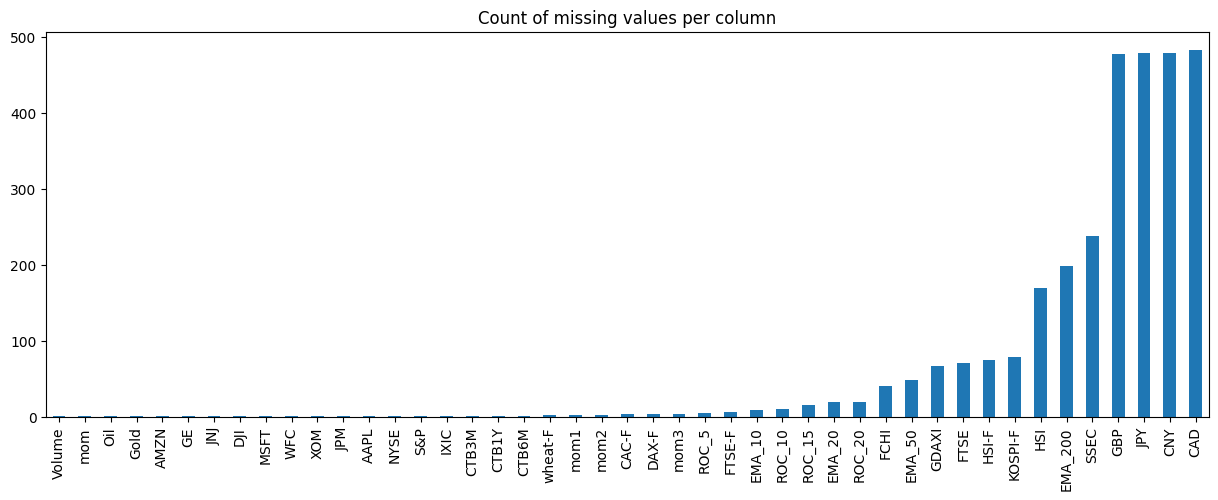

[None, None, None, None, None]

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_missing_data_analysis(data):
    # Calculate the number of missing values in each column
    missing_values_count = data.isnull().sum()
    
    # Calculate the percentage of missing values
    missing_values_percentage = (missing_values_count / len(data)) * 100
    
    # Create a dataframe with the count and percentage of missing values
    missing_data = pd.DataFrame({
    'missing_count': missing_values_count,
    'missing_percentage': missing_values_percentage
    }).sort_values(by='missing_percentage', ascending=False)
    
    # Display the missing data dataframe
    print(missing_data.head(20))
    
    # Plotting the missing values (only if there are any missing values)
    if missing_values_count.sum() > 0:
        plt.figure(figsize=(15, 5))
        missing_values_count[missing_values_count > 0].sort_values().plot(kind='bar')
        plt.title('Count of missing values per column')
        plt.show()

[get_missing_data_analysis(df) for df in dfs_list]

In [34]:
def get_count_of_rows_contains_null(data):
    # Count rows with any missing values
    rows_with_missing = data.isnull().any(axis=1).sum()
    
    # Print the count of rows with missing values
    print(f"Rows with at least one missing value: {rows_with_missing}")
    
    # Calculate the percentage of such rows
    rows_with_missing_percentage = (rows_with_missing / len(data)) * 100
    
    # Print the percentage of rows with missing values
    print(f"Percentage of rows with at least one missing value: {rows_with_missing_percentage:.2f}%")
[get_count_of_rows_contains_null(df) for df in dfs_list]

Rows with at least one missing value: 870
Percentage of rows with at least one missing value: 43.85%
Rows with at least one missing value: 870
Percentage of rows with at least one missing value: 43.85%
Rows with at least one missing value: 870
Percentage of rows with at least one missing value: 43.85%
Rows with at least one missing value: 870
Percentage of rows with at least one missing value: 43.85%
Rows with at least one missing value: 870
Percentage of rows with at least one missing value: 43.85%


[None, None, None, None, None]

In [40]:
dfs_list[0]

Date         Close    Volume       mom      mom1      mom2  \
0     2009-12-31   7184.959961       NaN       NaN       NaN       NaN   
1     2010-01-04   7326.740234  0.921723  0.019733       NaN       NaN   
2     2010-01-05   7354.870117 -0.375903  0.003839  0.019733       NaN   
3     2010-01-06   7377.700195  0.996234  0.003104  0.003839  0.019733   
4     2010-01-07   7393.930176  0.059932  0.002200  0.003104  0.003839   
...          ...           ...       ...       ...       ...       ...   
1979  2017-11-09  12339.660156 -0.017375 -0.003638  0.001089 -0.002393   
1980  2017-11-10  12322.599609 -0.089962 -0.001383 -0.003638  0.001089   
1981  2017-11-13  12316.820313 -0.024084 -0.000469 -0.001383 -0.003638   
1982  2017-11-14  12280.110352  0.070184 -0.002980 -0.000469 -0.001383   
1983  2017-11-15  12220.339844 -0.022755 -0.004867 -0.002980 -0.000469   

          mom3     ROC_5    ROC_10    ROC_15  ...  silver-F  RUSSELL-F  S&P-F  \
0          NaN       NaN       NaN       NaN  ...      0.26      -1.08  -1.00   
1          NaN       NaN       NaN       NaN  ...      3.26       1.61   1.62   
2          NaN       NaN       NaN       NaN  ...      1.96      -0.20   0.31   
3          NaN       NaN       NaN       NaN  ...      2.15      -0.02   0.07   
4     0.019733       NaN       NaN       NaN  ...      0.94       0.50   0.40   
...        ...       ...       ...       ...  ...       ...        ...    ...   
1979  0.002252 -0.269134 -0.103377 -0.328426  ...     -0.62      -0.34  -0.27   
1980 -0.002393 -0.407821 -0.354428 -0.868185  ...     -0.58      -0.20  -0.17   
1981  0.001089 -0.678251 -0.021506 -0.545844  ...      0.72      -0.04   0.10   
1982 -0.003638 -0.736705 -0.493472 -1.006691  ...      0.17      -0.21  -0.15   
1983 -0.001383 -1.327280 -1.152968 -0.942240  ...     -0.60      -0.46  -0.50   

       CHF  Dollar index-F  Dollar index  wheat-F   XAG   XAU   z_score  
0    -0.11           -0.08         -0.06    -0.48  0.30  0.39  0.369751  
1    -0.57           -0.59         -0.42     3.12  3.91  2.10  2.033739  
2     0.43            0.03          0.12    -0.90  1.42 -0.12 -0.126527  
3    -0.56           -0.24         -0.17     2.62  2.25  1.77  1.712619  
4     0.58            0.58          0.54    -1.85  0.22 -0.58 -0.574149  
...    ...             ...           ...      ...   ...   ...       ...  
1979 -0.61           -0.44         -0.45     0.53 -0.26  0.32  0.301634  
1980  0.18           -0.07         -0.05     0.70 -0.71 -0.80 -0.788230  
1981  0.06            0.12          0.11    -1.85  0.83  0.16  0.145939  
1982 -0.70           -0.71         -0.70     1.00  0.01  0.24  0.223787  
1983 -0.11            0.01         -0.02    -2.04 -0.22 -0.11 -0.116796  

[1984 rows x 85 columns]

### Outliers Detection
- Statistical methods or visualization to detect outliers

In [42]:
def get_outliers(data,col):
    data['z_score'] = stats.zscore(data[col])
    outliers = data[np.abs(data['z_score']) > 3]
    print(col)
    print("Number of outliers detected:", len(outliers))
    print(outliers[col])
    
numerical_columns = dfs_list[0].select_dtypes(include=['float64', 'int64']).columns

[get_outliers(dfs_list[0],col) for col in numerical_columns]


Close
Number of outliers detected: 0
Series([], Name: Close, dtype: float64)
Volume
Number of outliers detected: 0
Series([], Name: Volume, dtype: float64)
mom
Number of outliers detected: 0
Series([], Name: mom, dtype: float64)
mom1
Number of outliers detected: 0
Series([], Name: mom1, dtype: float64)
mom2
Number of outliers detected: 0
Series([], Name: mom2, dtype: float64)
mom3
Number of outliers detected: 0
Series([], Name: mom3, dtype: float64)
ROC_5
Number of outliers detected: 0
Series([], Name: ROC_5, dtype: float64)
ROC_10
Number of outliers detected: 0
Series([], Name: ROC_10, dtype: float64)
ROC_15
Number of outliers detected: 0
Series([], Name: ROC_15, dtype: float64)
ROC_20
Number of outliers detected: 0
Series([], Name: ROC_20, dtype: float64)
EMA_10
Number of outliers detected: 0
Series([], Name: EMA_10, dtype: float64)
EMA_20
Number of outliers detected: 0
Series([], Name: EMA_20, dtype: float64)
EMA_50
Number of outliers detected: 0
Series([], Name: EMA_50, dtype: floa

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [44]:
def get_IQR(data,col):
    # Calculate Q1, Q3, and IQR
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers using IQR
    outliers = data[(data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))]
    print(col)
    print("Number of outliers detected:", len(outliers))
    print(outliers[col])
[get_IQR(dfs_list[0],col) for col in numerical_columns]


Close
Number of outliers detected: 0
Series([], Name: Close, dtype: float64)
Volume
Number of outliers detected: 130
1       0.921723
2      -0.375903
3       0.996234
13      0.429000
23      0.367345
          ...   
1883   -0.386365
1888   -0.416261
1889    0.715965
1903    0.364695
1940    0.421358
Name: Volume, Length: 130, dtype: float64
mom
Number of outliers detected: 136
1       0.019733
13     -0.021197
14     -0.020050
23     -0.036174
30      0.020189
          ...   
1632   -0.020619
1633    0.018812
1684   -0.024701
1686   -0.019167
1725    0.020488
Name: mom, Length: 136, dtype: float64
mom1
Number of outliers detected: 136
2       0.019733
14     -0.021197
15     -0.020050
24     -0.036174
31      0.020189
          ...   
1633   -0.020619
1634    0.018812
1685   -0.024701
1687   -0.019167
1726    0.020488
Name: mom1, Length: 136, dtype: float64
mom2
Number of outliers detected: 136
3       0.019733
15     -0.021197
16     -0.020050
25     -0.036174
32      0.020189
   

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

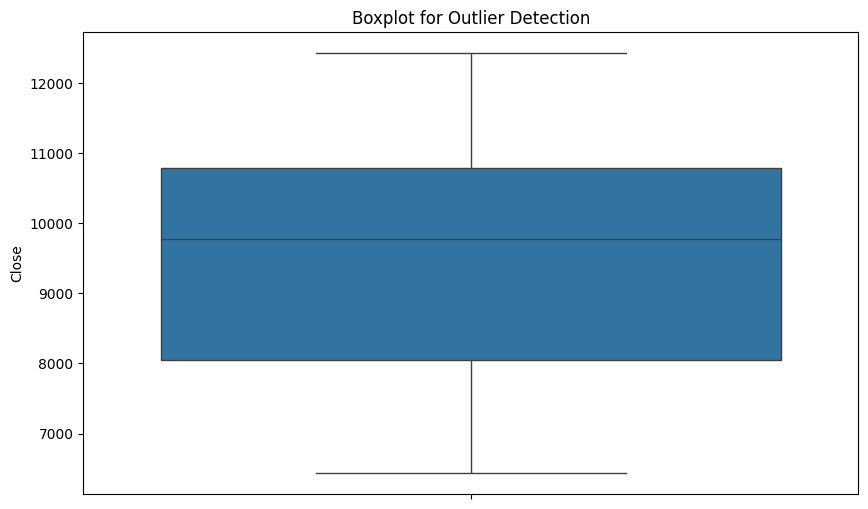

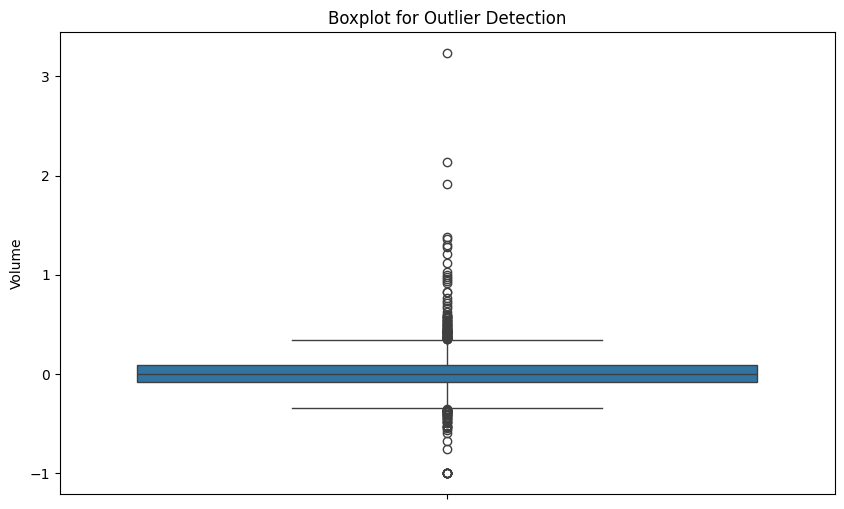

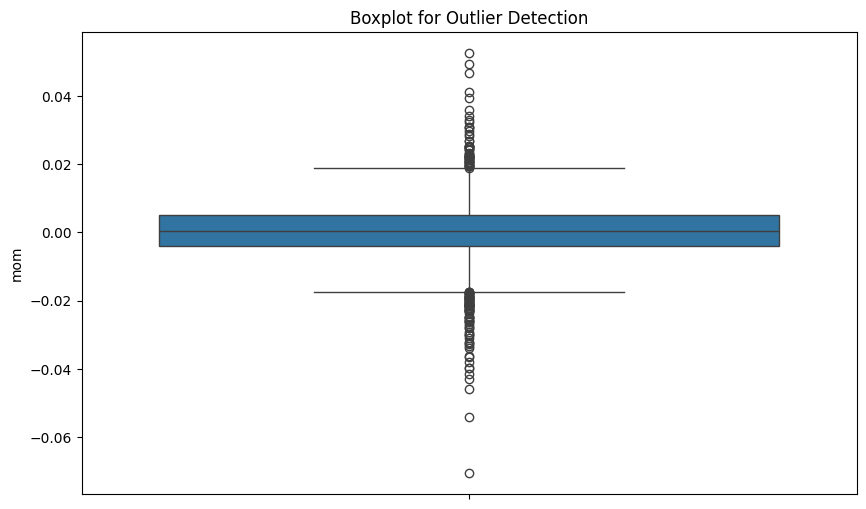

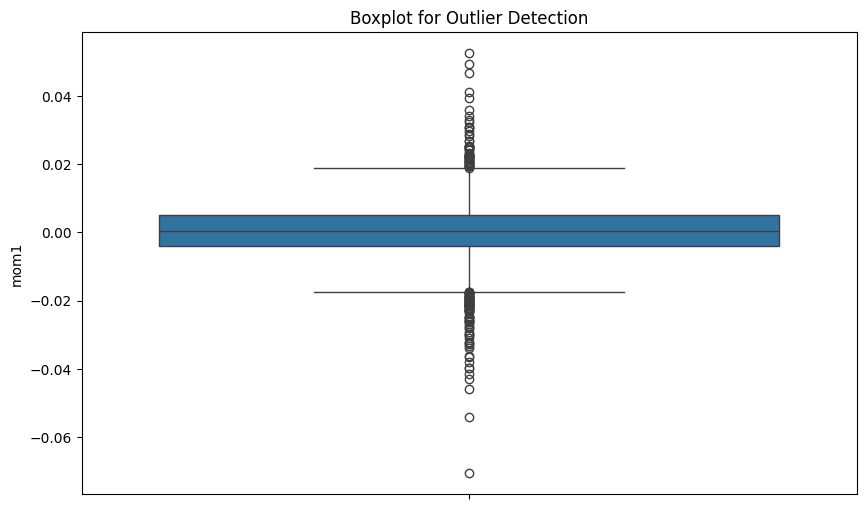

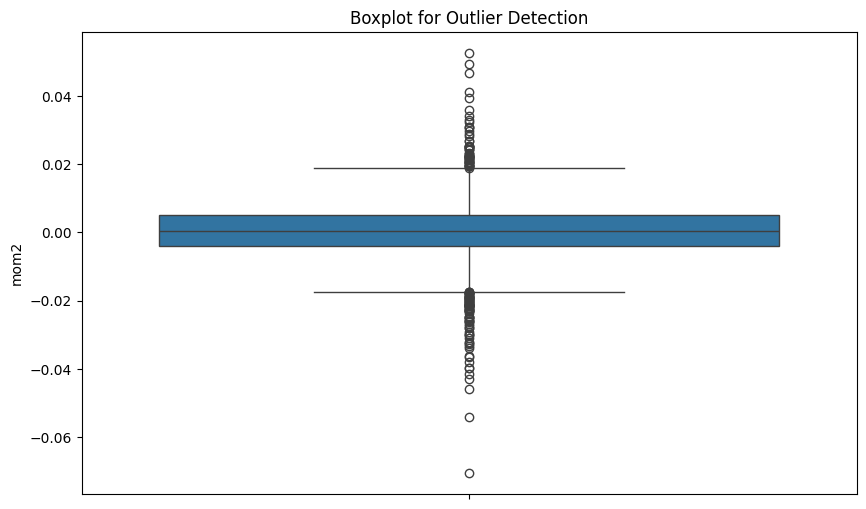

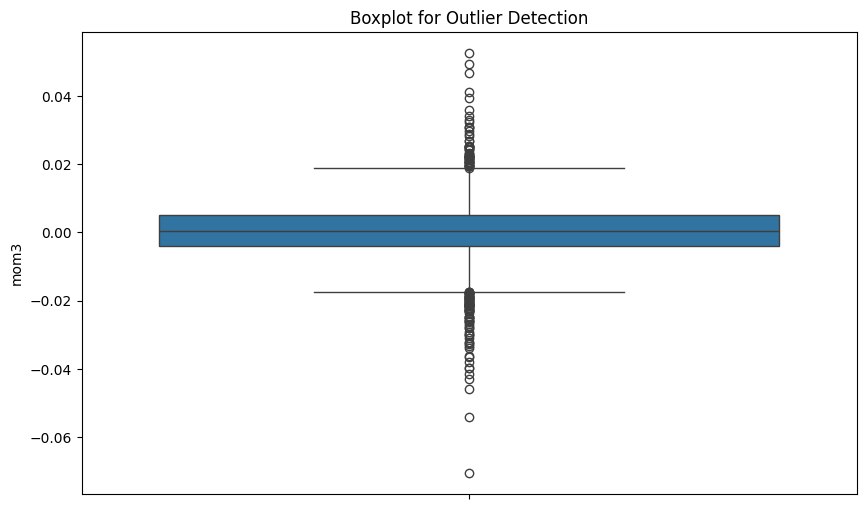

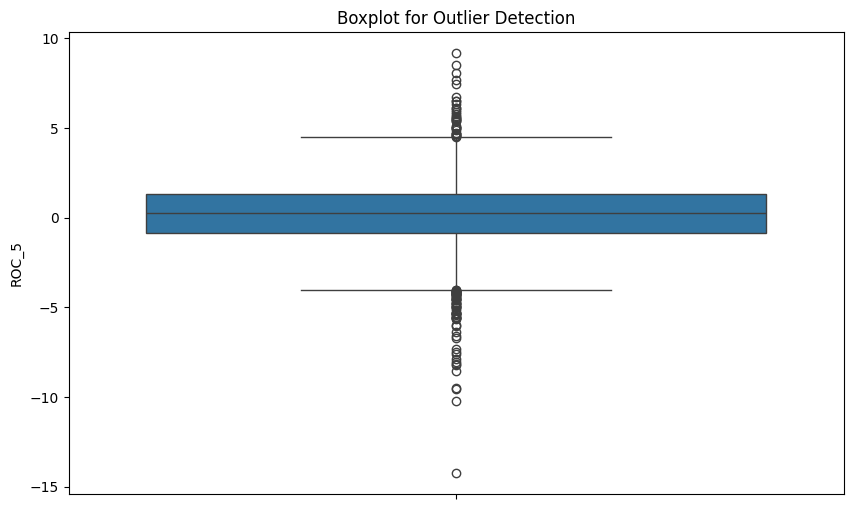

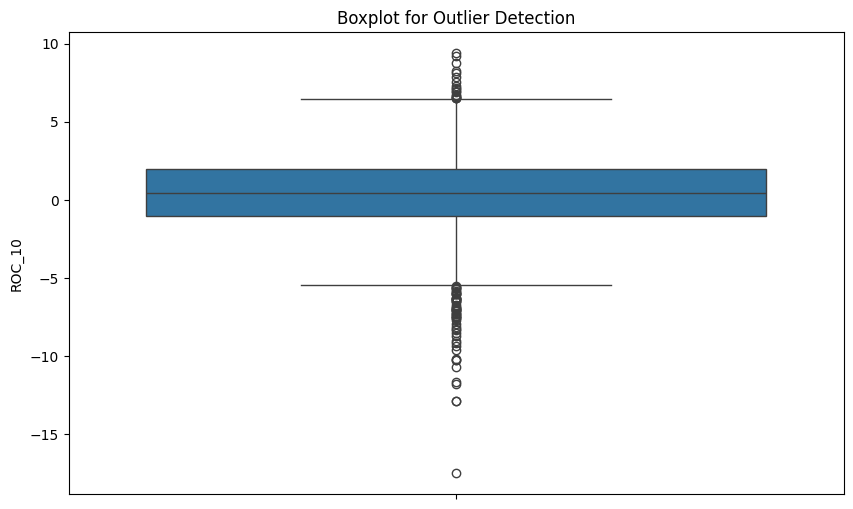

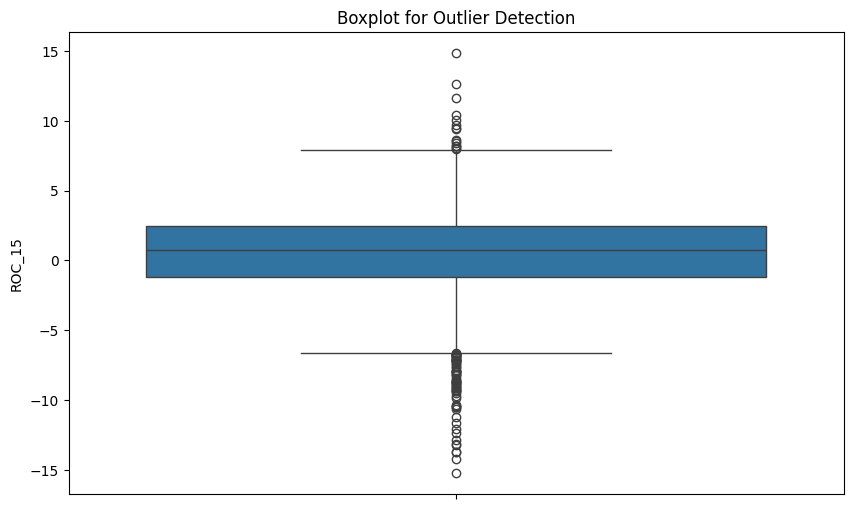

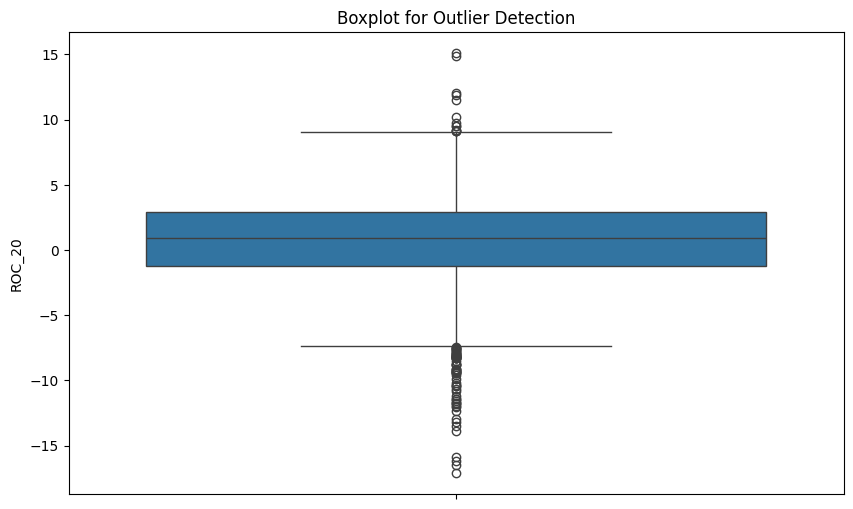

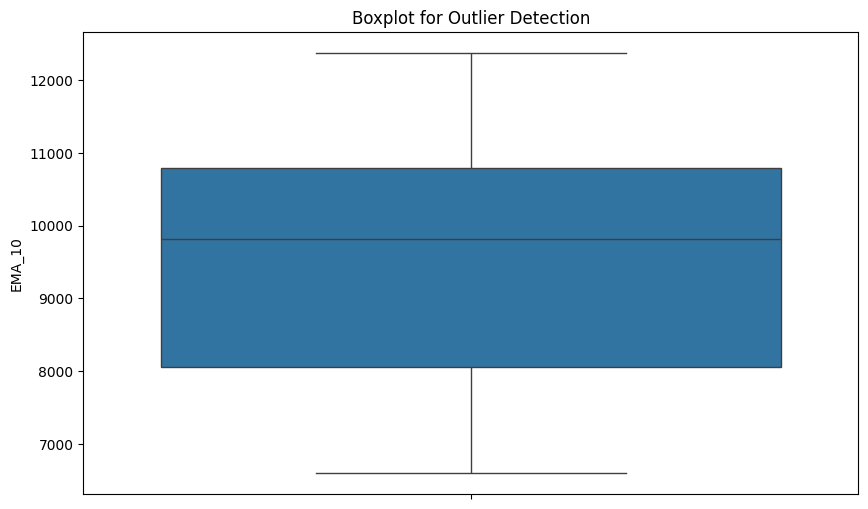

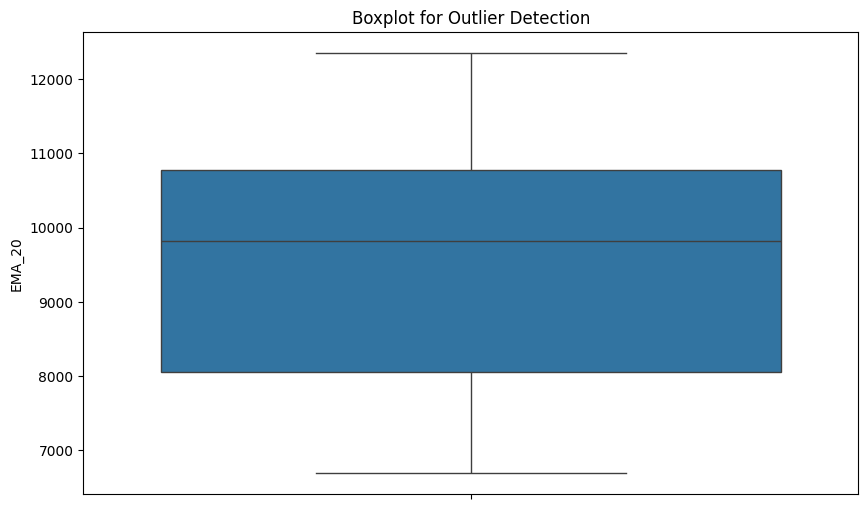

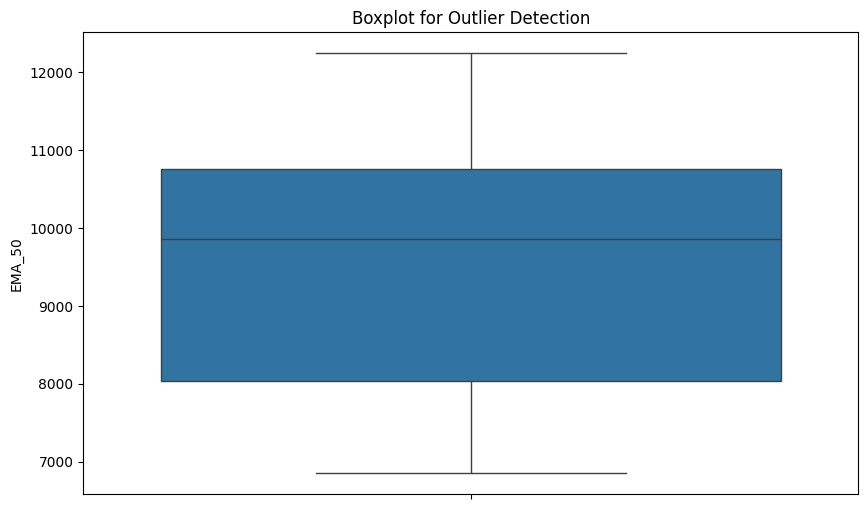

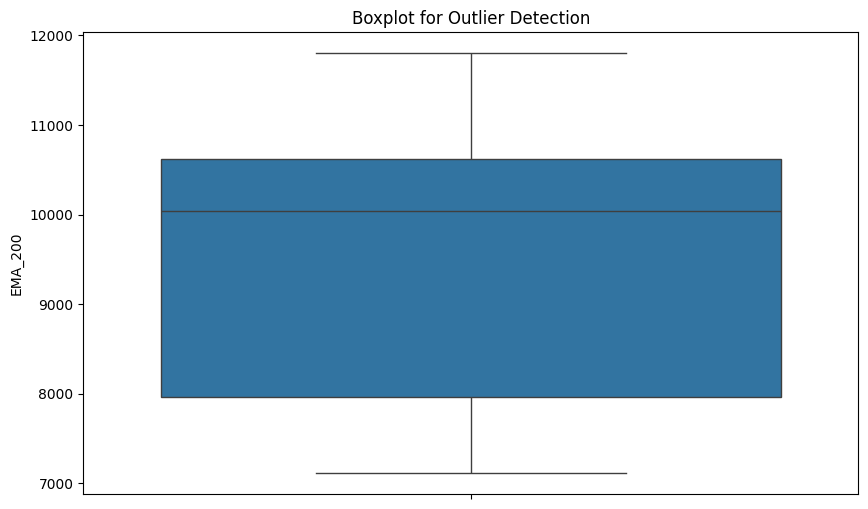

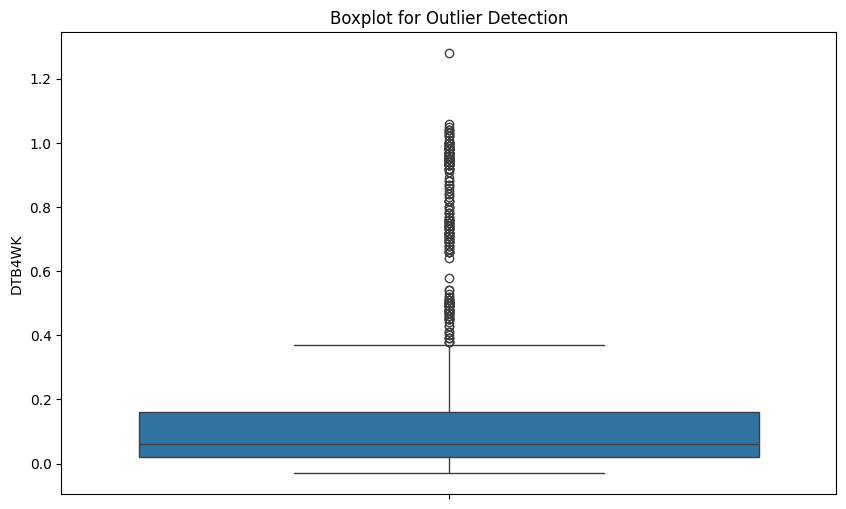

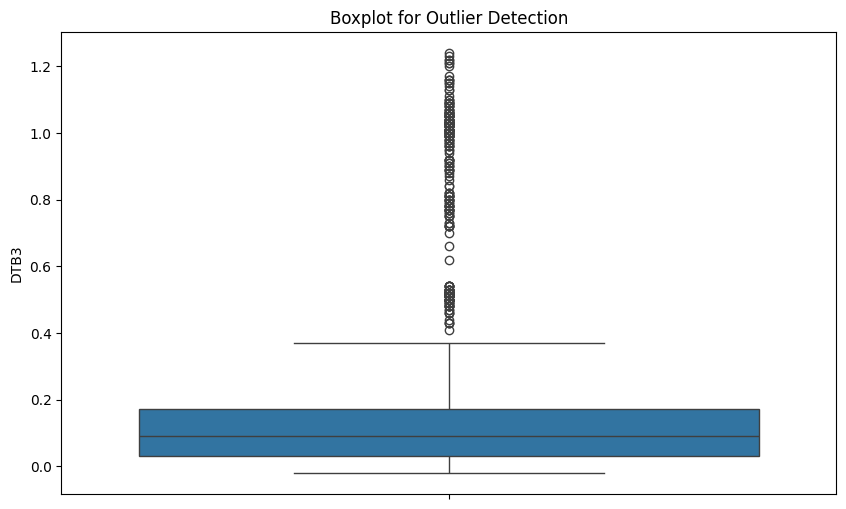

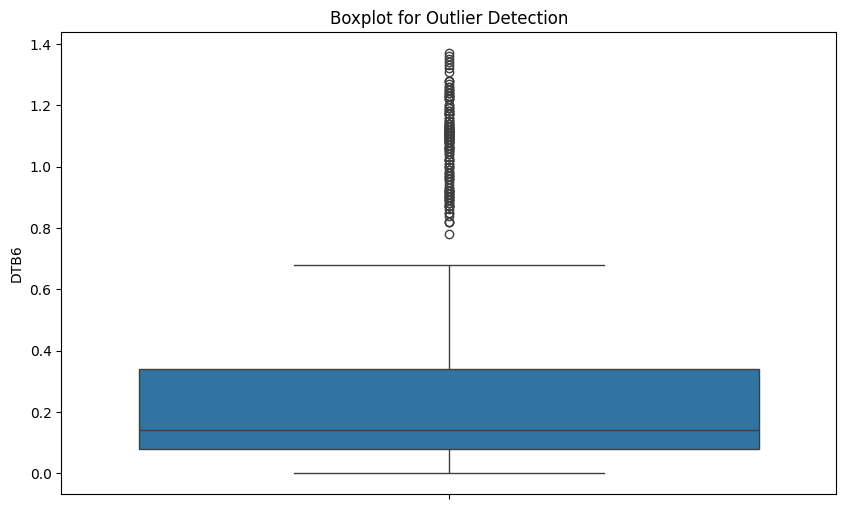

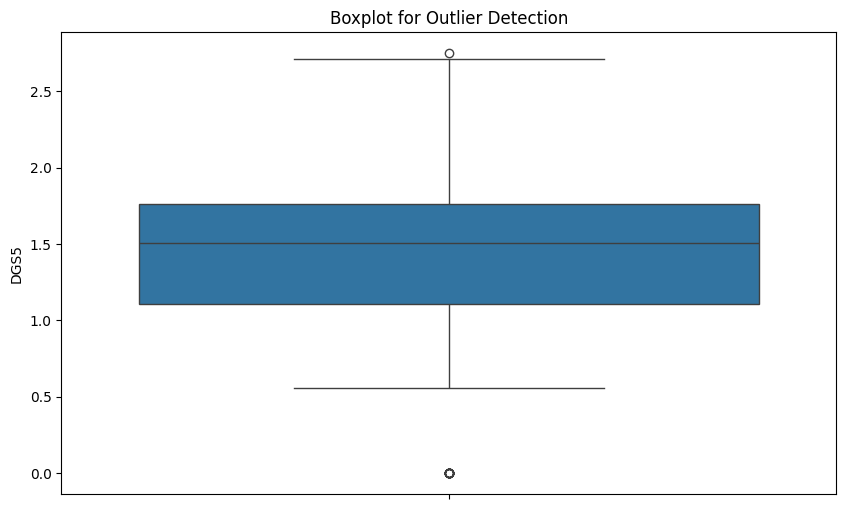

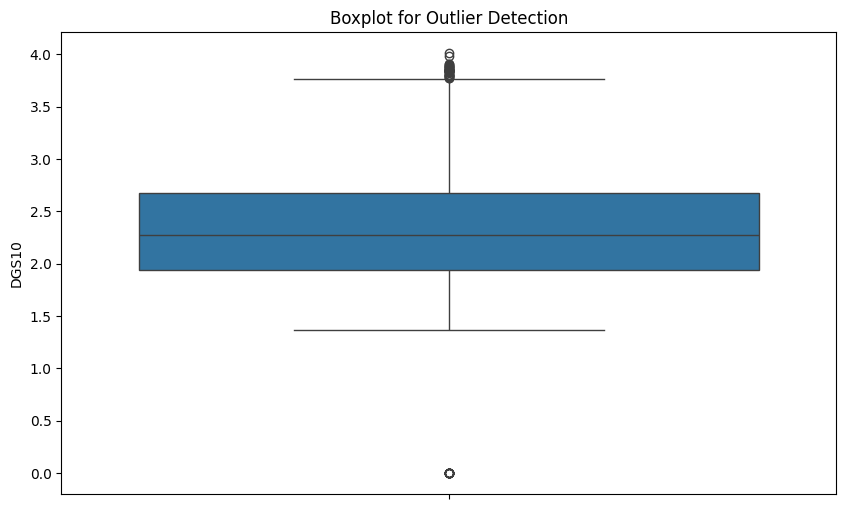

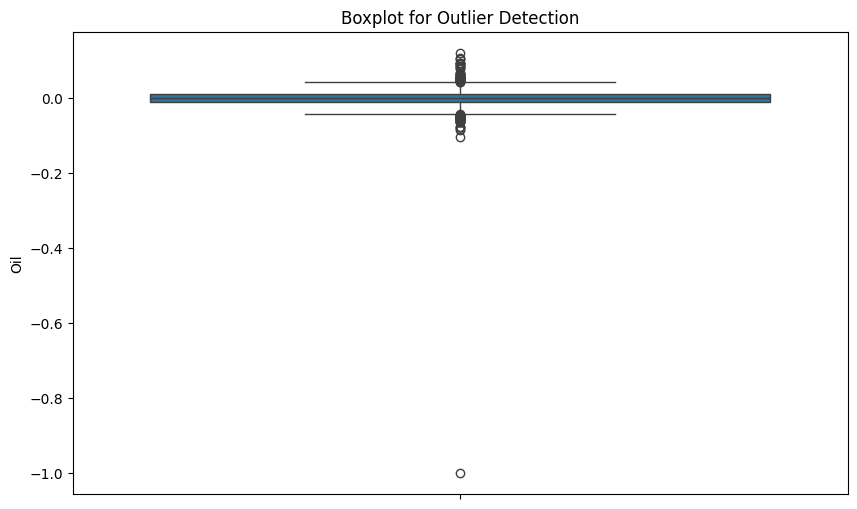

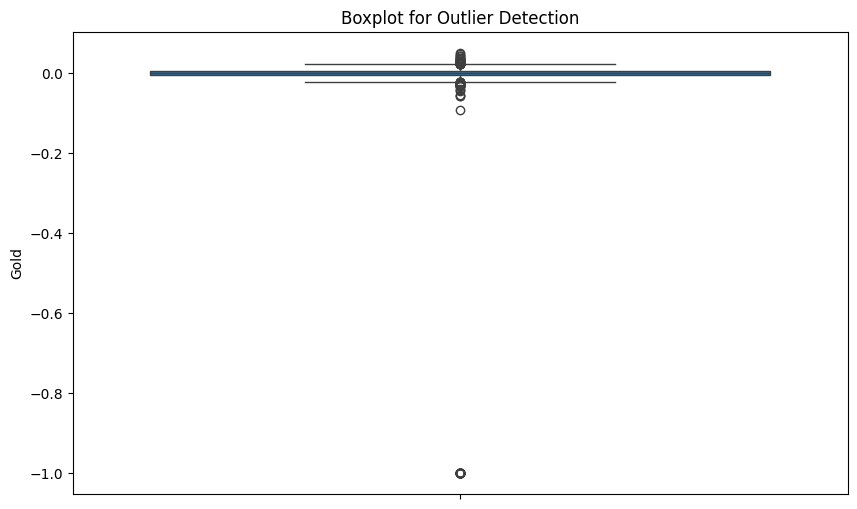

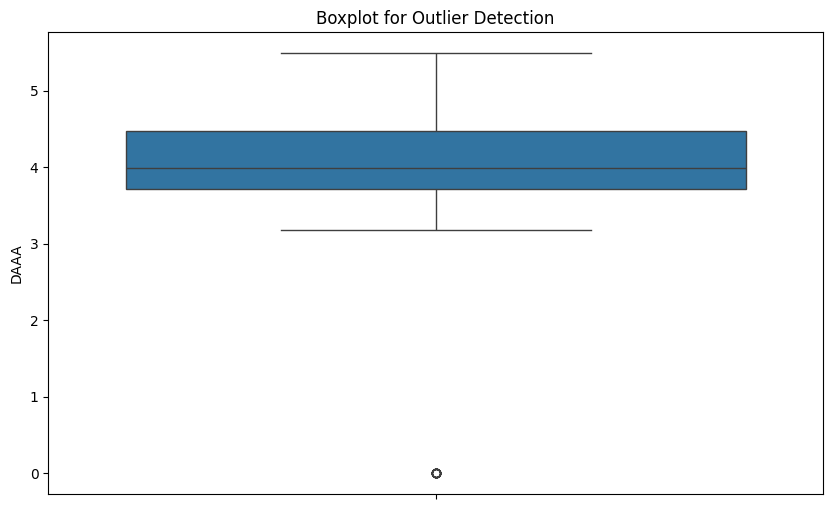

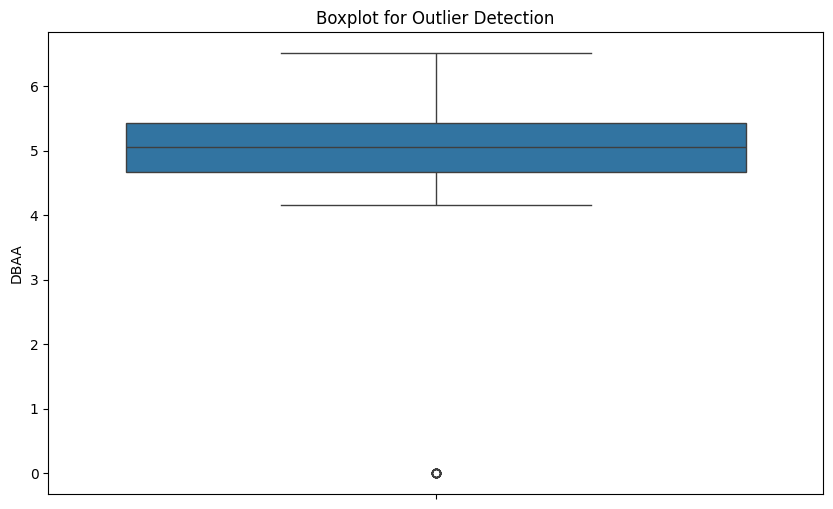

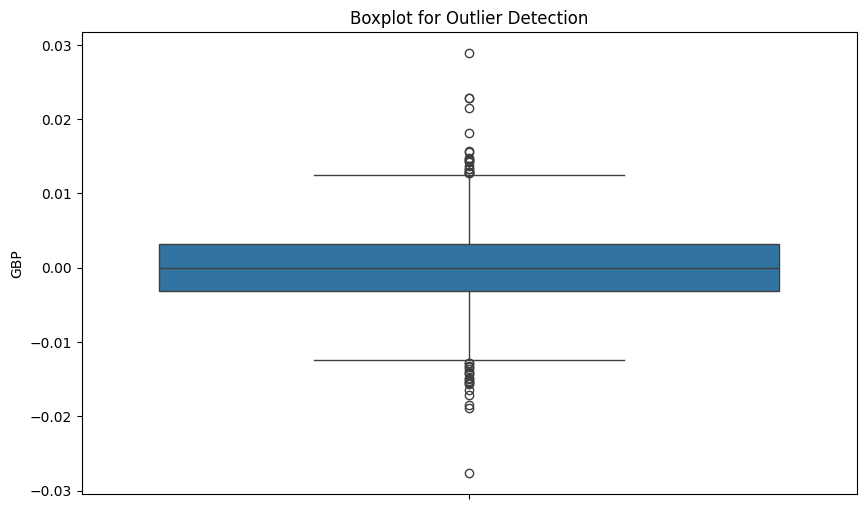

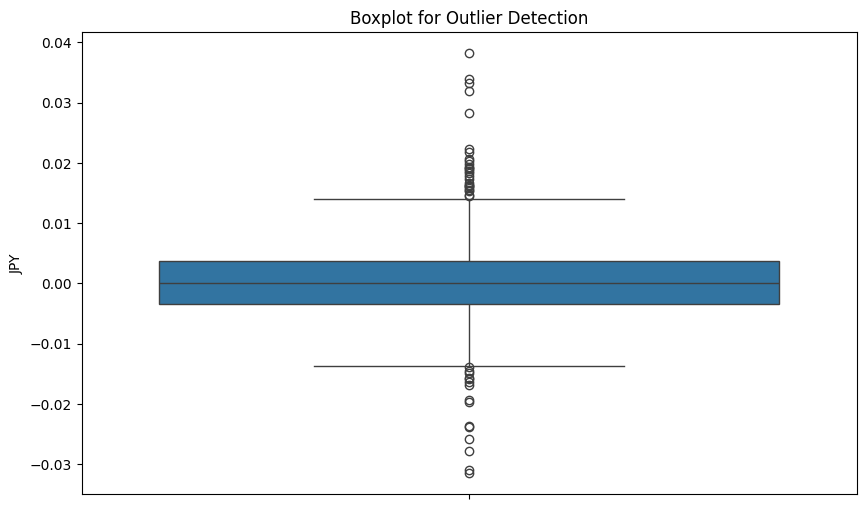

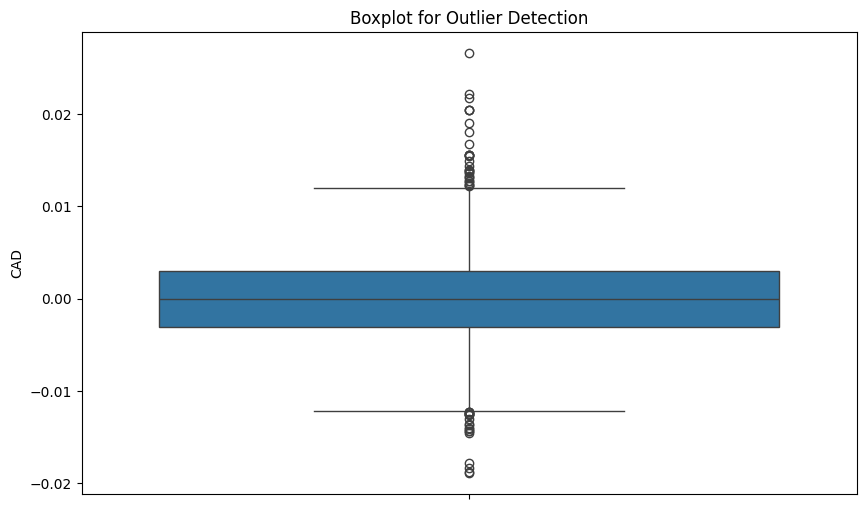

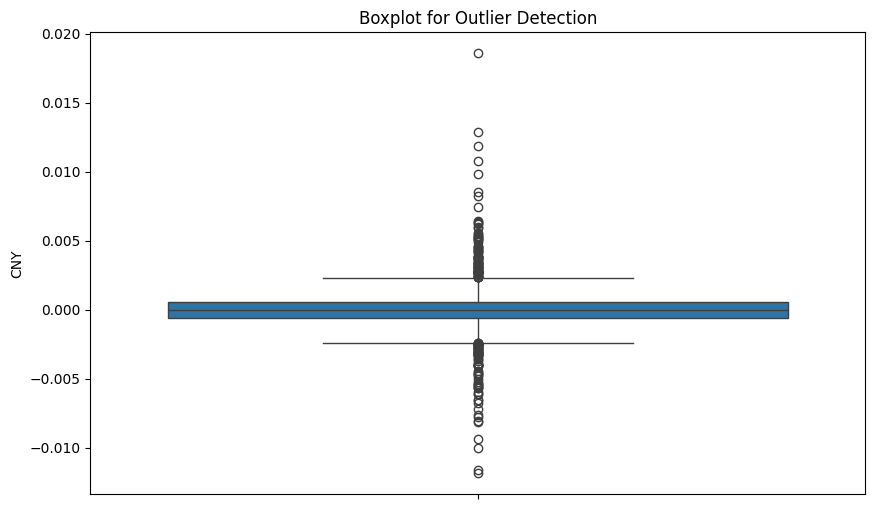

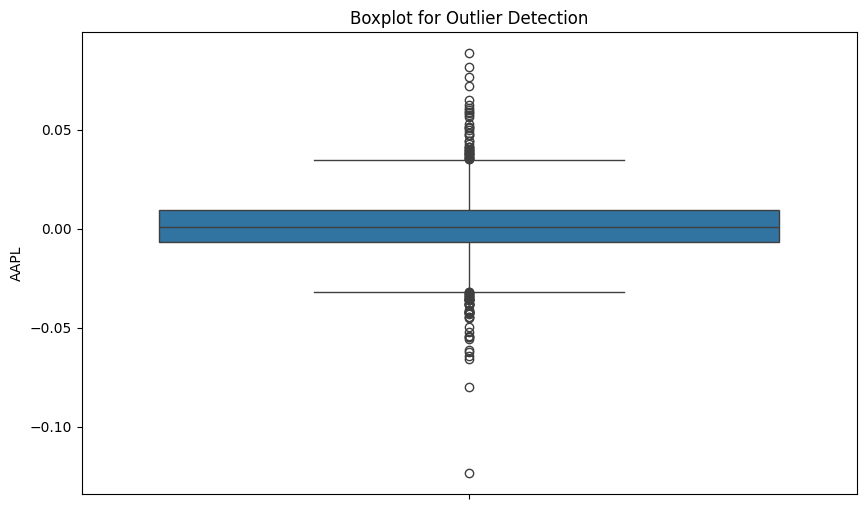

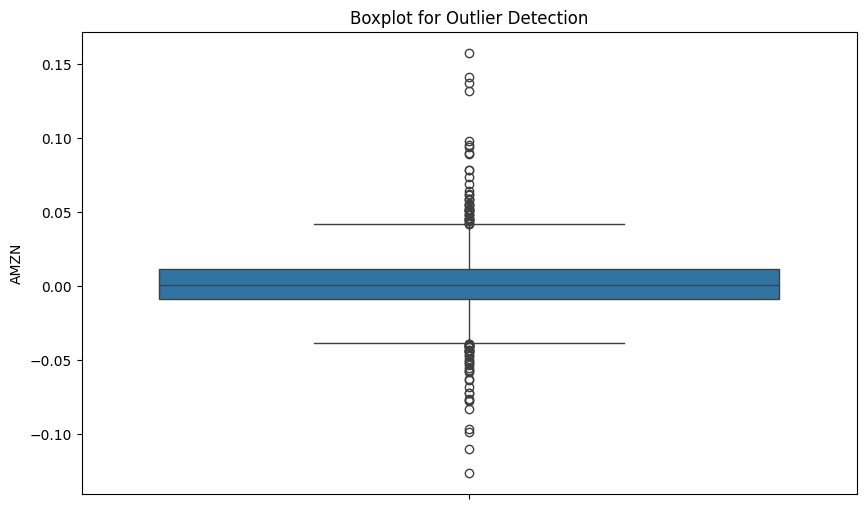

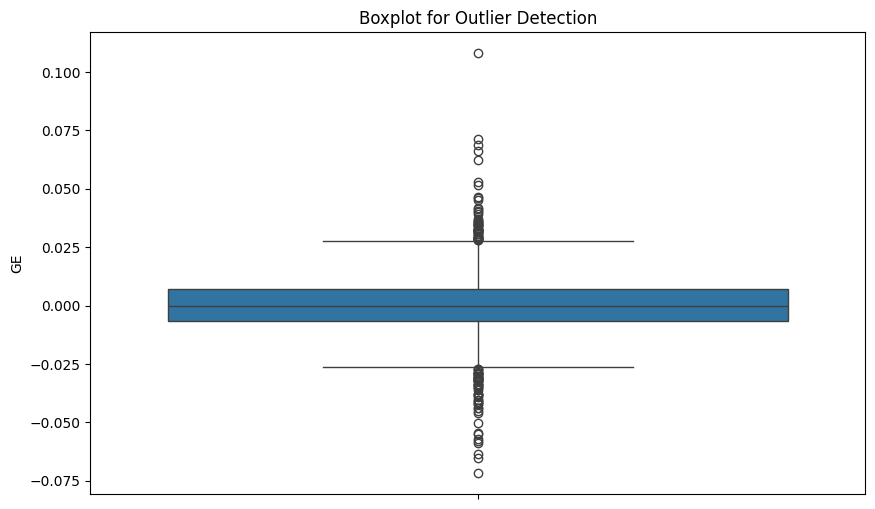

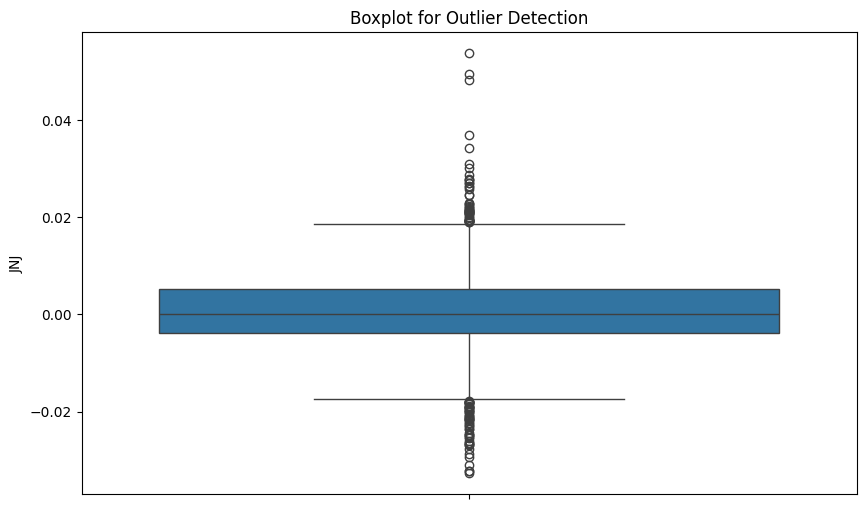

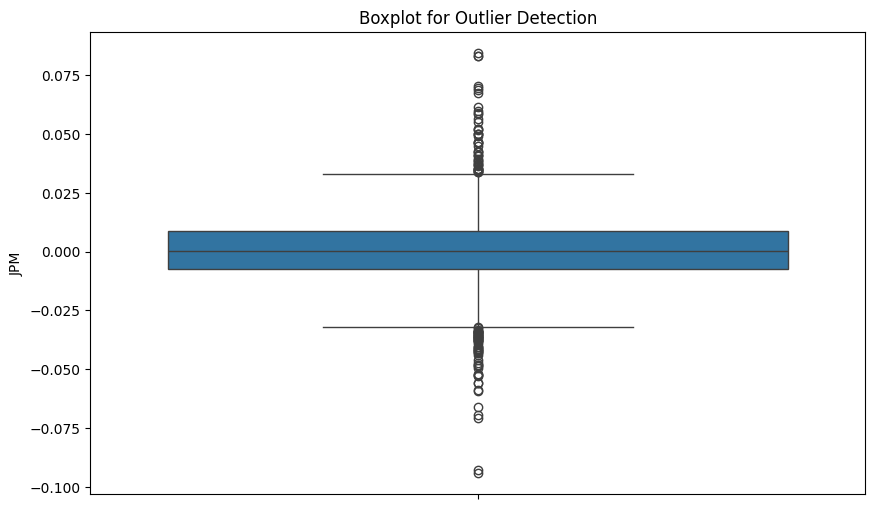

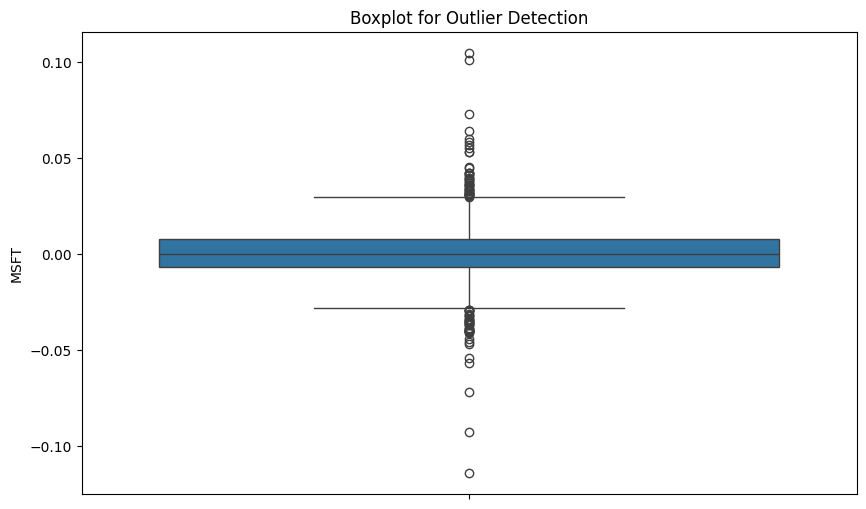

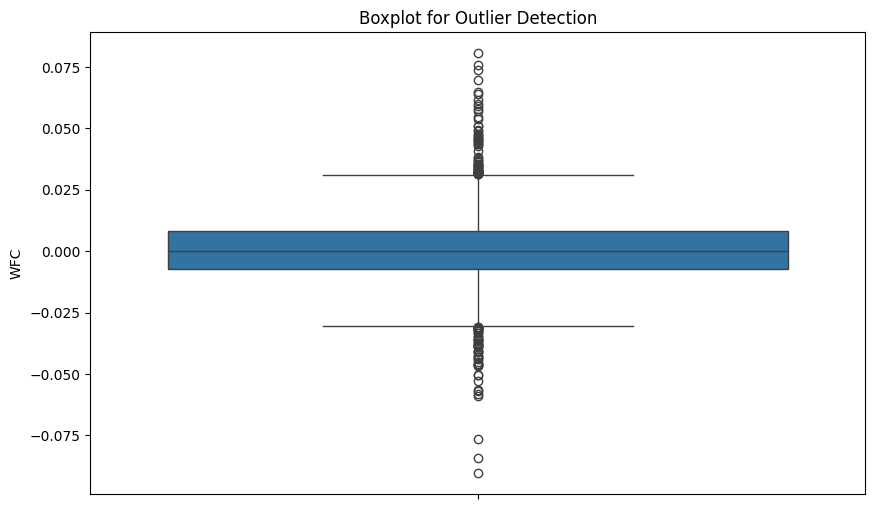

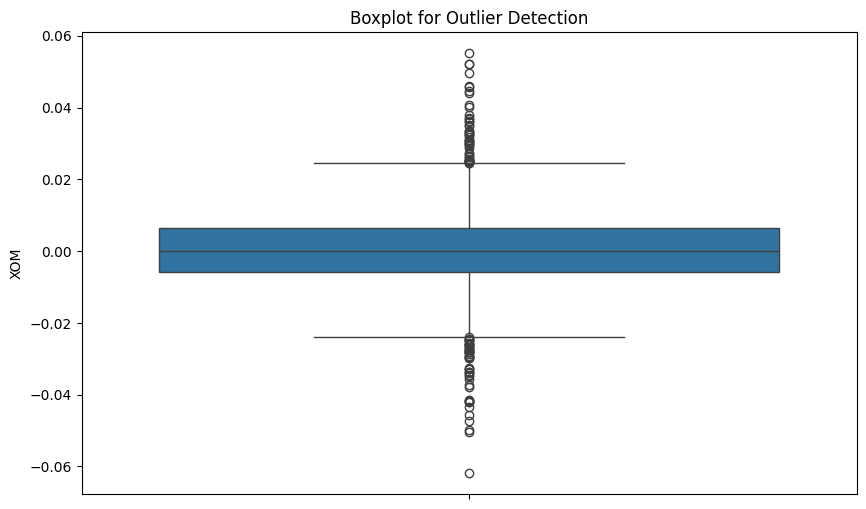

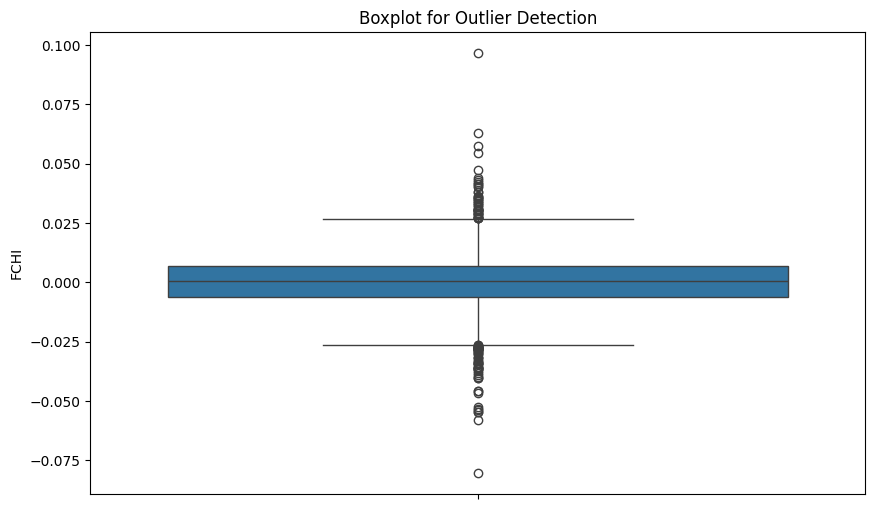

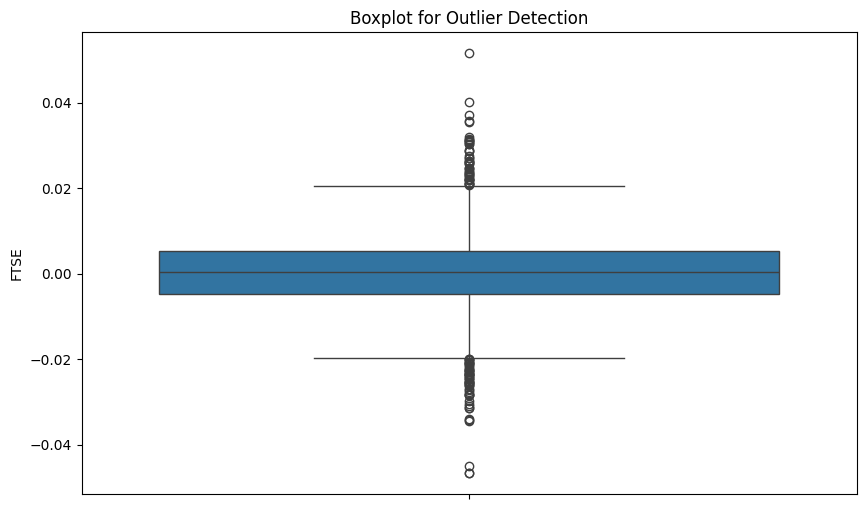

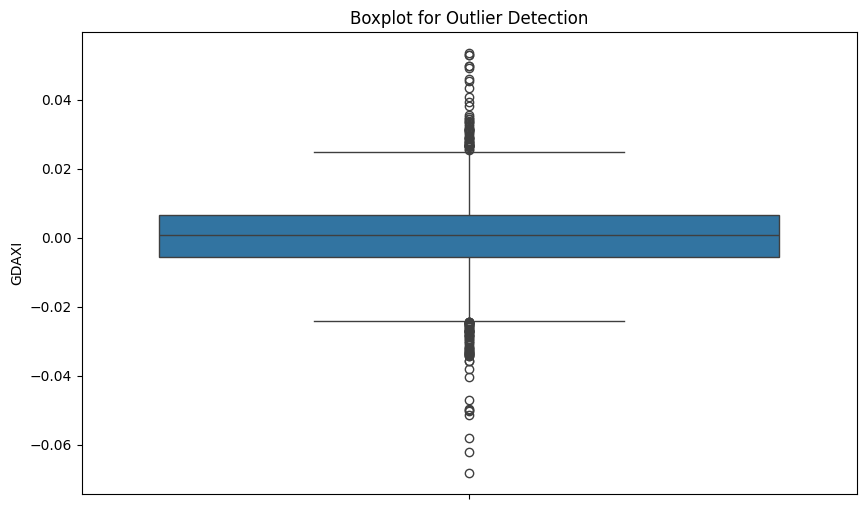

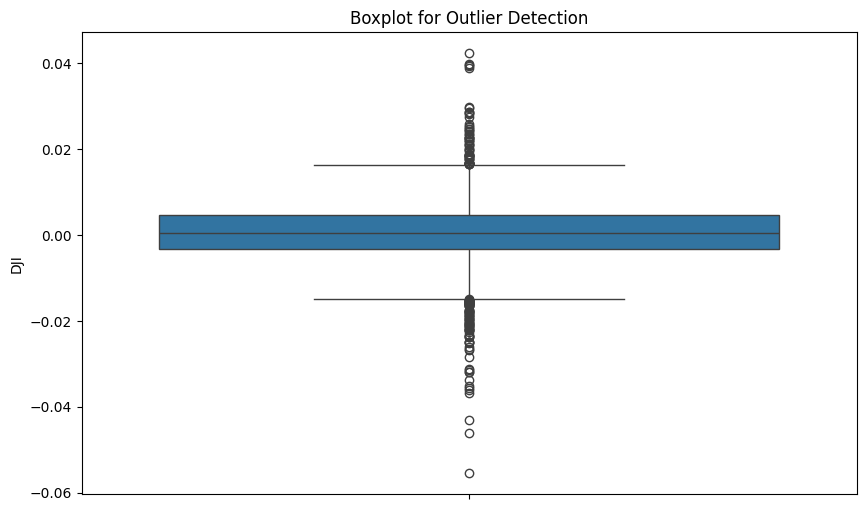

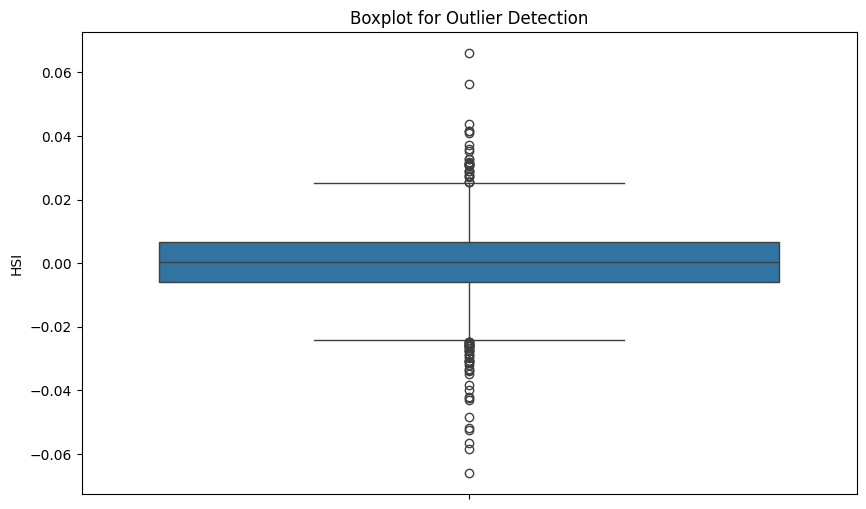

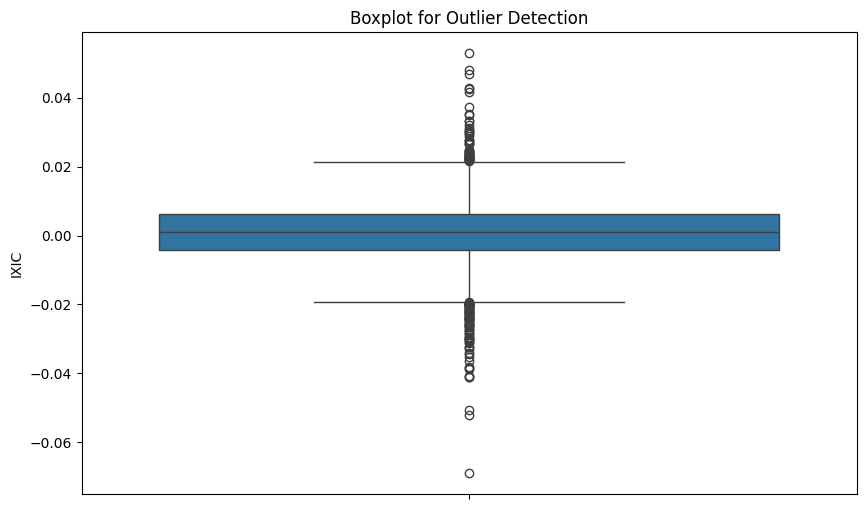

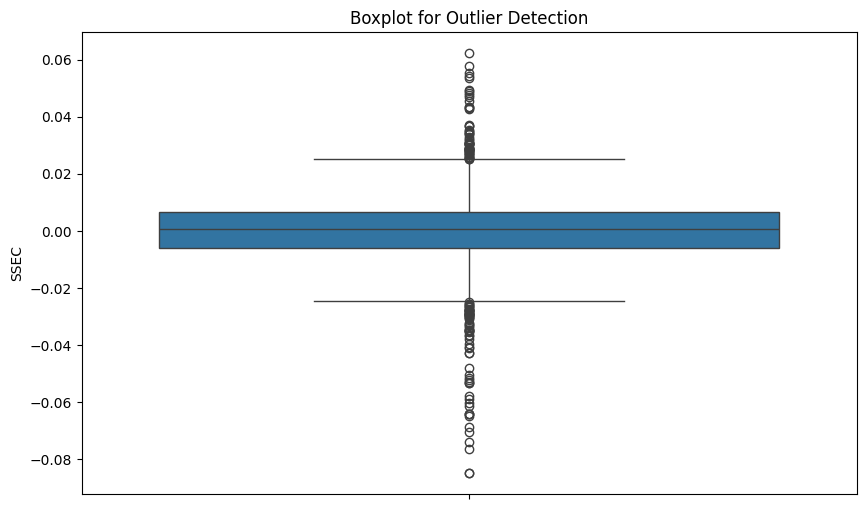

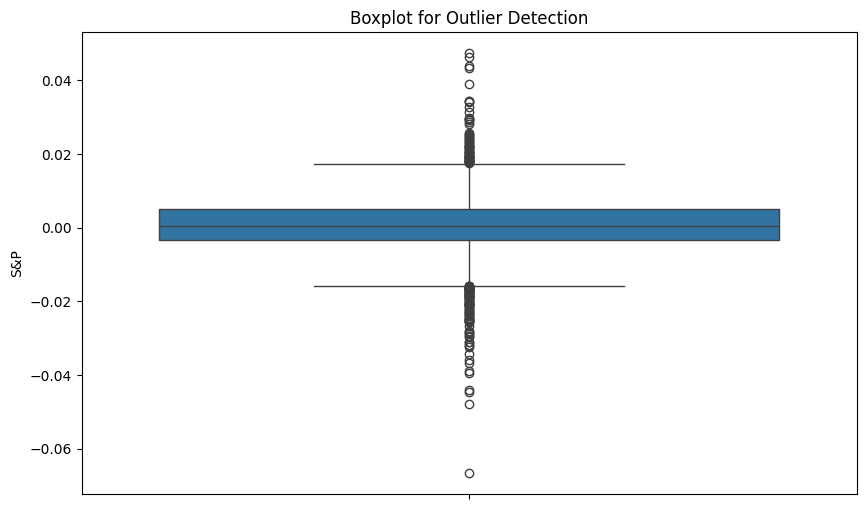

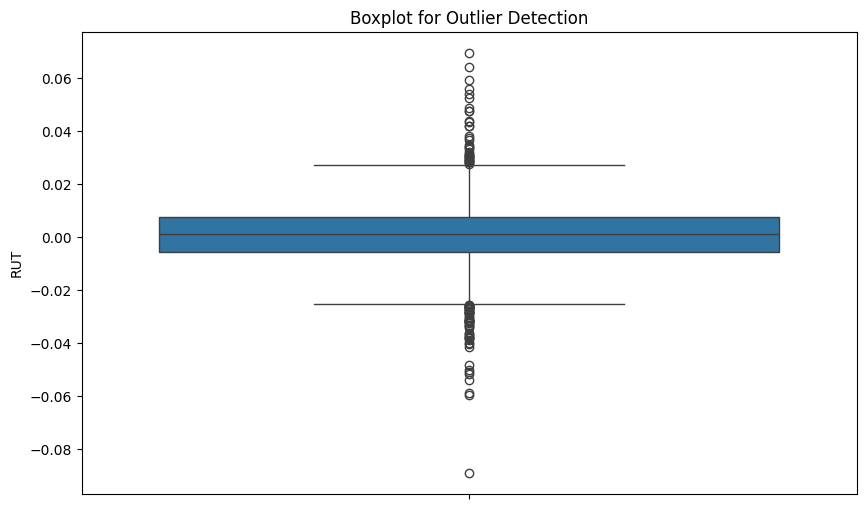

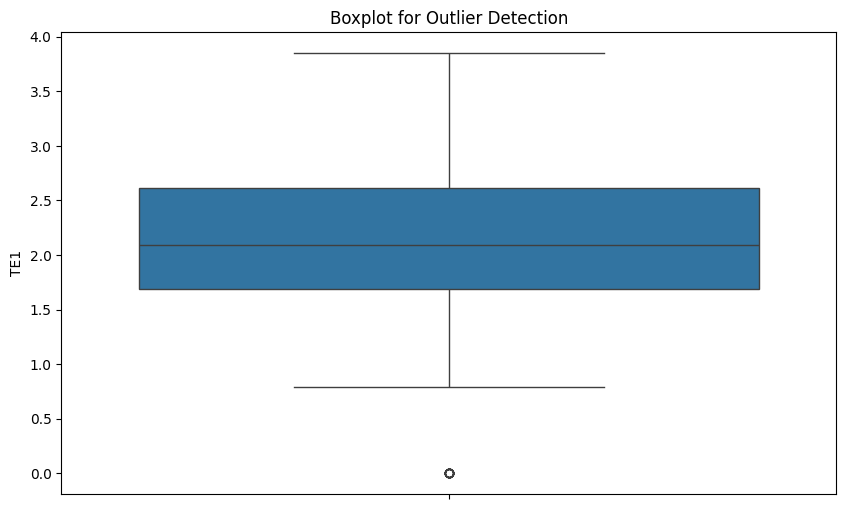

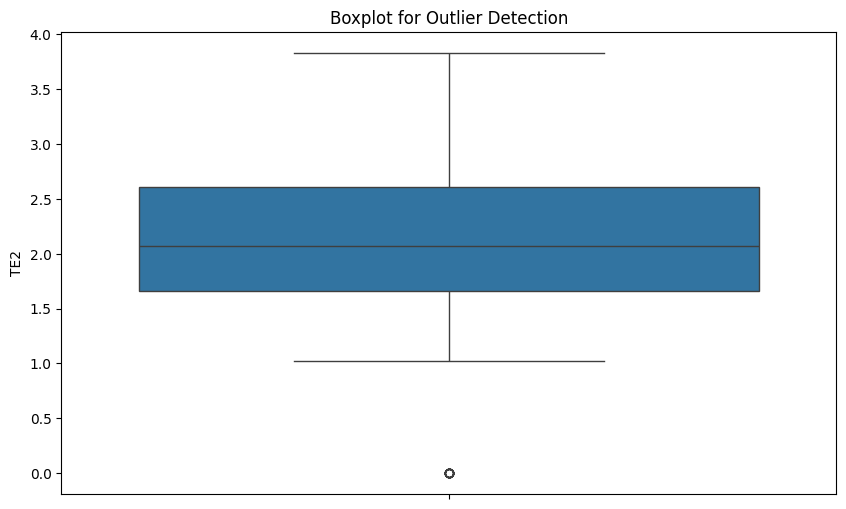

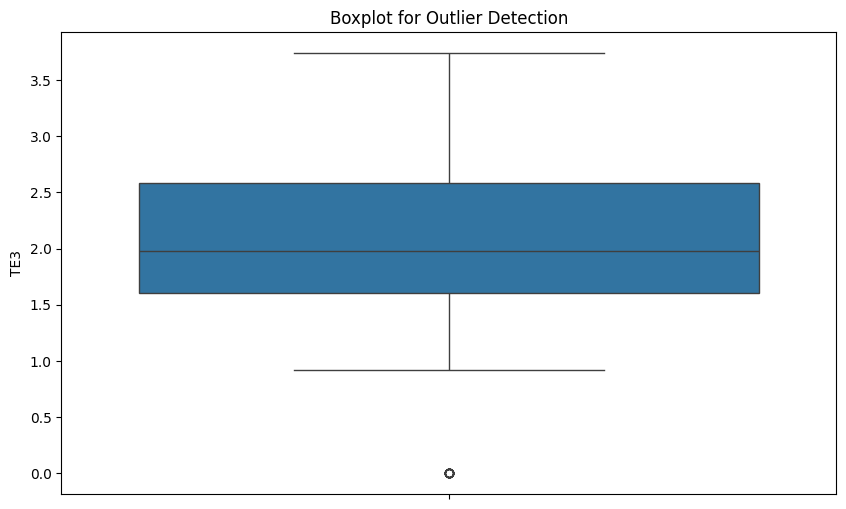

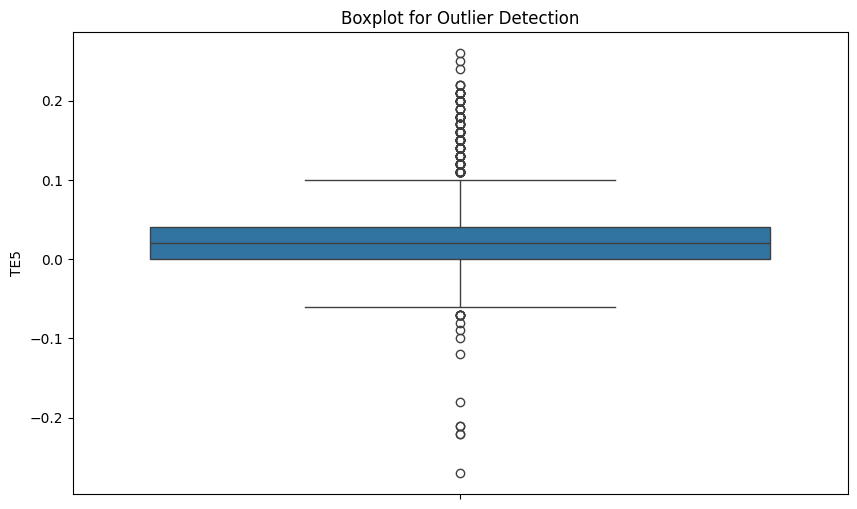

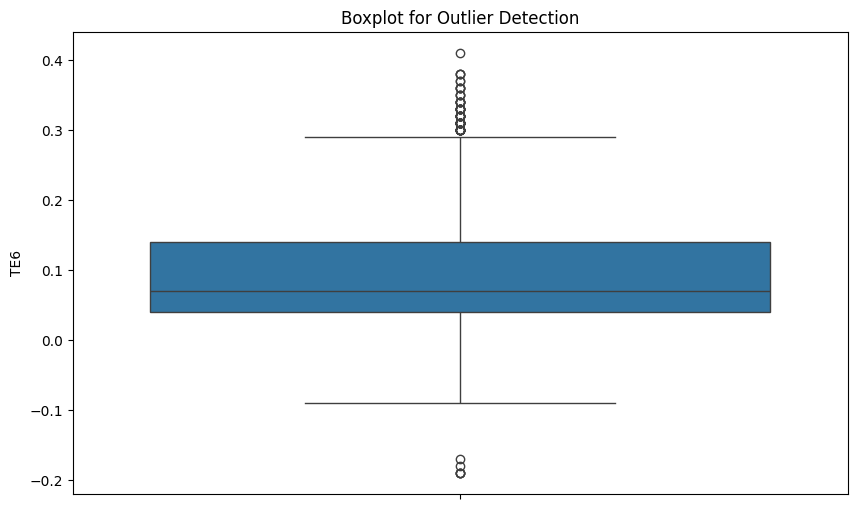

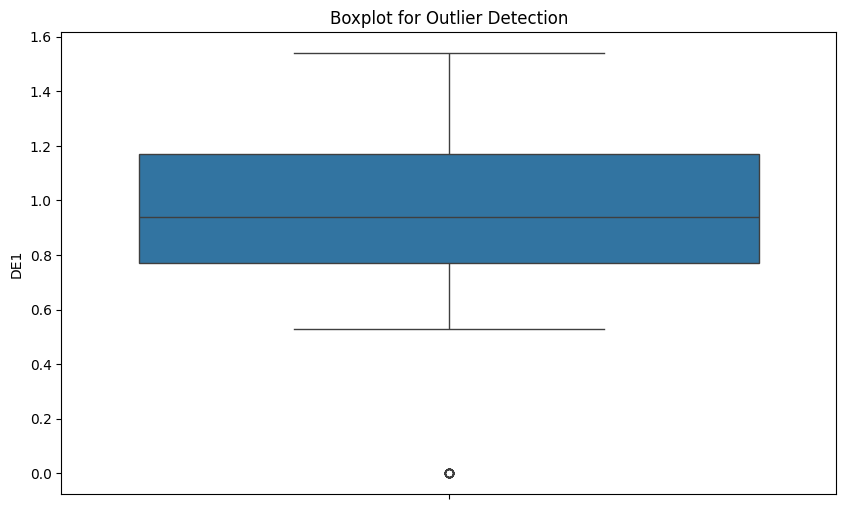

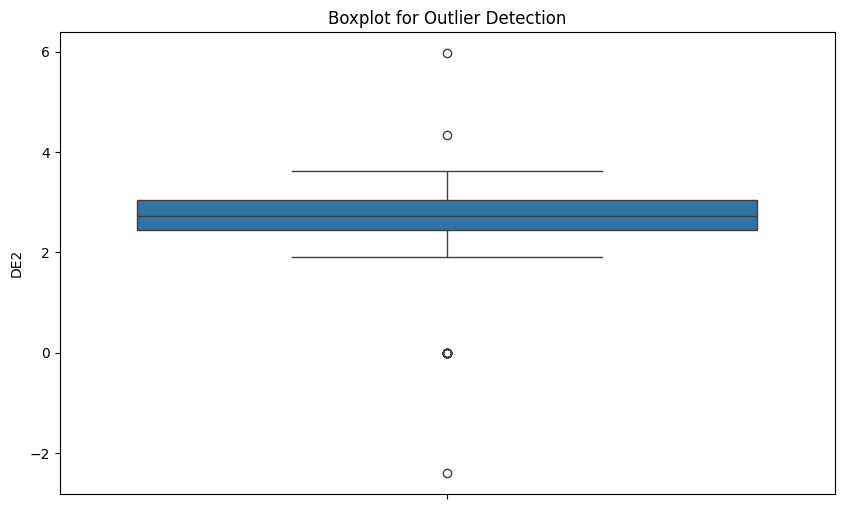

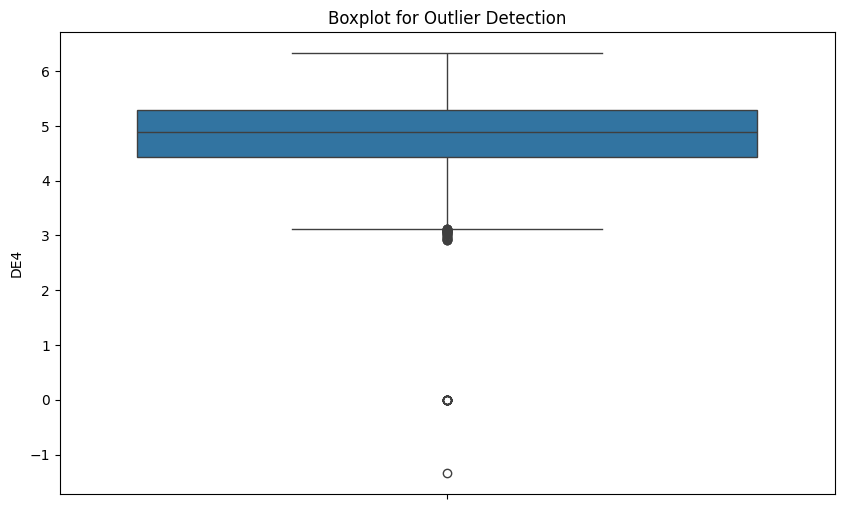

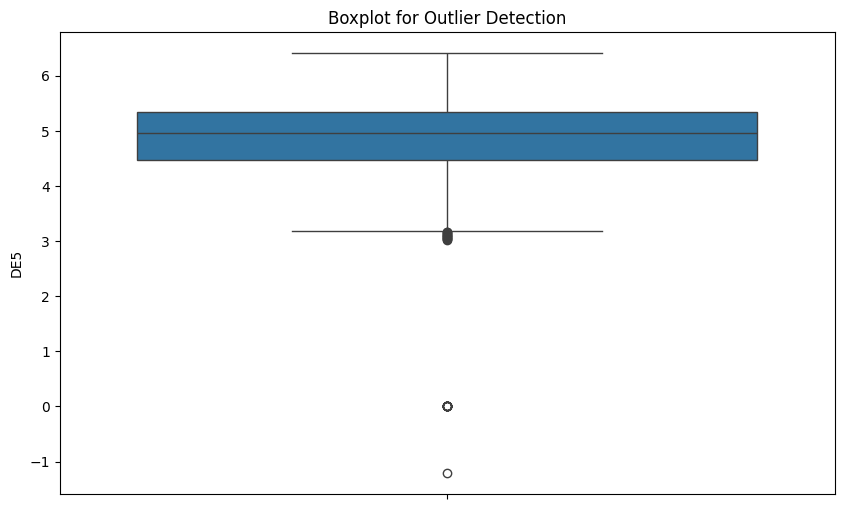

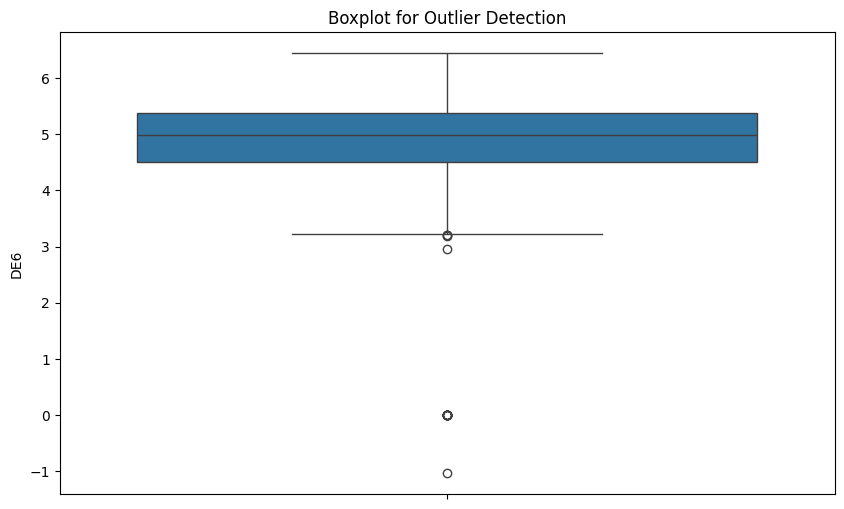

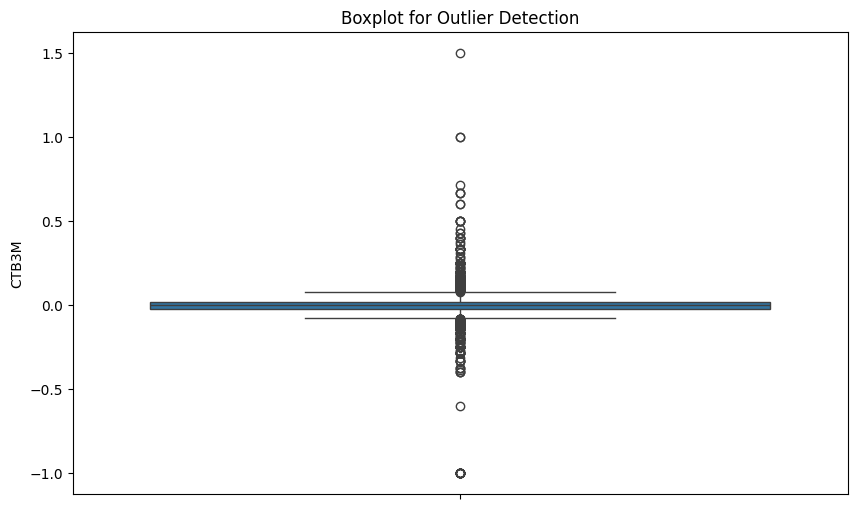

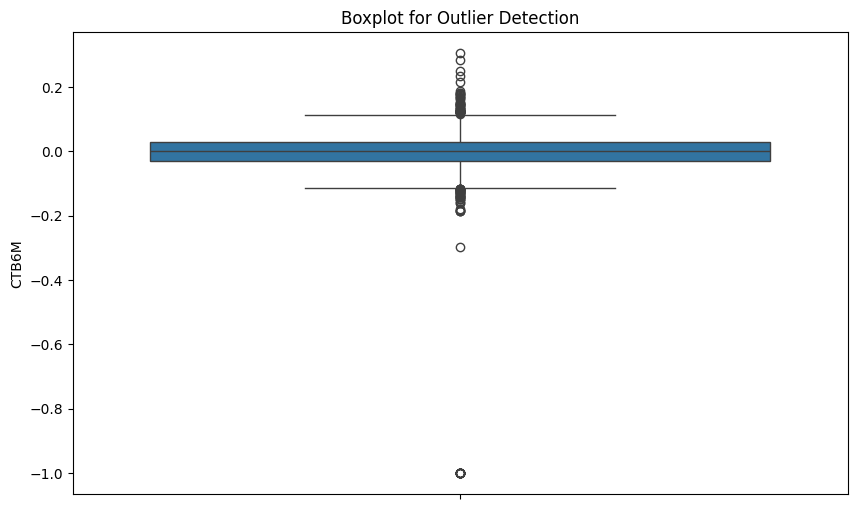

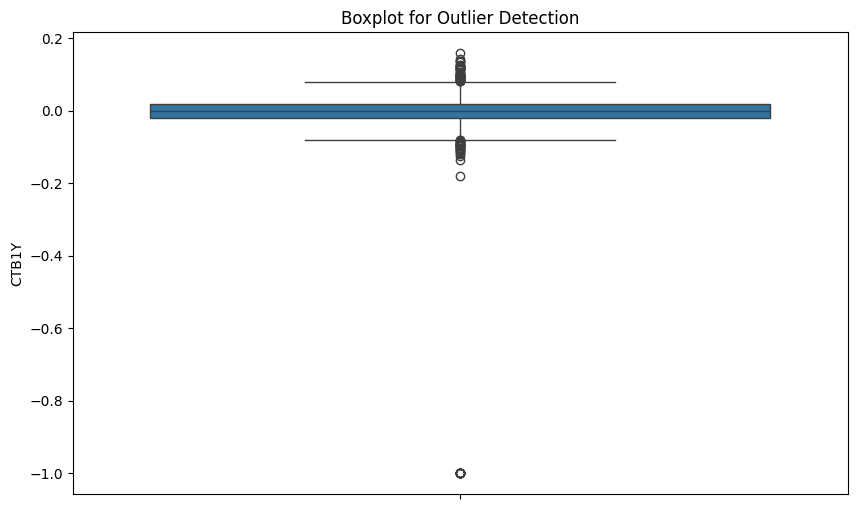

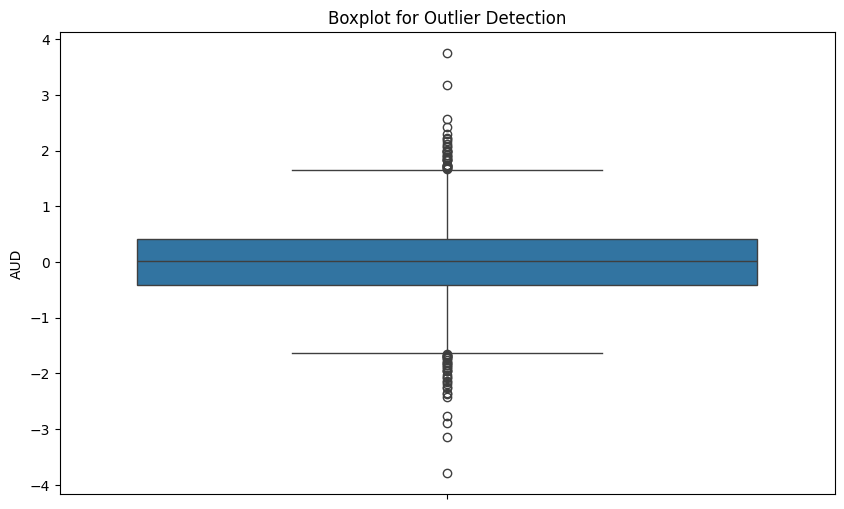

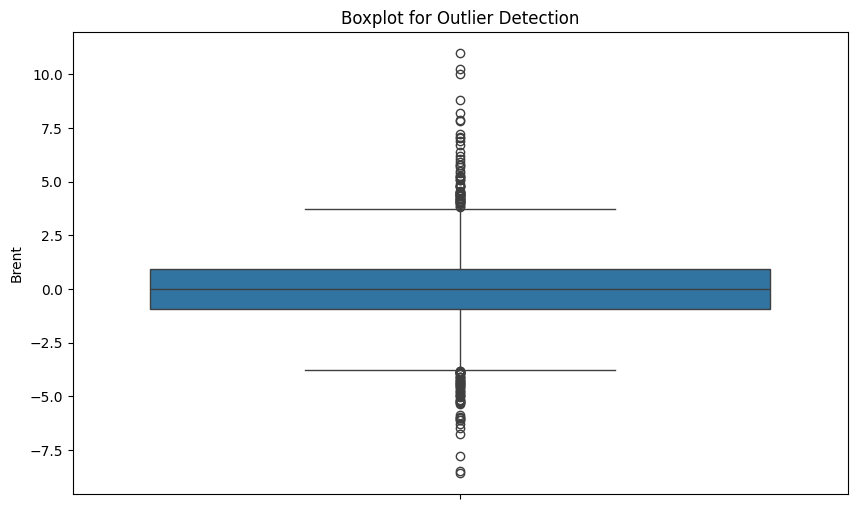

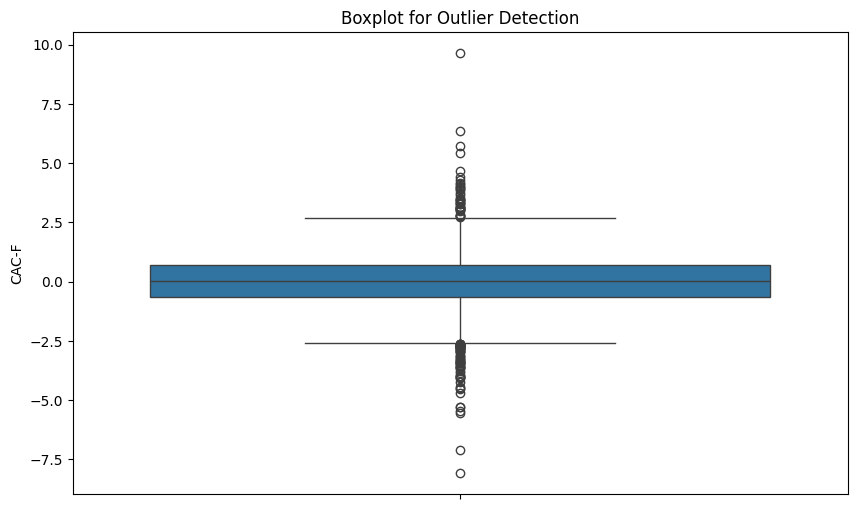

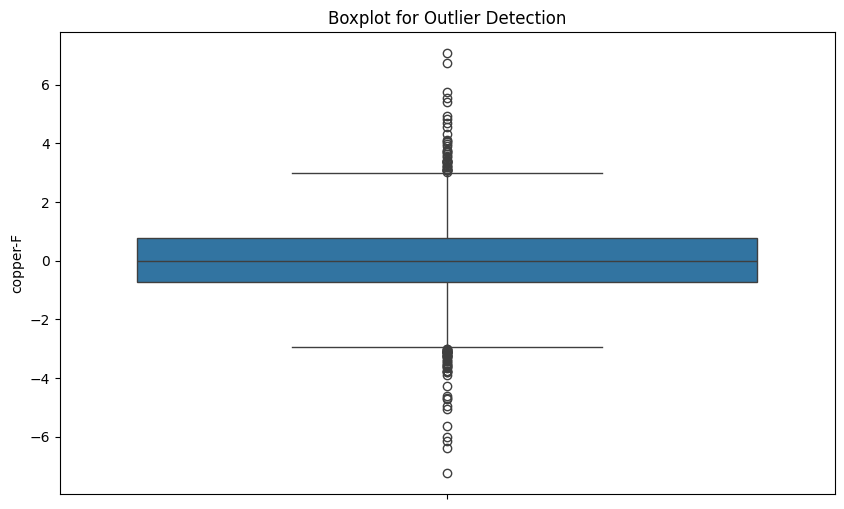

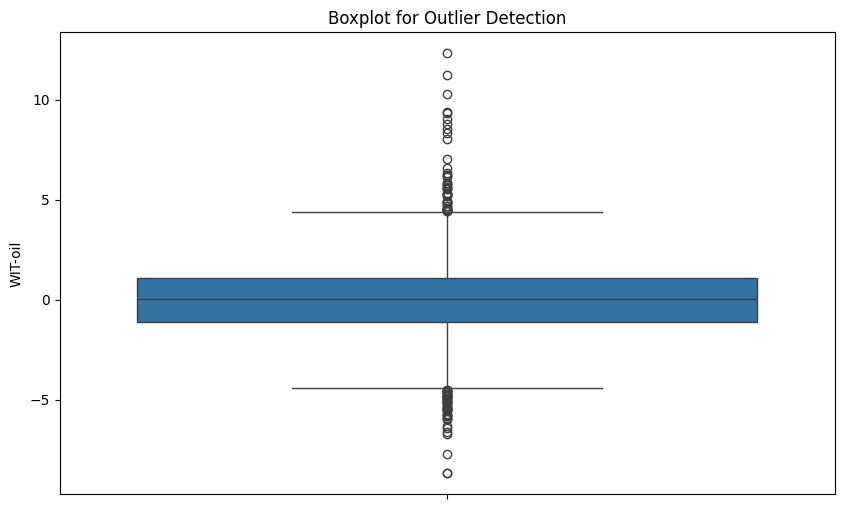

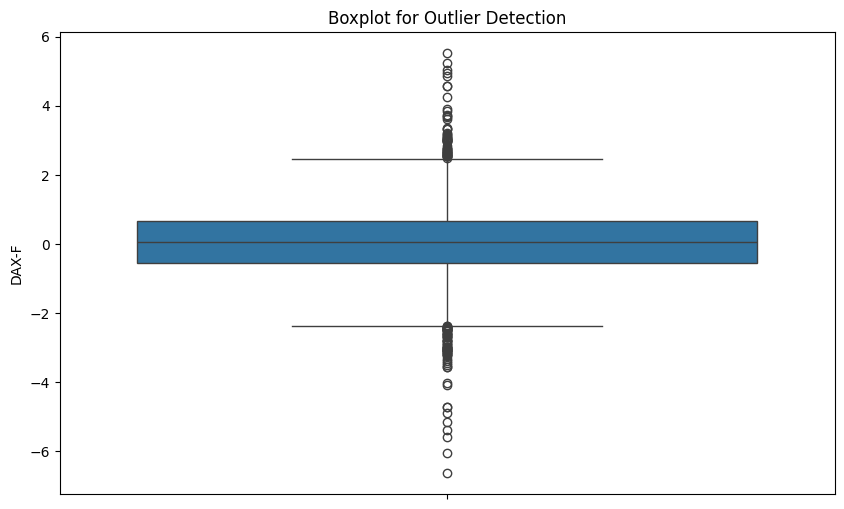

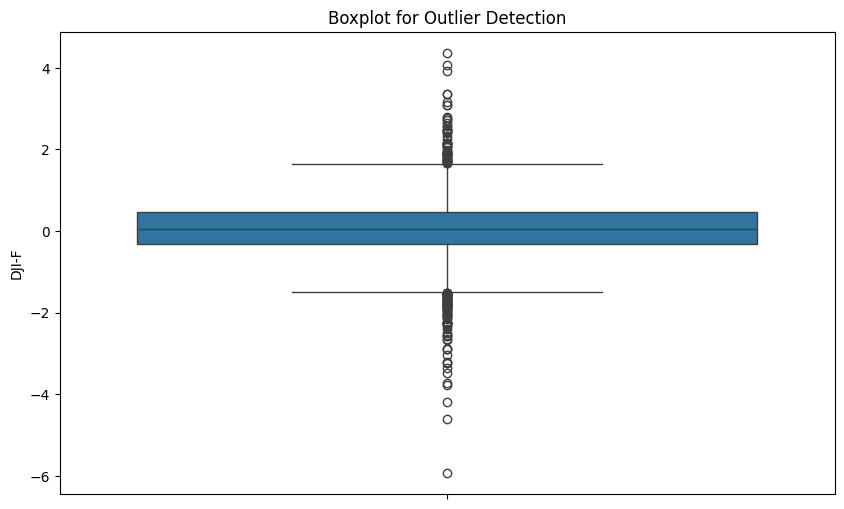

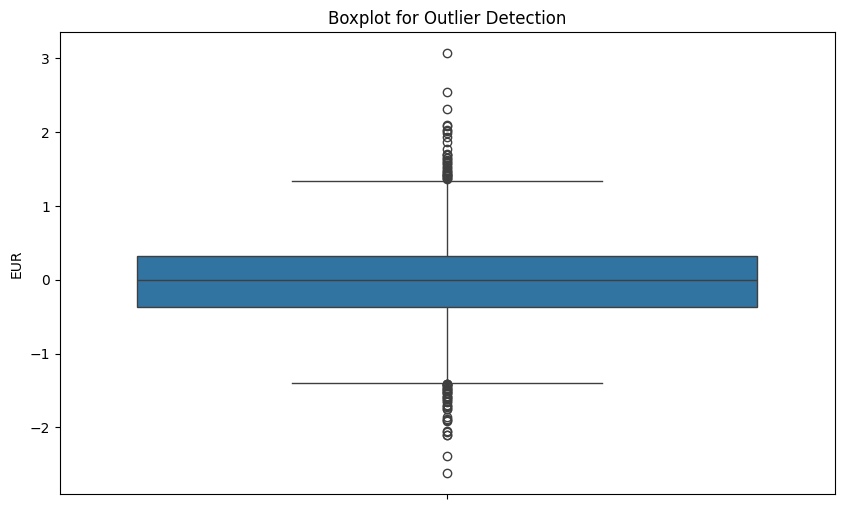

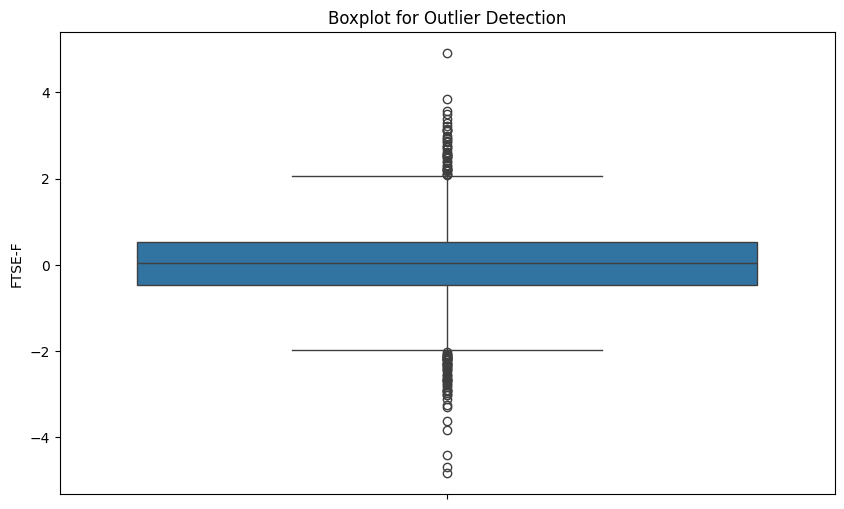

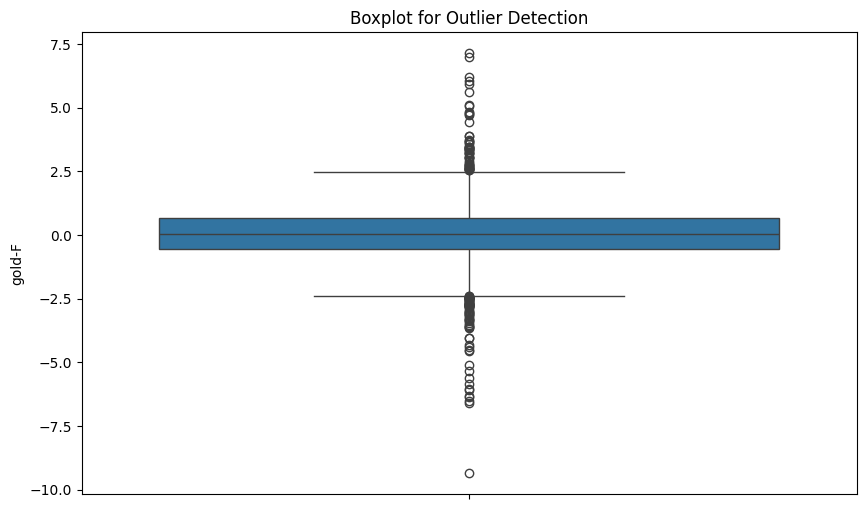

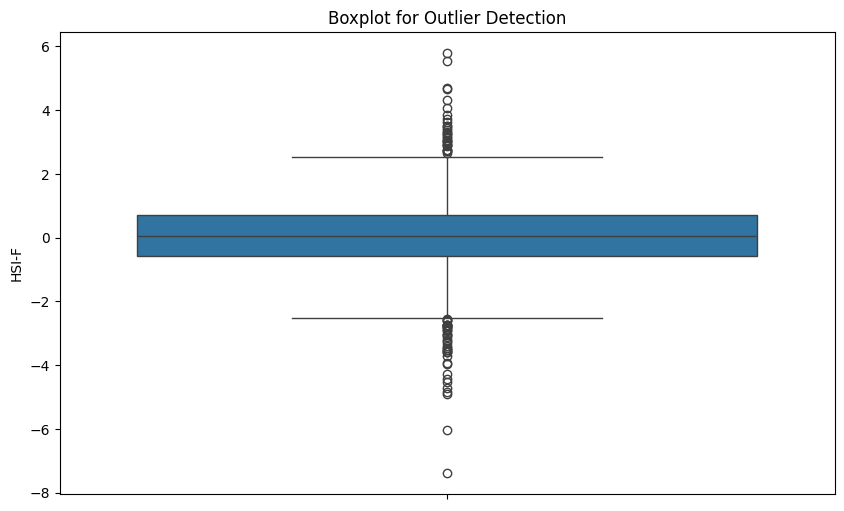

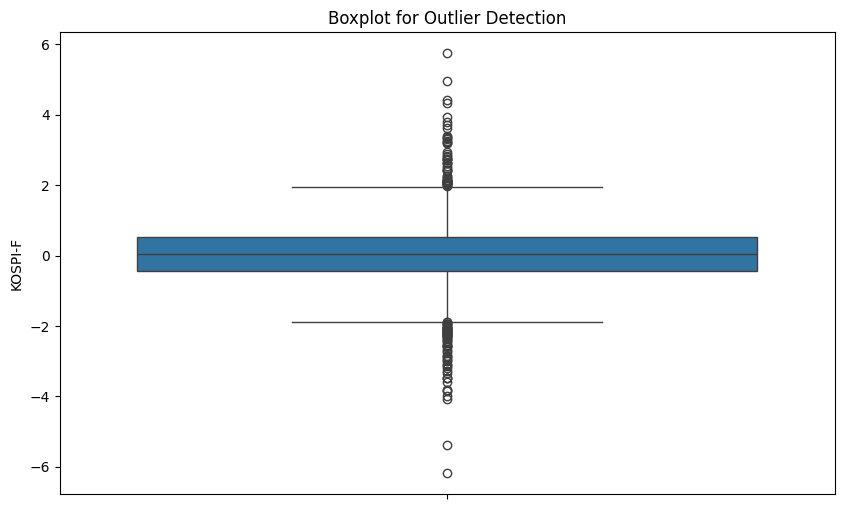

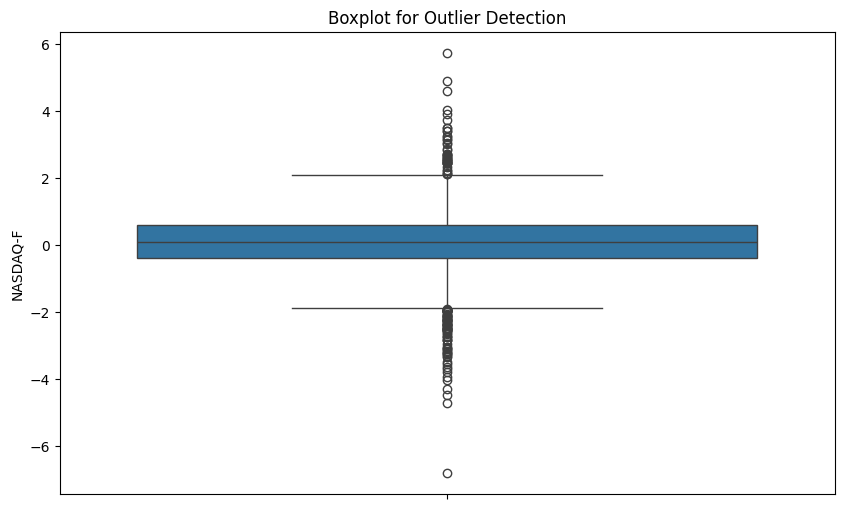

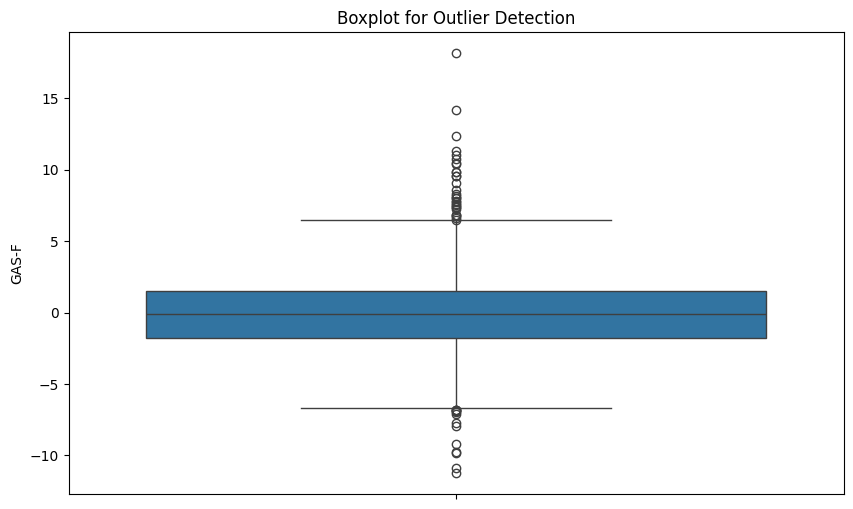

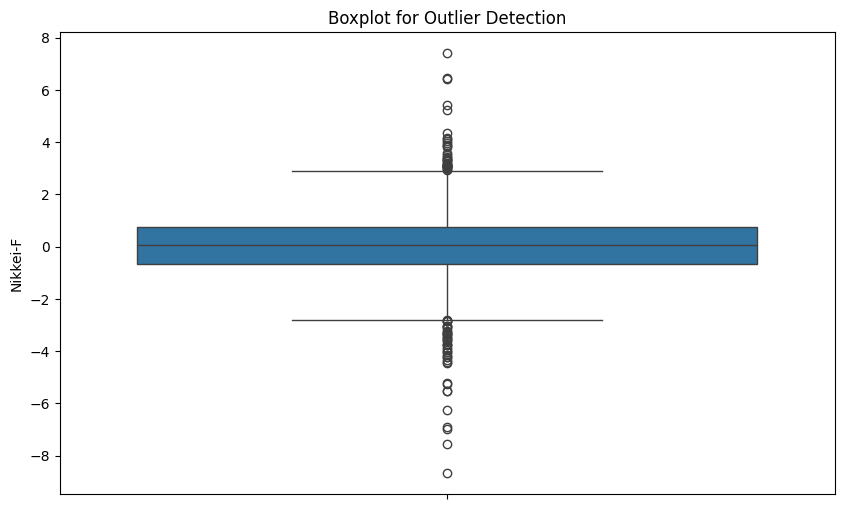

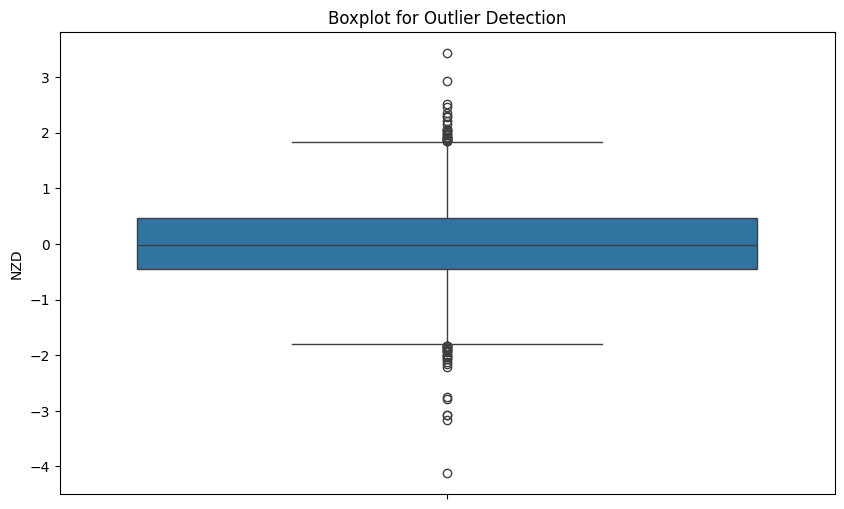

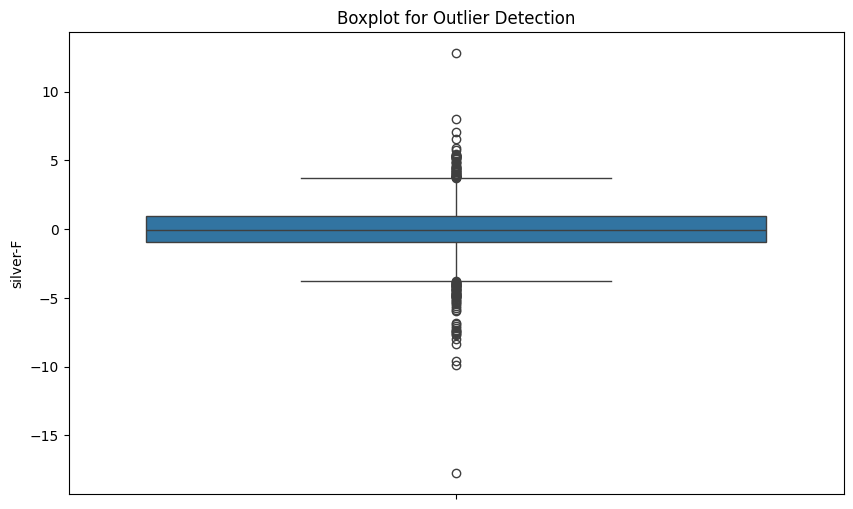

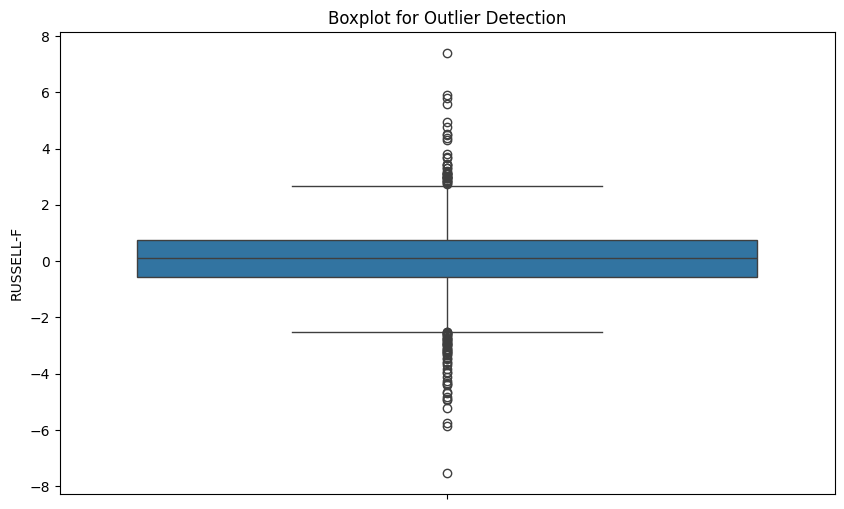

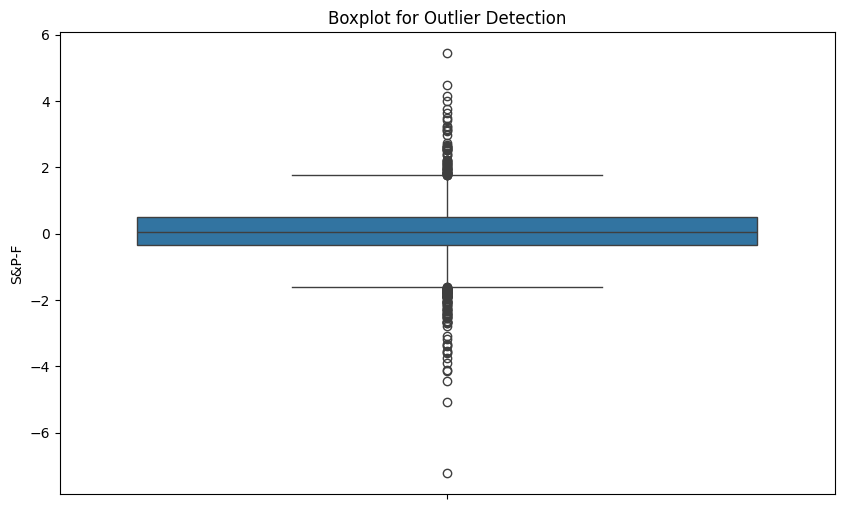

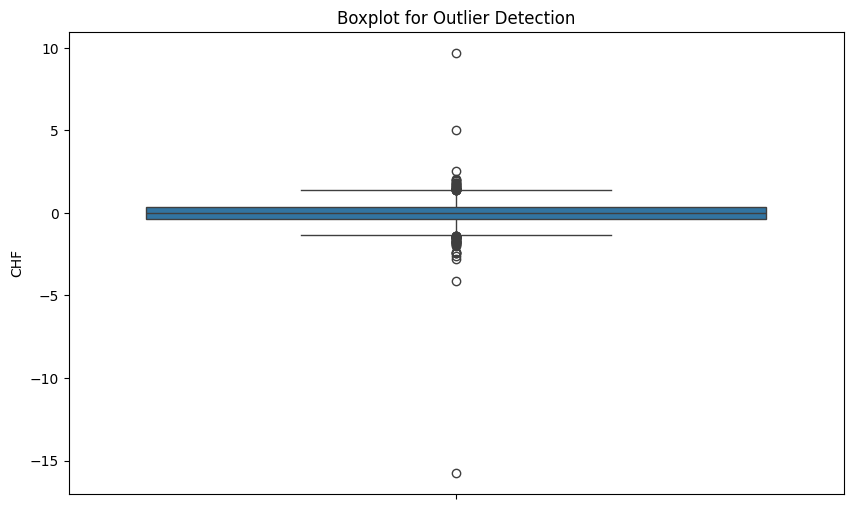

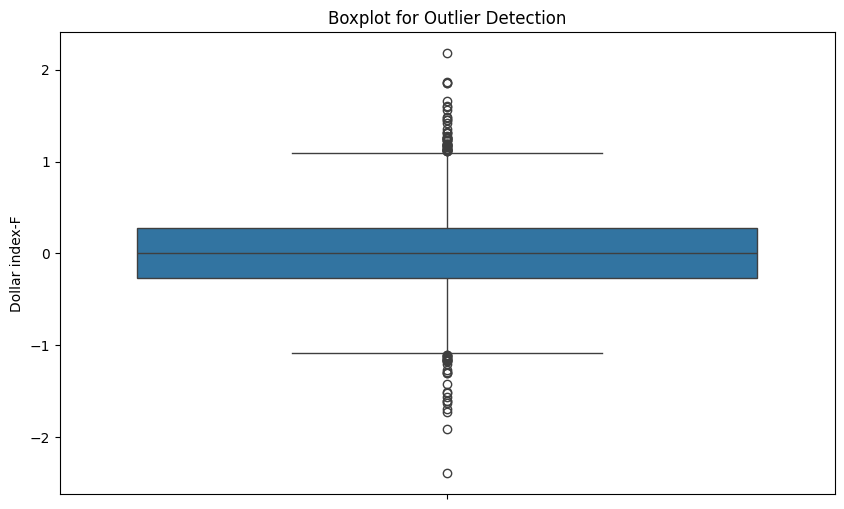

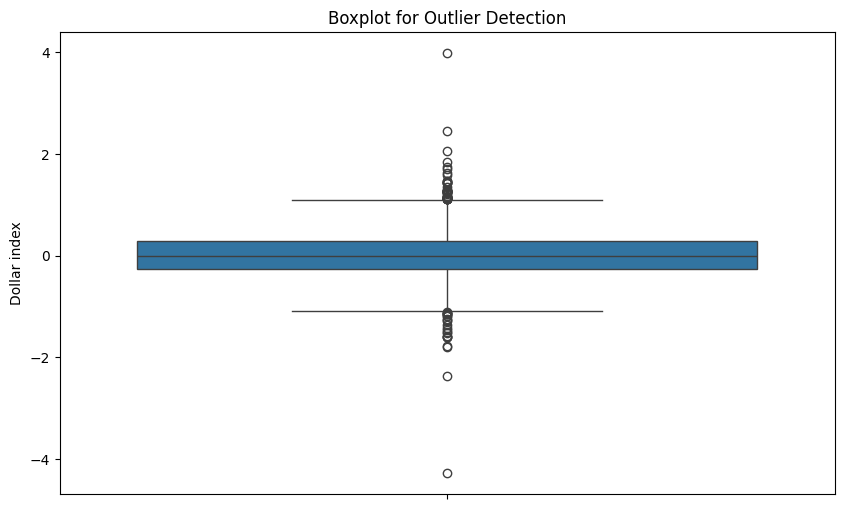

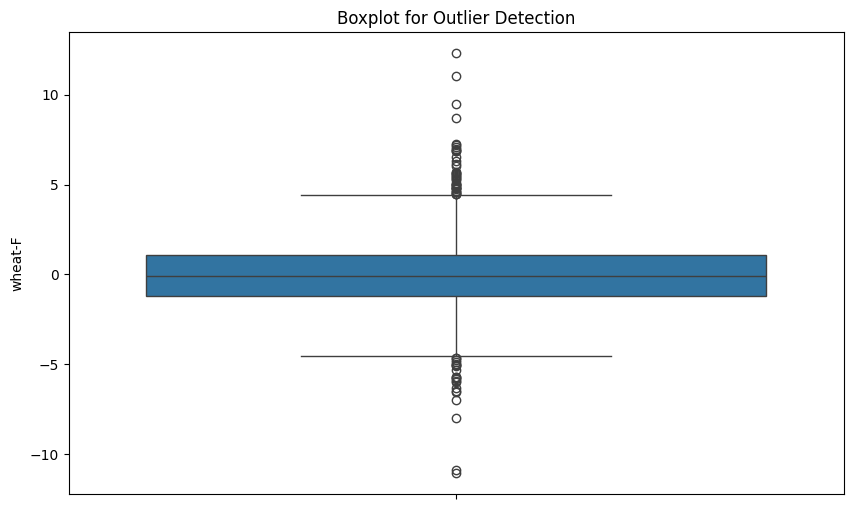

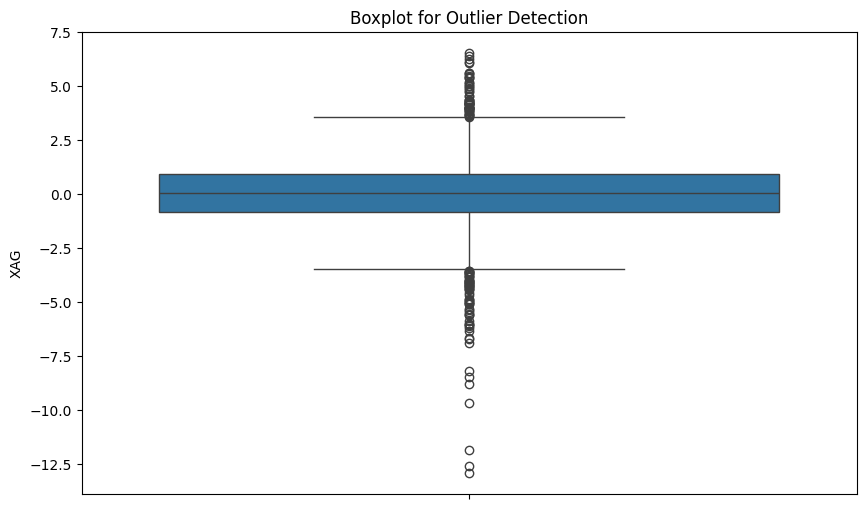

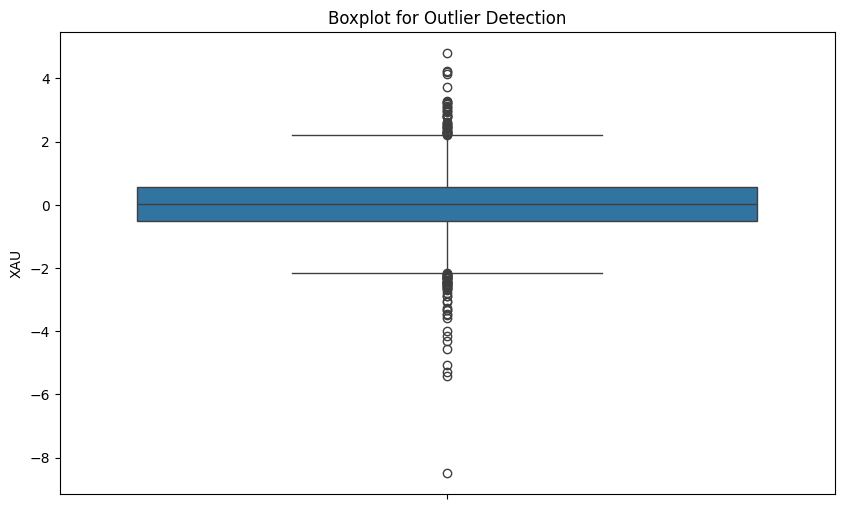

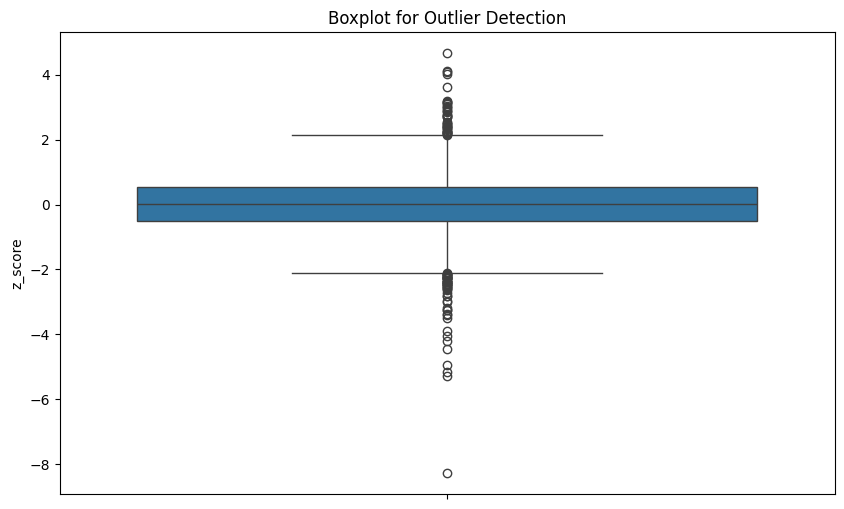

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [46]:
def plot_data(data,col):
    # Plot boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(data[col])
    plt.title('Boxplot for Outlier Detection')
    plt.show()
[plot_data(dfs_list[0],col) for col in numerical_columns]


plot the daily return for each dataframe

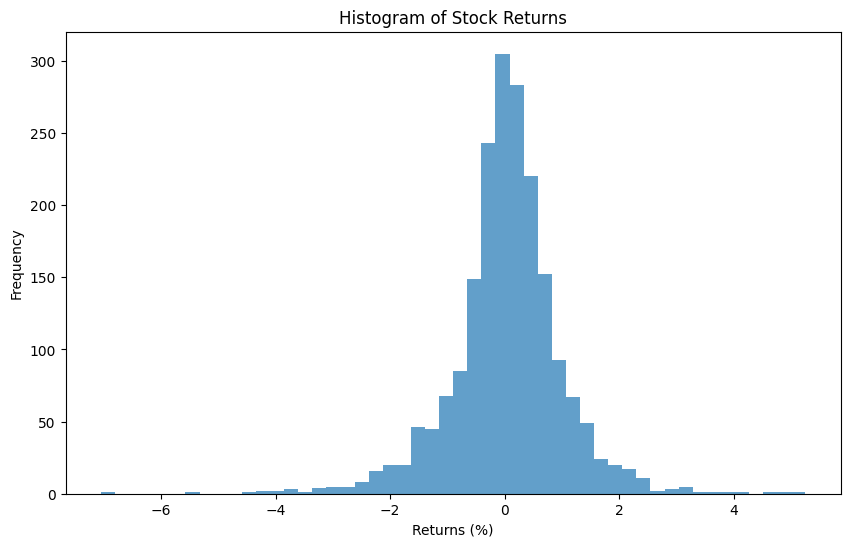

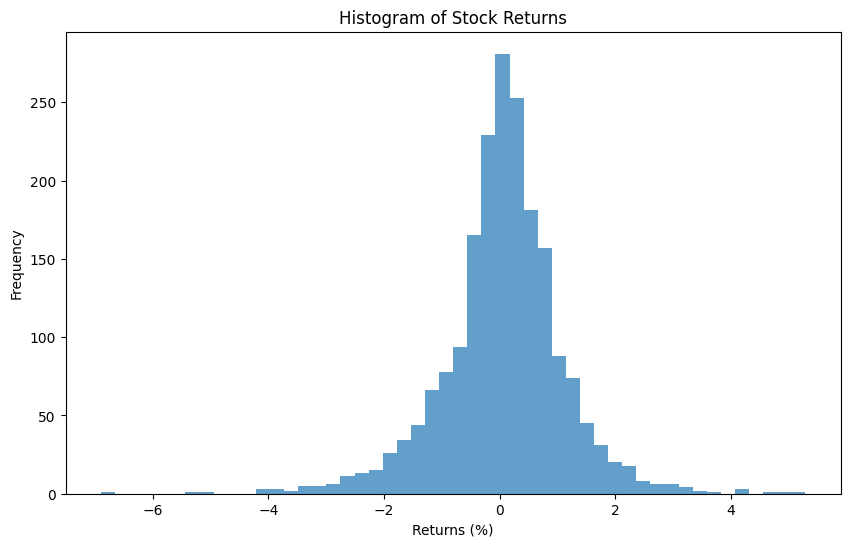

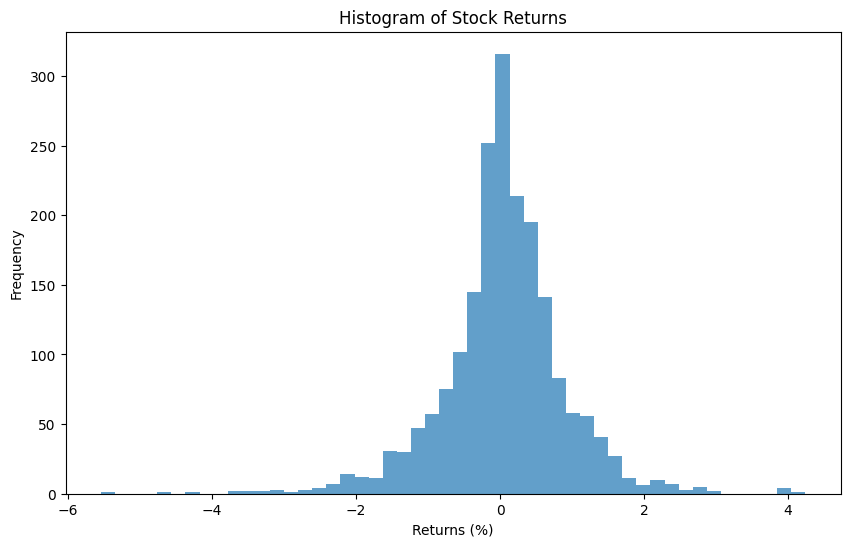

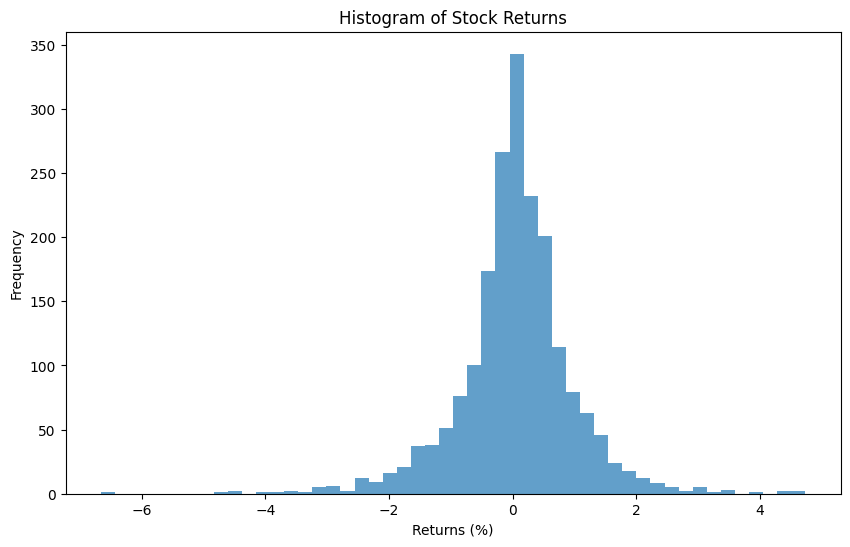

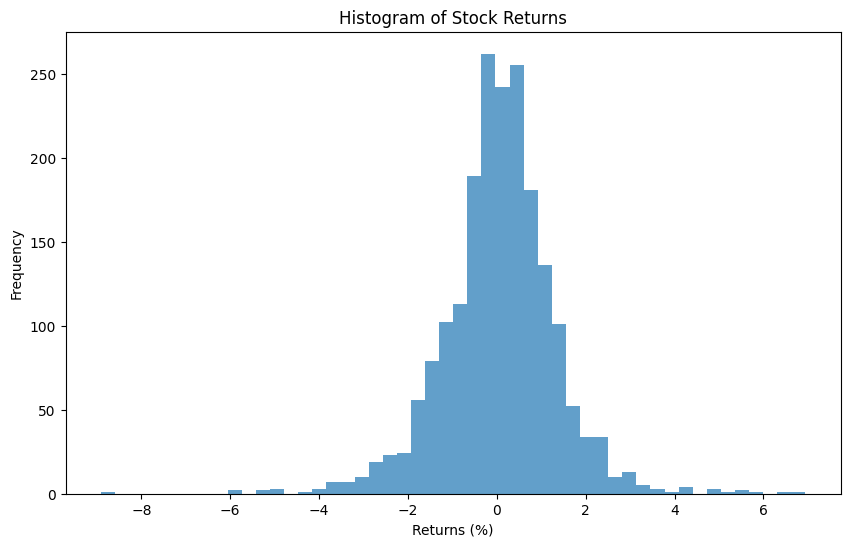

[None, None, None, None, None]

In [53]:
def plot_daily_return(data):
    # Calculate daily returns as percentage
    data['Returns'] = data['Close'].pct_change() * 100
    
    plt.figure(figsize=(10, 6))
    plt.hist(data['Returns'].dropna(), bins=50, alpha=0.7)
    plt.title('Histogram of Stock Returns')
    plt.xlabel('Returns (%)')
    plt.ylabel('Frequency')
    plt.show()
[plot_daily_return(df) for df in dfs_list]

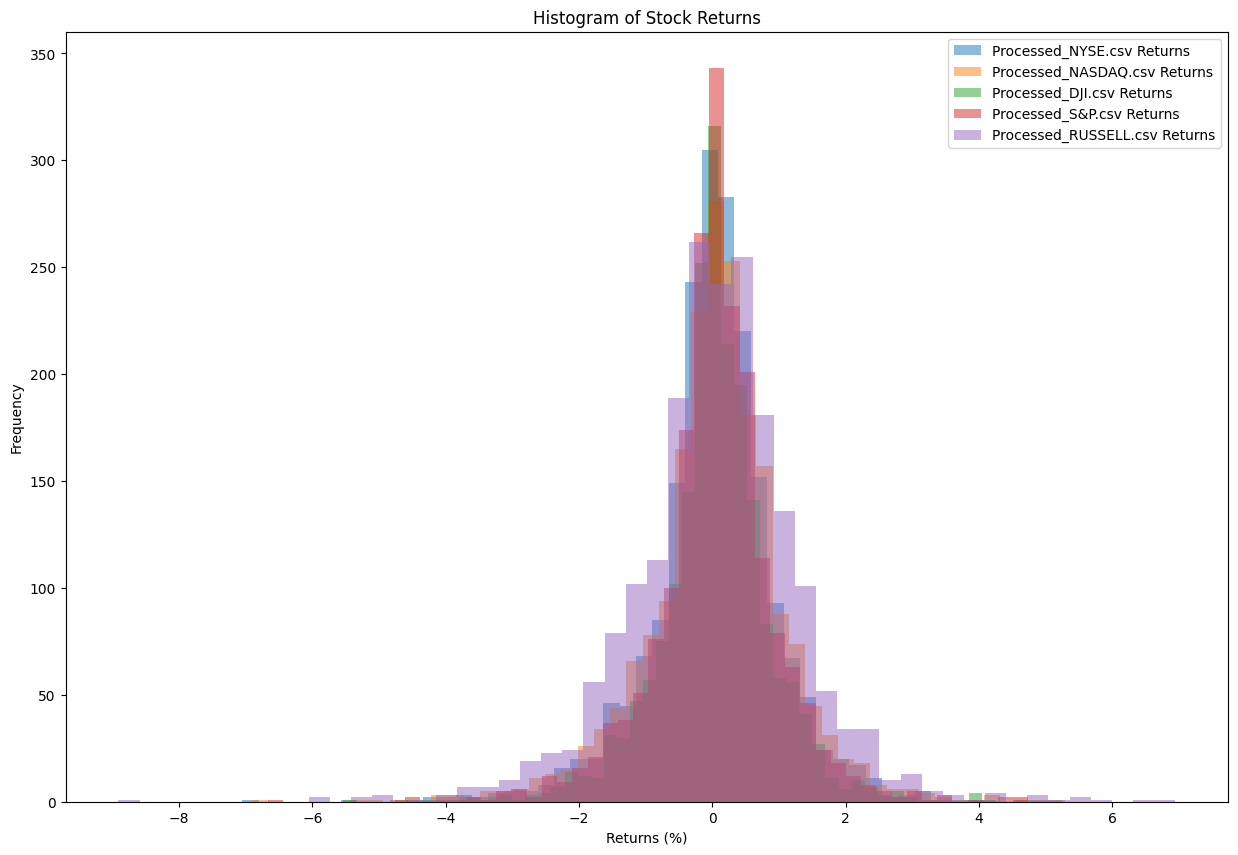

In [55]:
# plot all
plt.figure(figsize=(15, 10)) 
for df, stock_name in zip(dfs_list, data_set):
    df['Returns'] = df['Close'].pct_change() * 100
    
    plt.hist(df['Returns'].dropna(), bins=50, alpha=0.5, label=f'{stock_name} Returns')

plt.title('Histogram of Stock Returns')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Univariate Analysis
Investigate close price using descriptive statistics and visualizations.


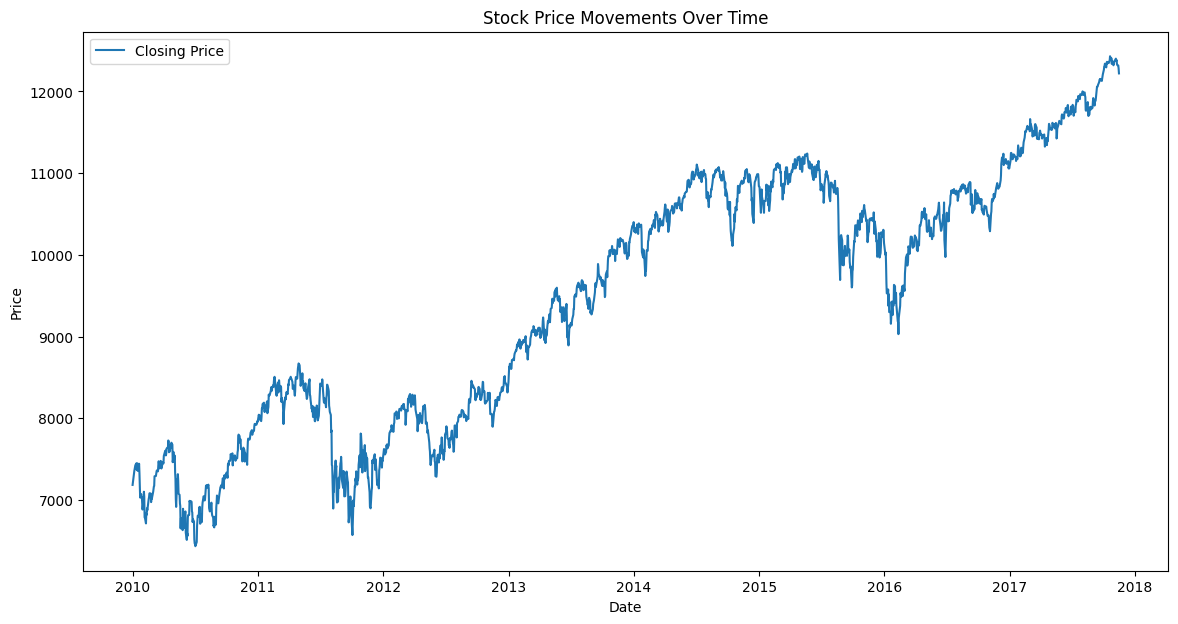

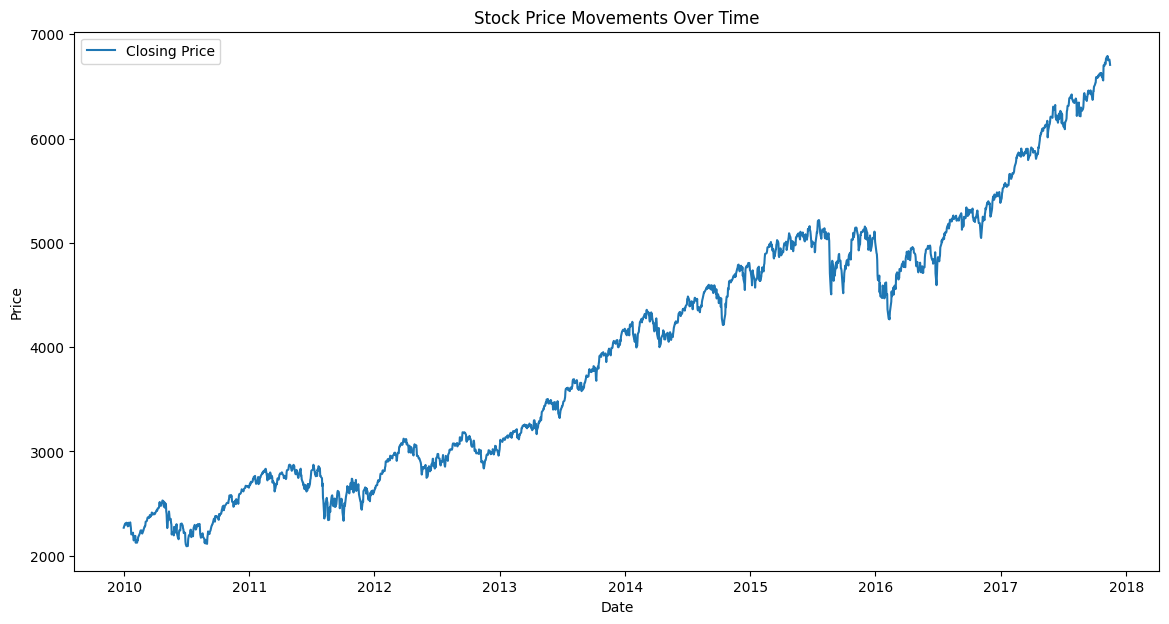

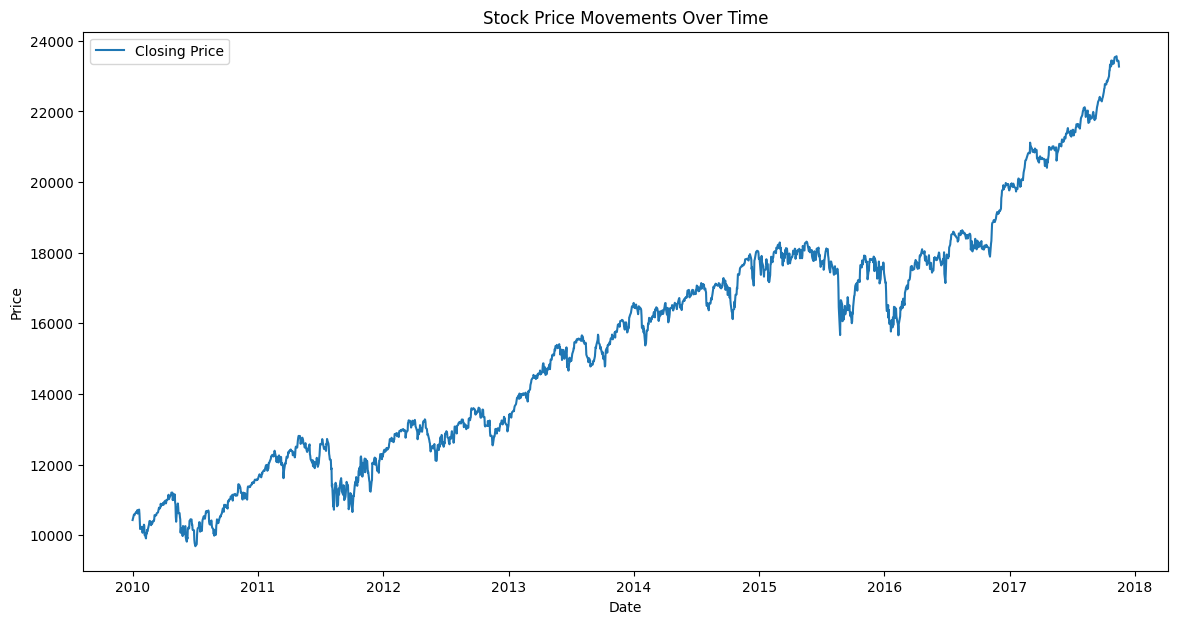

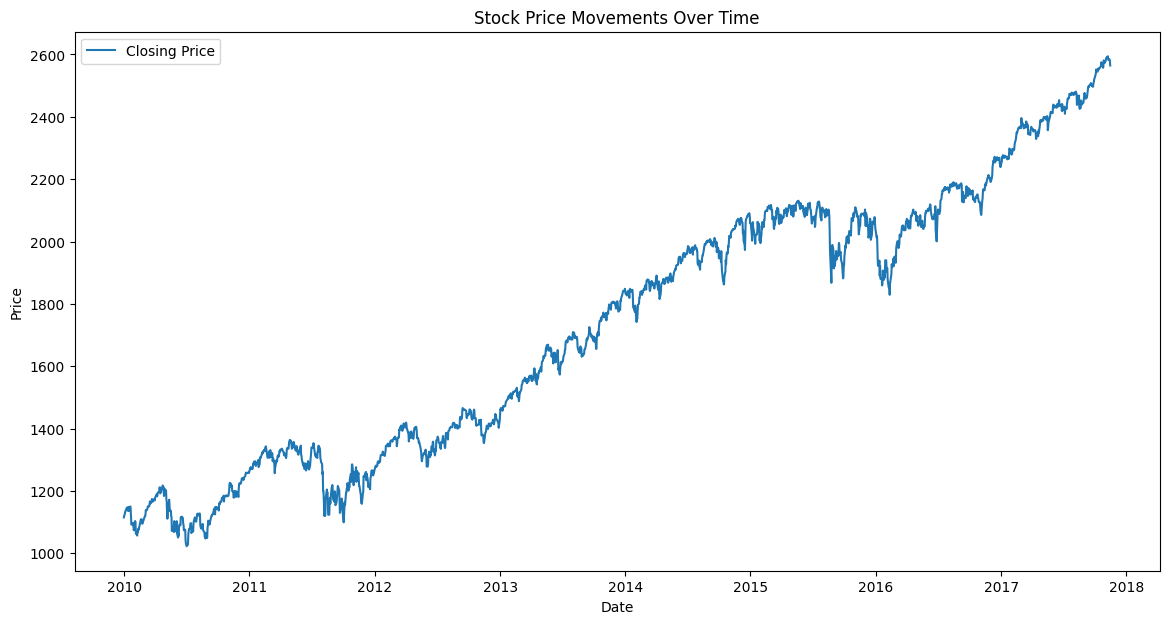

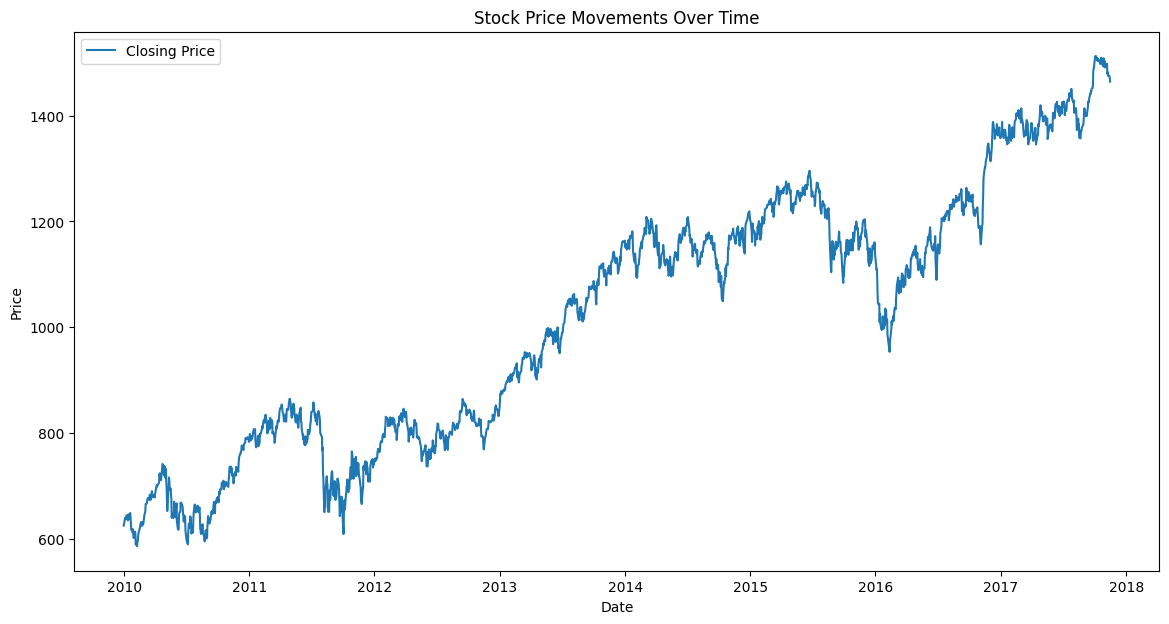

[None, None, None, None, None]

In [47]:

def plot_close_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    data.set_index('Date', inplace=True)
    
    plt.figure(figsize=(14, 7))
    plt.plot(data['Close'], label='Closing Price')
    plt.title('Stock Price Movements Over Time')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
[plot_close_data(df) for df in dfs_list]

plot all of the close prices , (normalized) 

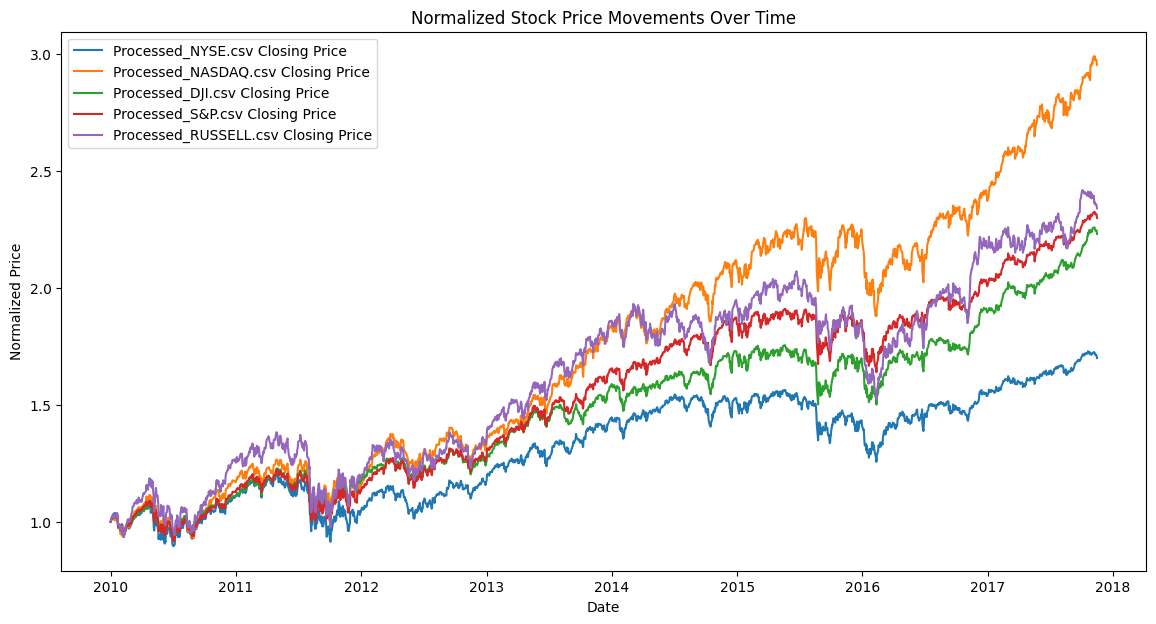

In [52]:
# show all over each other 

plt.figure(figsize=(14, 7))

for df, stock_name in zip(dfs_list, data_set):
    
    # Normalize the closing prices to start at 1
    normalized_close = df['Close'] / df.iloc[0]['Close']
    
    plt.plot(normalized_close, label=f'{stock_name} Closing Price')

plt.title('Normalized Stock Price Movements Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.legend()
plt.show()

## Correlation Analysis
Explore the relationship between variables.


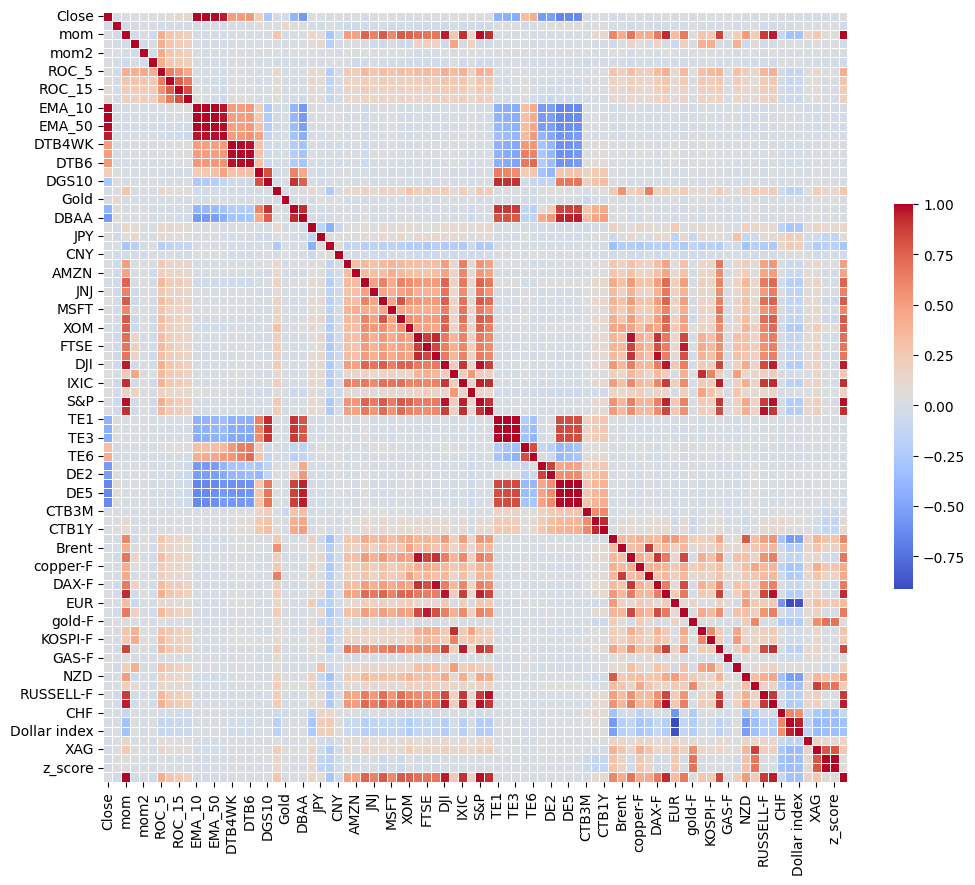

Most Correlated Features:

XAU      z_score    1.000000
Returns  mom        1.000000
mom      Returns    1.000000
z_score  XAU        1.000000
EMA_20   EMA_10     0.999164
EMA_10   EMA_20     0.999164
DE5      DE6        0.998567
DE6      DE5        0.998567
DE4      DE5        0.998223
DE5      DE4        0.998223
TE2      TE1        0.997752
TE1      TE2        0.997752
Close    EMA_10     0.997534
EMA_10   Close      0.997534
TE3      TE2        0.997500
TE2      TE3        0.997500
EMA_20   EMA_50     0.997283
EMA_50   EMA_20     0.997283
DE4      DE6        0.995557
DE6      DE4        0.995557
dtype: float64


In [70]:
# Show correlation between all features
def get_corr(data):
    numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

    corr_matrix = data[numerical_columns].corr()
    
    plt.figure(figsize=(12, 10))
    
    sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', linewidths=.5, cbar_kws={"shrink": .5}, annot=False)
    
    # Show the plot
    plt.show()

    # get high corr features 
    corr_pairs = corr_matrix.unstack().sort_values(kind="quicksort", ascending=False)
    strong_pairs = corr_pairs[(abs(corr_pairs) > 0.8) & (abs(corr_pairs) < 1)]
    
    # Print the highly correlated pairs
    print("Most Correlated Features:\n")
    print(strong_pairs.head(20))

    
get_corr(dfs_list[0])

## Missing Values Handling
- Strategies for dealing with missing data: Imputation, removal, or interpolation, especially important for time series data like stock prices.

Missing values pct for each feature

| col | missing_count  | missing_percentage |
|--------------------|-----|-------------------|
| CAD                | 483 |           24.344758 |
| JPY                | 479 |           24.143145 |
| CNY                | 479 |           24.143145 |
| GBP                | 478 |           24.092742 |
| SSEC               | 238 |           11.995968 |
| EMA_200            | 199 |           10.030242 |
| HSI                | 170 |            8.568548 |
| KOSPI-F            | 79 |            3.981855 |
| HSI-F              | 75 |            3.780242 |
| FTSE               | 71 |            3.578629 |
| GDAXI              | 67 |            3.377016 |
| EMA_50             | 49 |            2.469758 |
| FCHI               | 40 |            2.016129 |
| ROC_20             | 20 |            1.008065 |
| EMA_20             | 19 |            0.957661 |
| ROC_15             | 15 |            0.756048 |
| ROC_10             | 10 |            0.504032 |
| EMA_10             |  9 |            0.453629 |
| FTSE-F             |  6 |            0.302419 |
| ROC_5              |  5 |            0.252016 |

CAD, JPY, CNY,GBP

Longest null sequence in CAD = 4


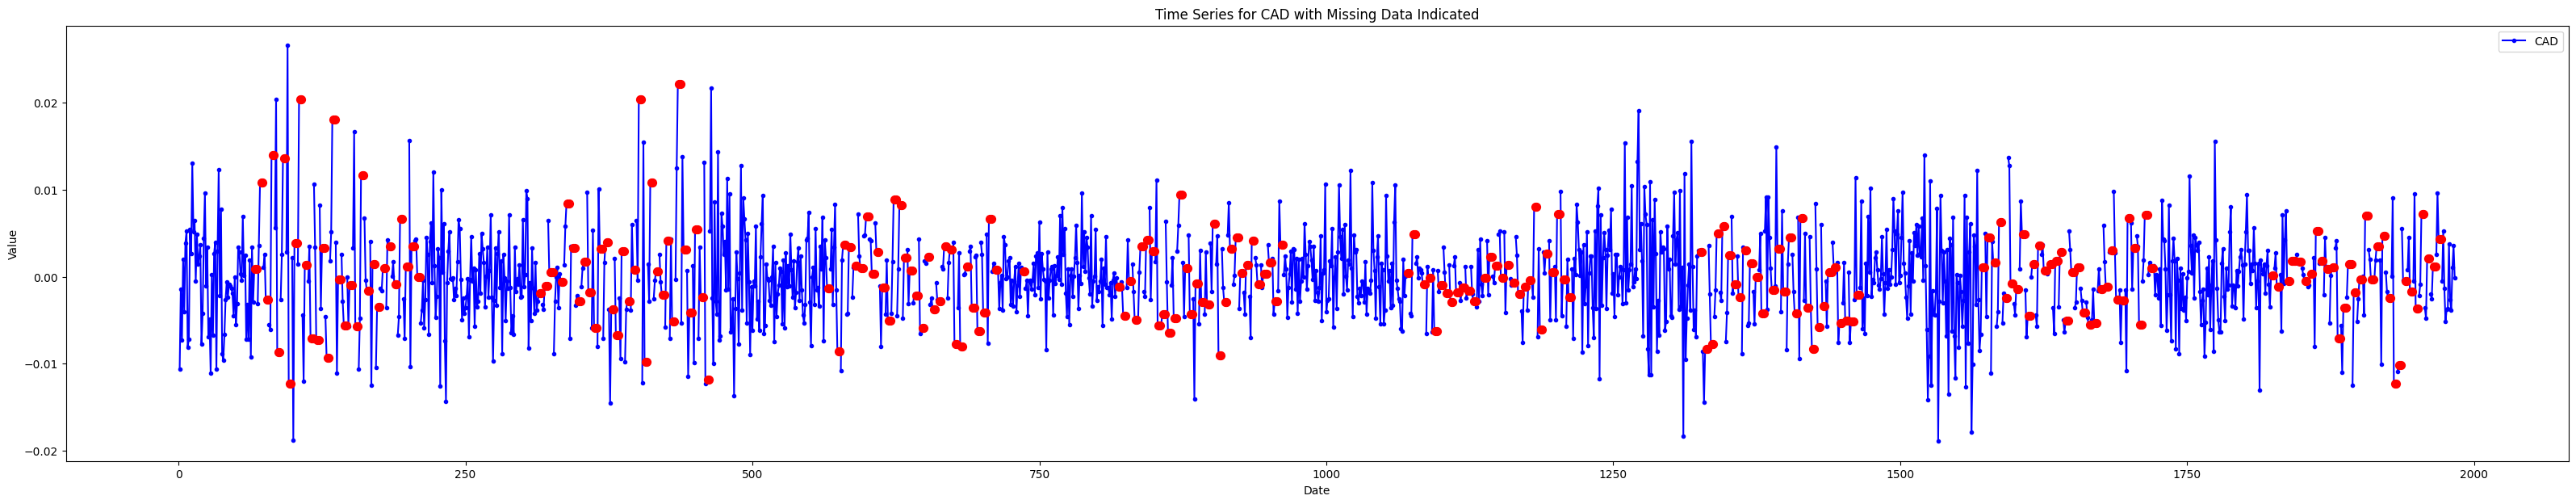

Longest null sequence in JPY = 3


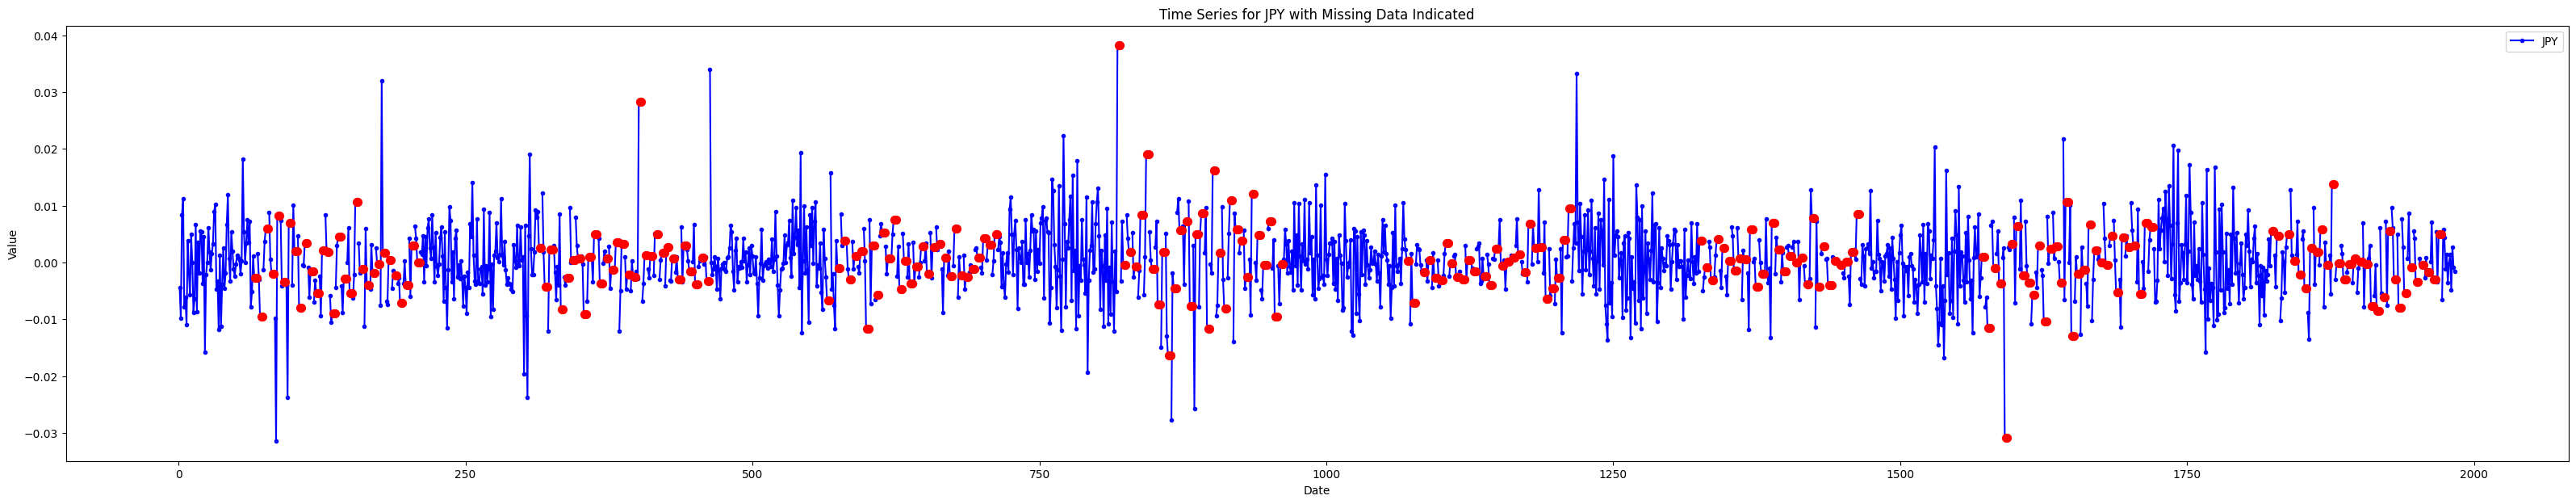

Longest null sequence in CNY = 3


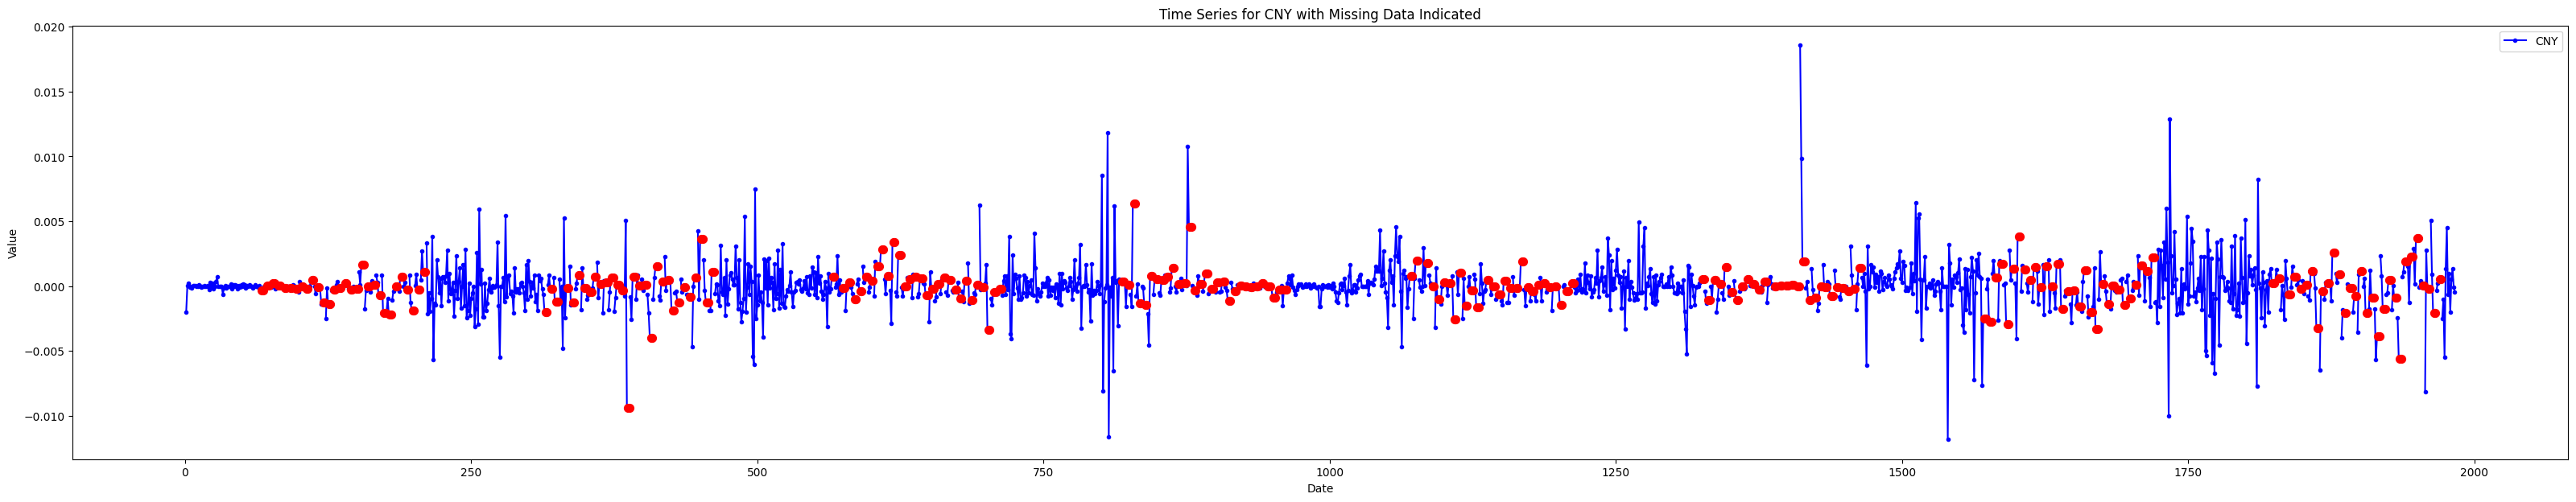

Longest null sequence in GBP = 3


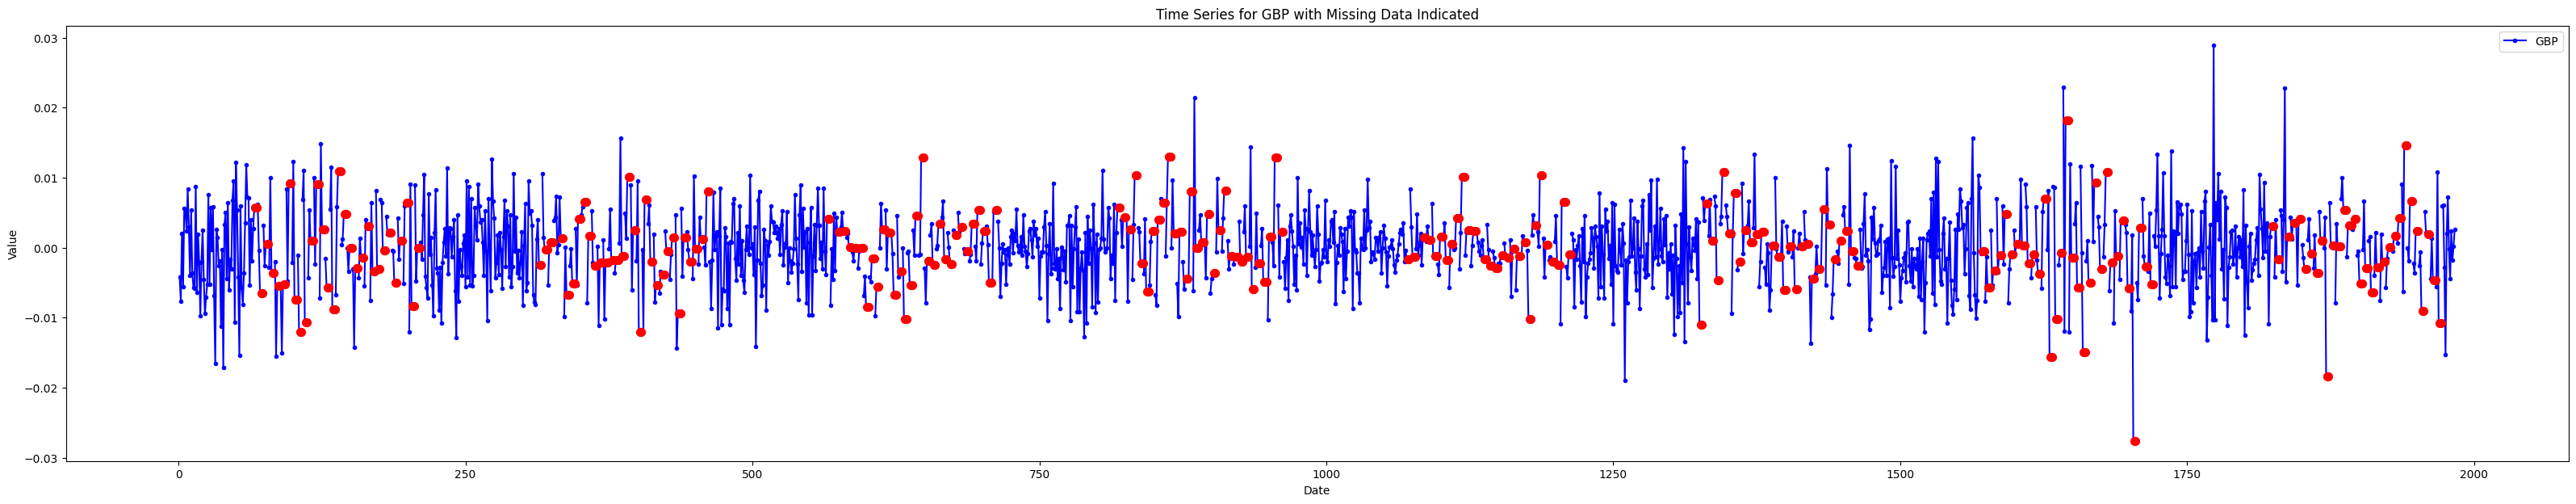

In [106]:
# CAD, JPY, CNY,GBP Analiysis
def plot_with_missing(data, col):
    plt.figure(figsize=(40, 7))
    
    # Plot the time series data
    plt.plot(data.index, data[col], label=f'{col}', color='blue', marker='o', markersize=3)
    
    # Identify the missing data points
    missing = data[col].isnull()
    
    longest_null_sequence = 0
    current_sequence = 0
    
    # Iterate over the entire series to find the longest sequence of consecutive nulls
    for mi in range(len(data[col])):
        if missing.iloc[mi]:  # If the value is NaN
            current_sequence += 1
            longest_null_sequence = max(longest_null_sequence, current_sequence)
        else:
            current_sequence = 0  # Reset the current sequence
        
        # Plot the missing data as a red dot at the last valid value before the gap
        if mi != 0 and missing.iloc[mi]:  
            last_valid_index = mi - 1
            while last_valid_index > 0 and missing.iloc[last_valid_index]:
                last_valid_index -= 1
            plt.scatter(data.index[mi], data[col].iloc[last_valid_index], color='red', s=50, zorder=5)
            
    print(f"Longest null sequence in {col} = {longest_null_sequence}")
    
    plt.title(f'Time Series for {col} with Missing Data Indicated')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()
for col in ['CAD', 'JPY', 'CNY', 'GBP']:
    plot_with_missing(dfs_list[0], col)

As we can see they all missing vlaues , in the same period of time 
one way we can solve that by filling the null values with the last value before.

In [238]:
dfs_list_processed = []

for df in dfs_list:
    # Create a copy of the dataframe to avoid modifying the original
    new_df = df.copy()
    
    # Apply forward fill to each column
    for col in ['CAD', 'JPY', 'CNY', 'GBP']:
        new_df[col].fillna(method='ffill', inplace=True)
    
    # Append the processed copy to the new list
    dfs_list_processed.append(new_df)

/tmp/ipykernel_378161/3433463649.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  new_df[col].fillna(method='ffill', inplace=True)


Longest null sequence in CAD = 1


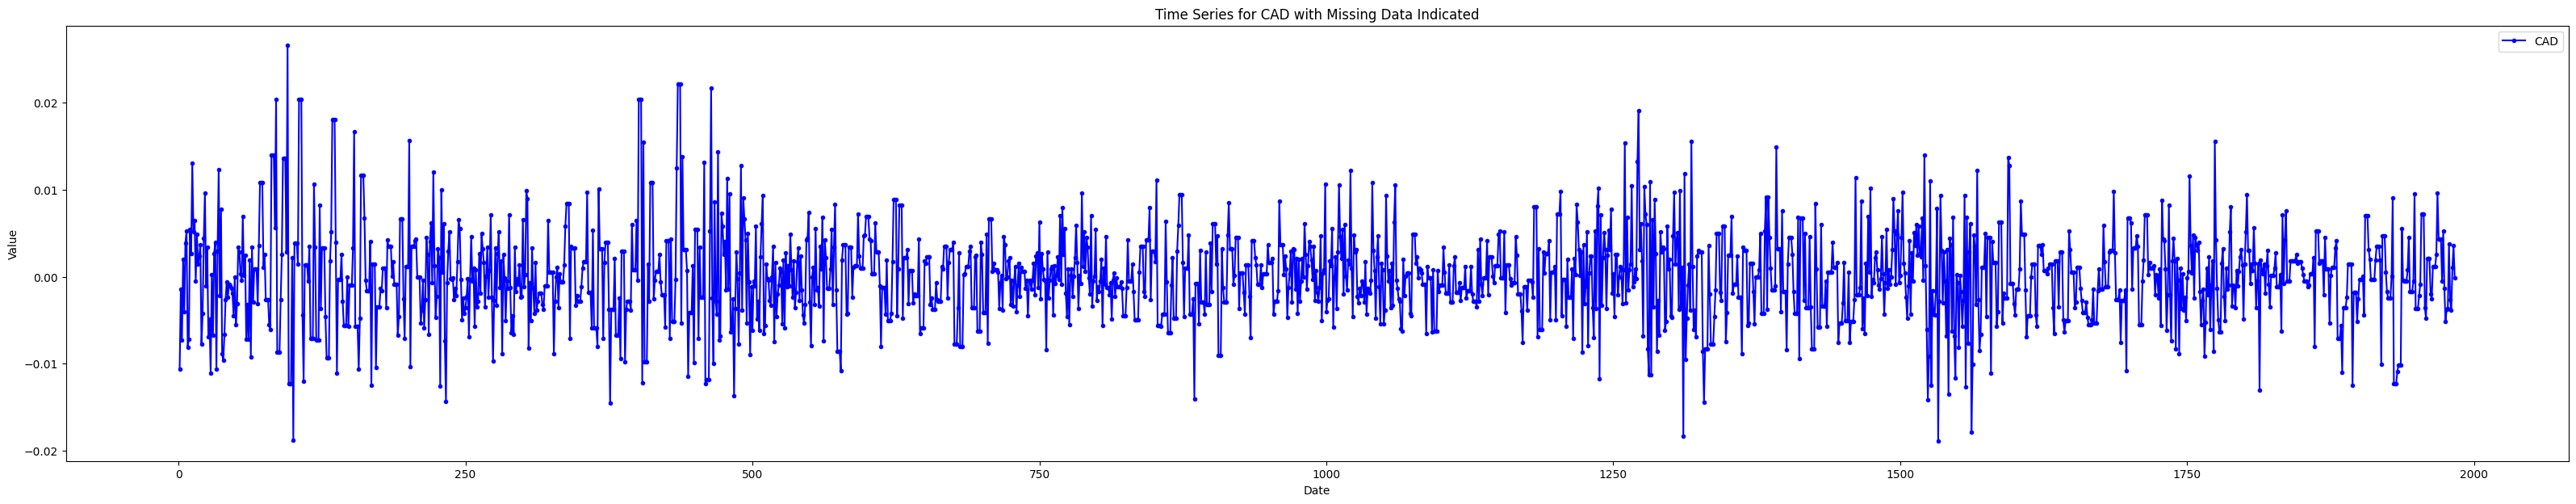

Longest null sequence in JPY = 1


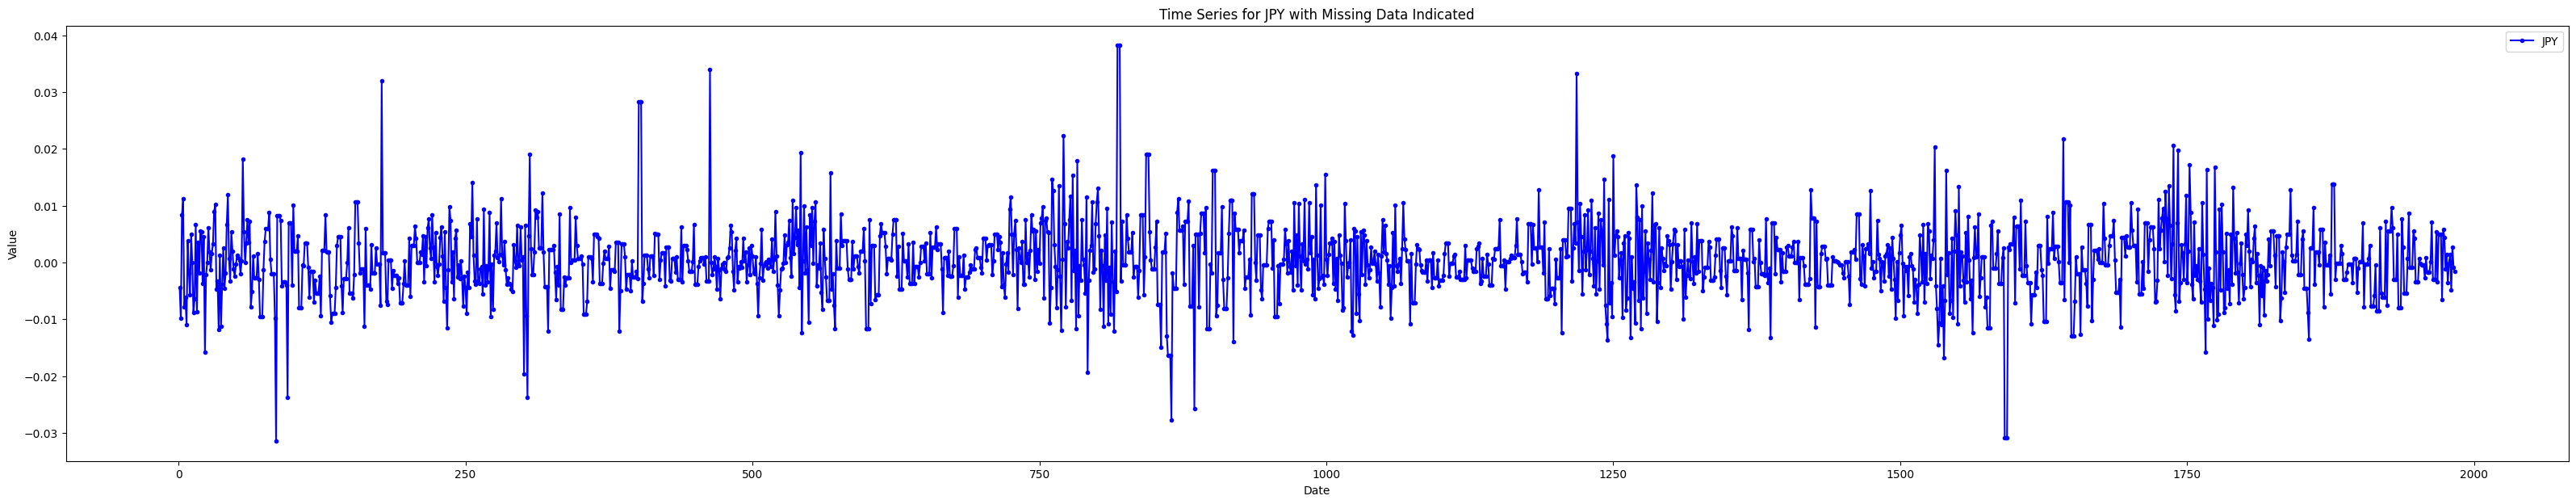

Longest null sequence in CNY = 1


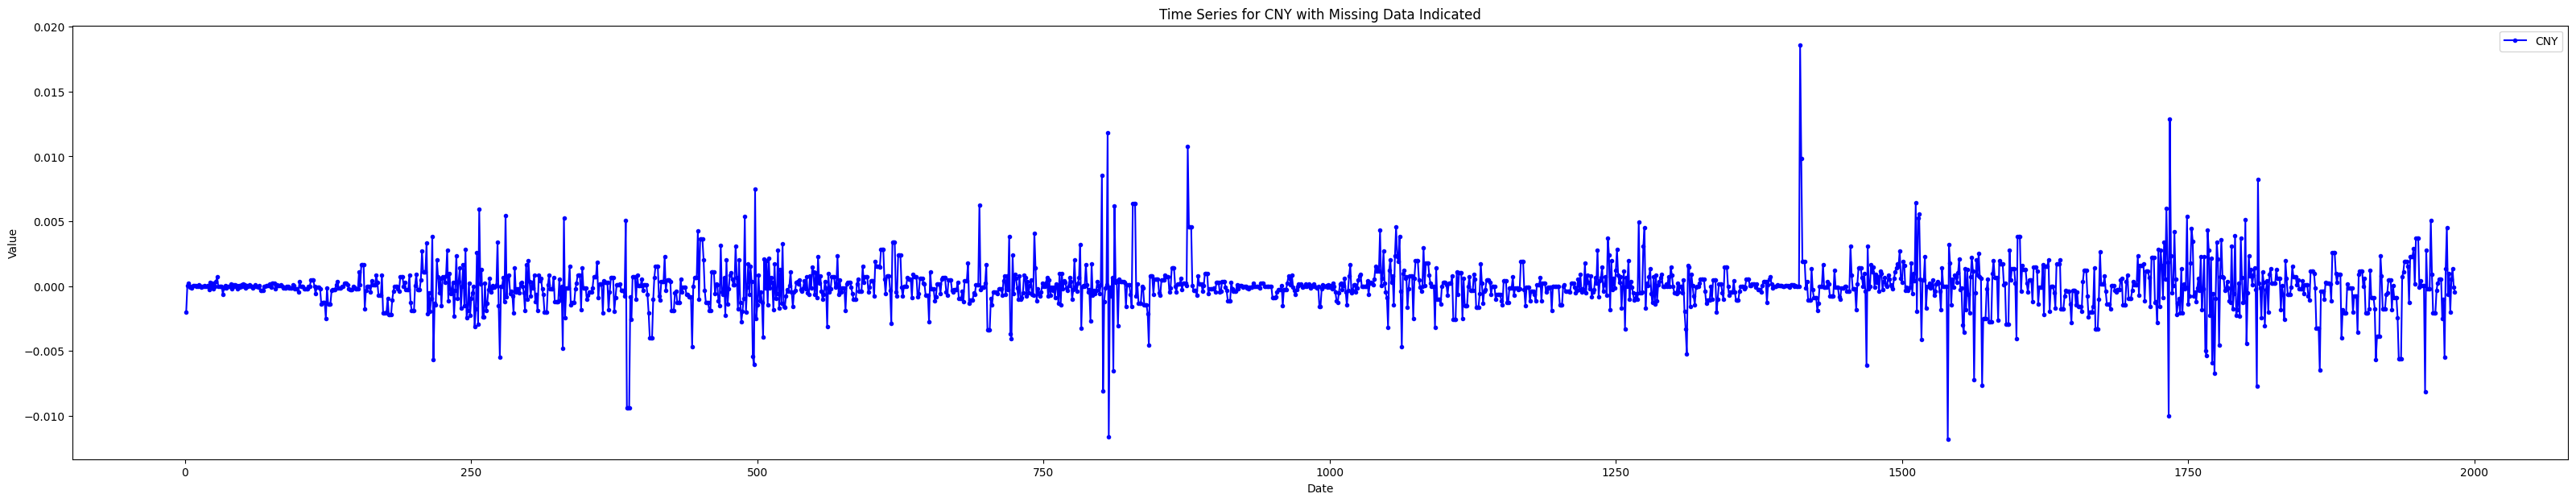

Longest null sequence in GBP = 1


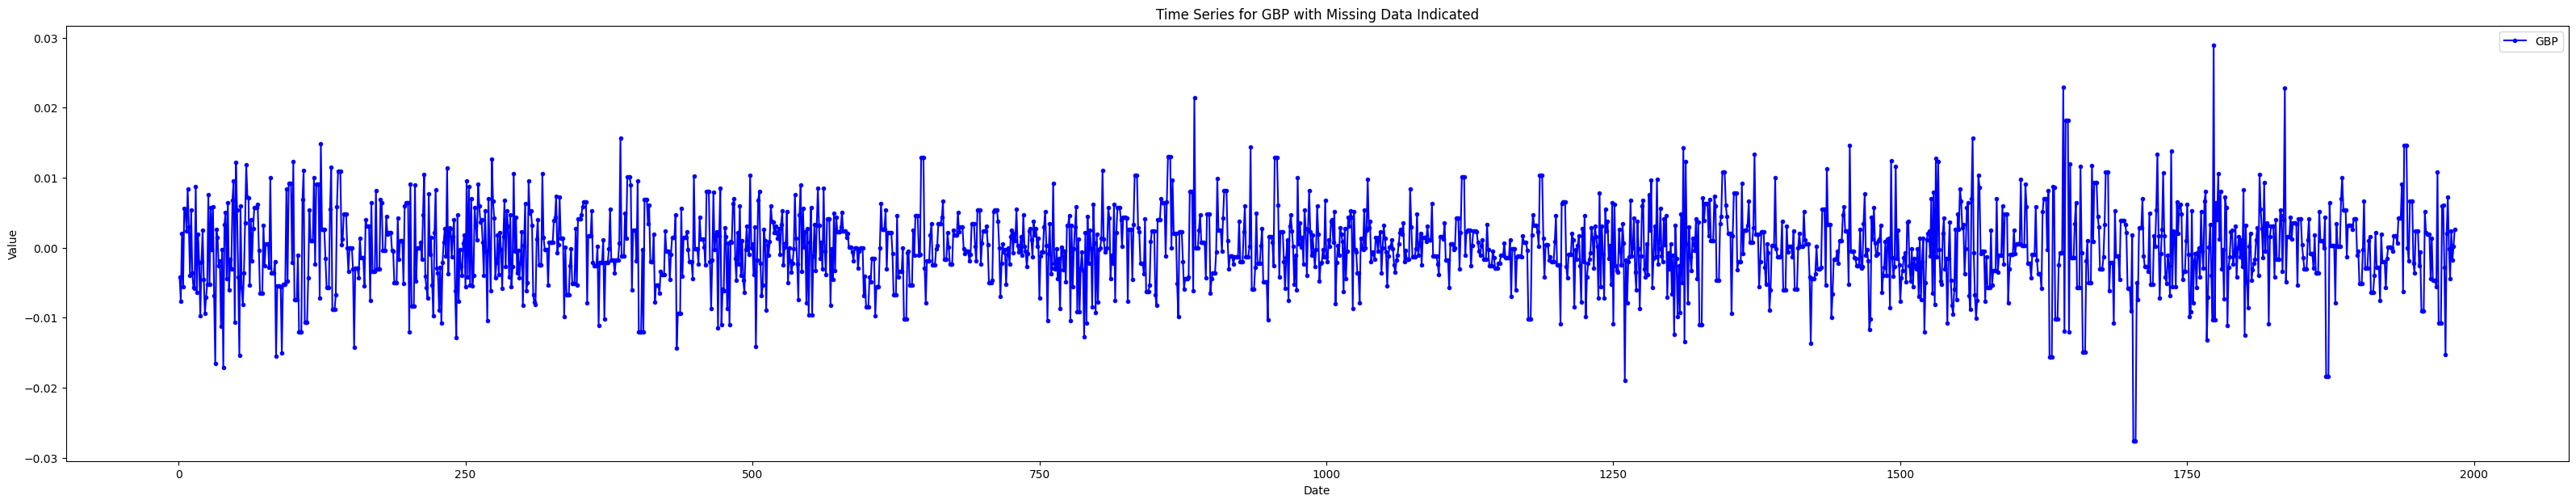

In [151]:
for col in ['CAD', 'JPY', 'CNY', 'GBP']:
    plot_with_missing(dfs_list_processed[1], col)

SSEC

Longest null sequence in SSEC = 57


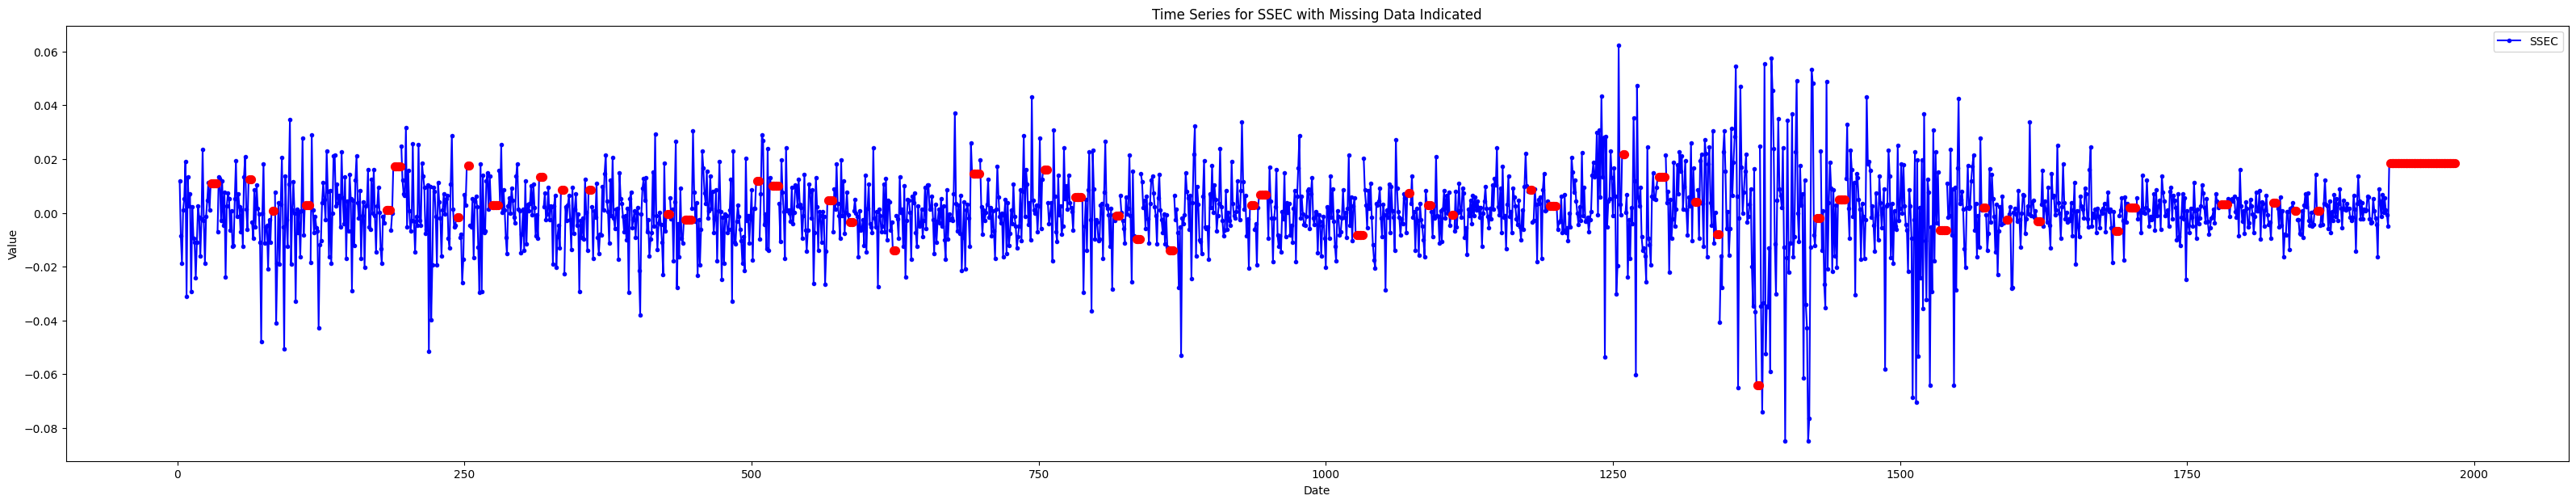

Longest null sequence in SSEC = 57


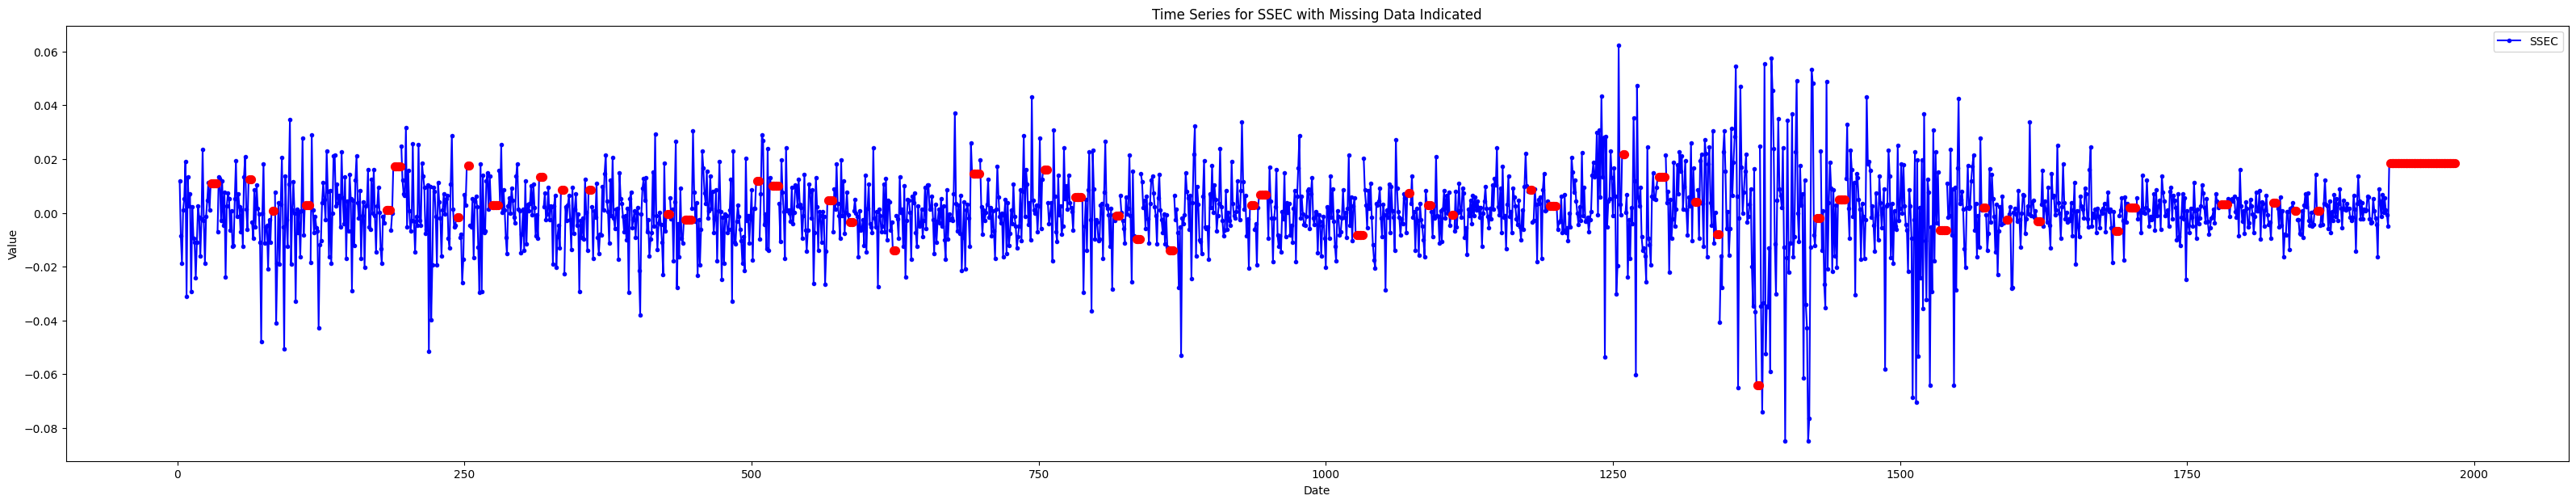

Longest null sequence in SSEC = 57


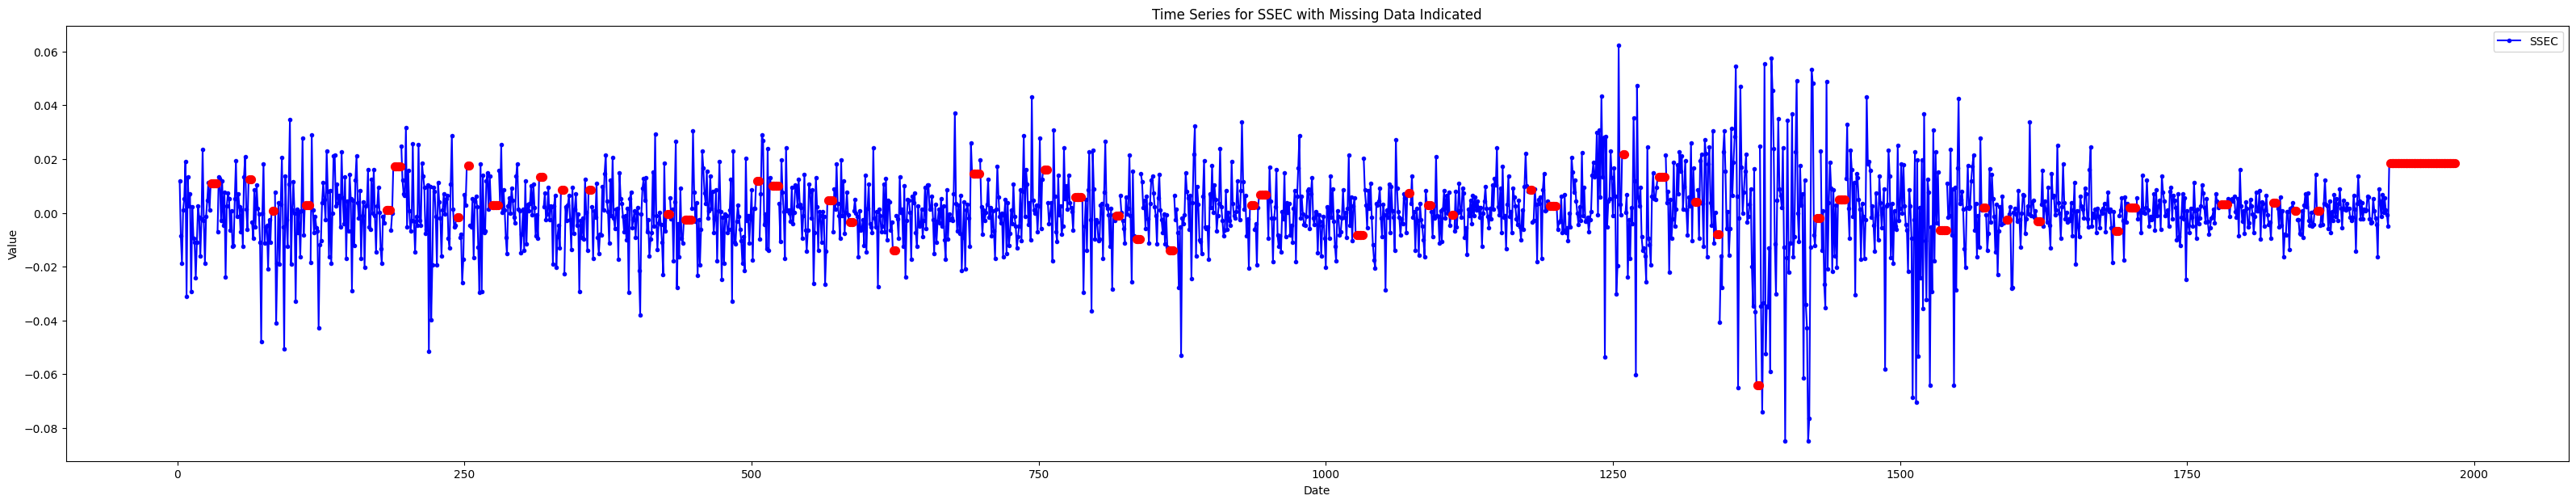

Longest null sequence in SSEC = 57


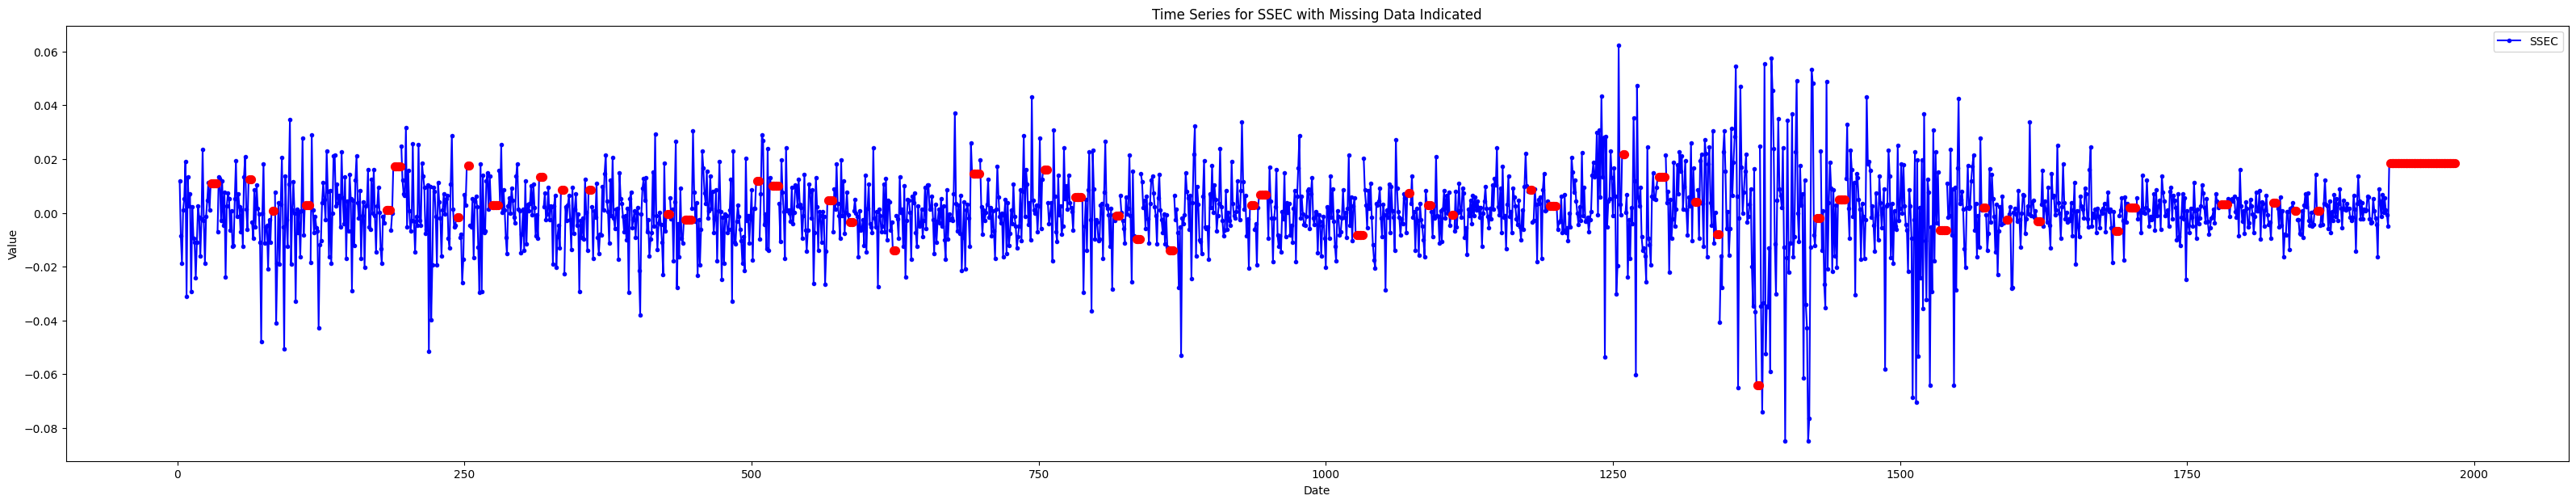

Longest null sequence in SSEC = 57


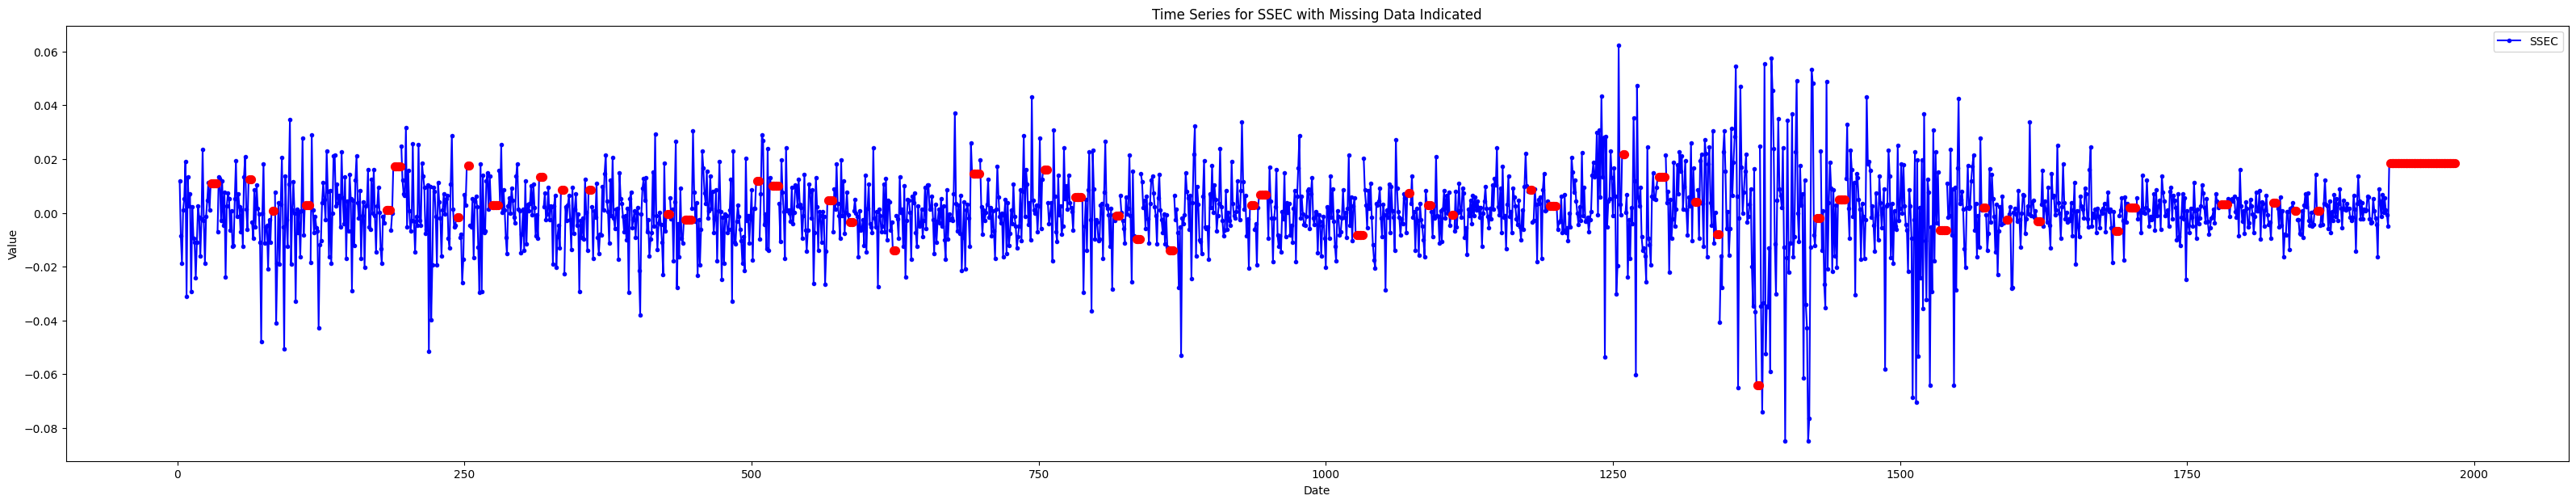

In [152]:
for df in dfs_list:
   plot_with_missing(df, 'SSEC')


Most of the missing data are in the end. 

We should drop the last 57 row

In [239]:
for i in range(len(dfs_list_processed)):
    dfs_list_processed[i] =  dfs_list_processed[i].iloc[:-57]

In [240]:
dfs_list_processed[0]['SSEC'].tail()

1922    0.005562
1923    0.001010
1924   -0.000766
1925   -0.004925
1926    0.018343
Name: SSEC, dtype: float64

Also we will apply forward fill 

In [241]:

for i in range(len(dfs_list_processed)):
    dfs_list_processed[i]['SSEC'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_378161/656694868.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dfs_list_processed[i]['SSEC'].fillna(method='ffill', inplace=True)
/tmp/ipykernel_378161/656694868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs_list_processed[i]['SSEC'].fillna(method='ffill', inplace=True)


Longest null sequence in SSEC = 2


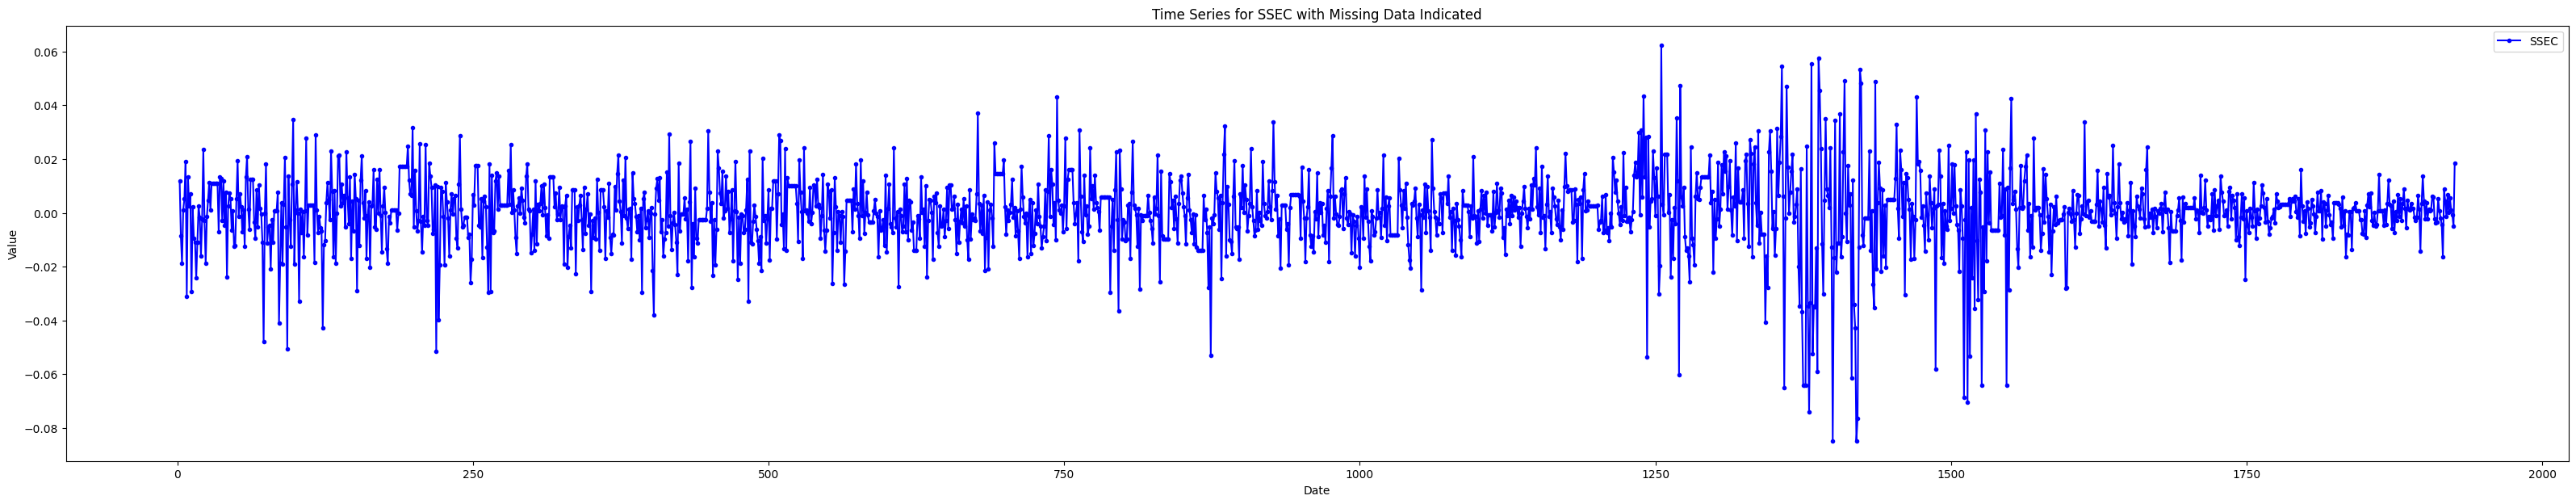

Longest null sequence in SSEC = 2


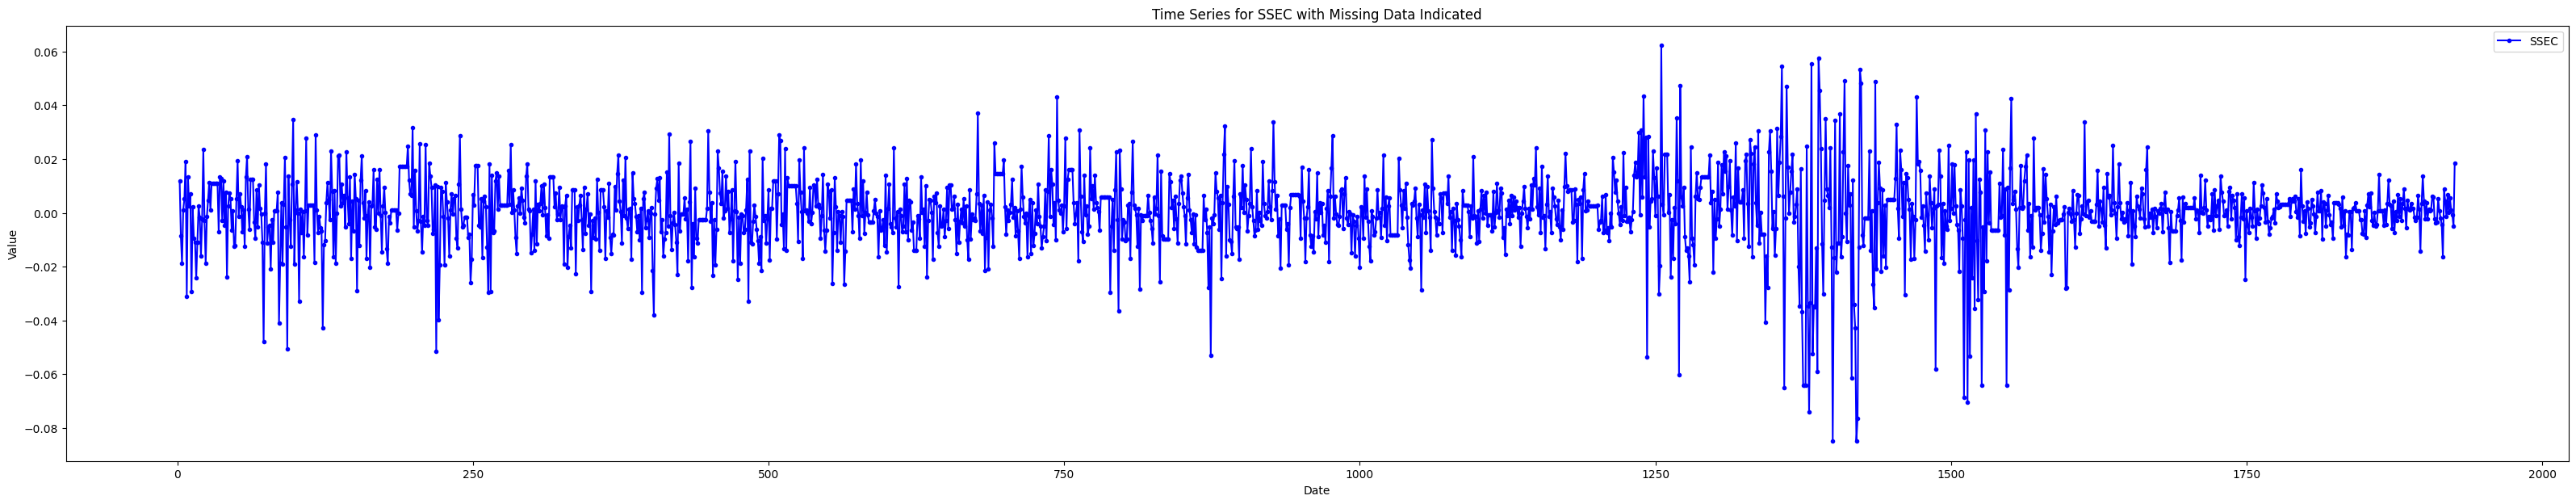

Longest null sequence in SSEC = 2


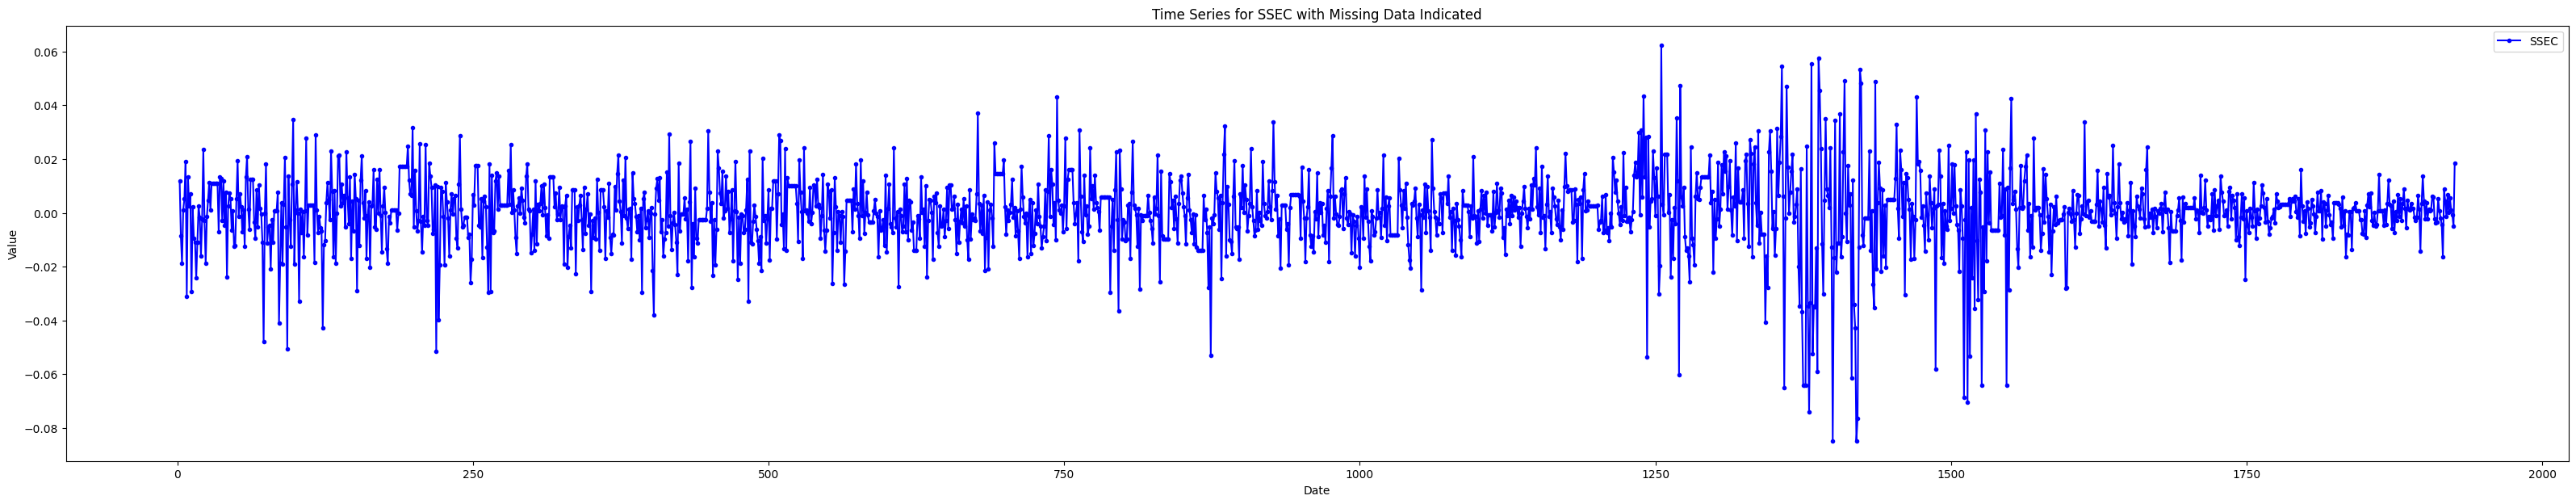

Longest null sequence in SSEC = 2


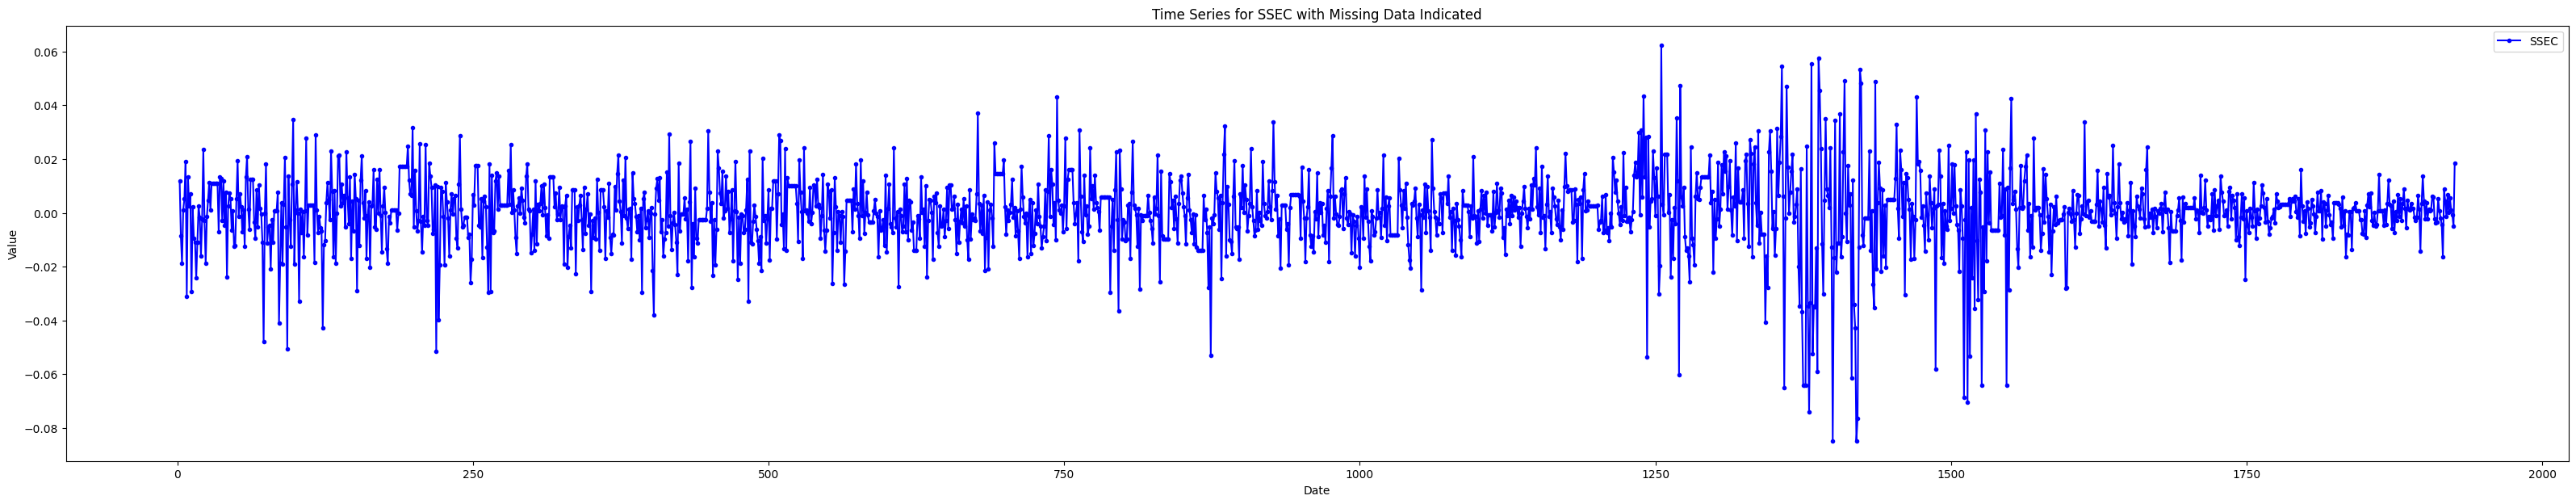

Longest null sequence in SSEC = 2


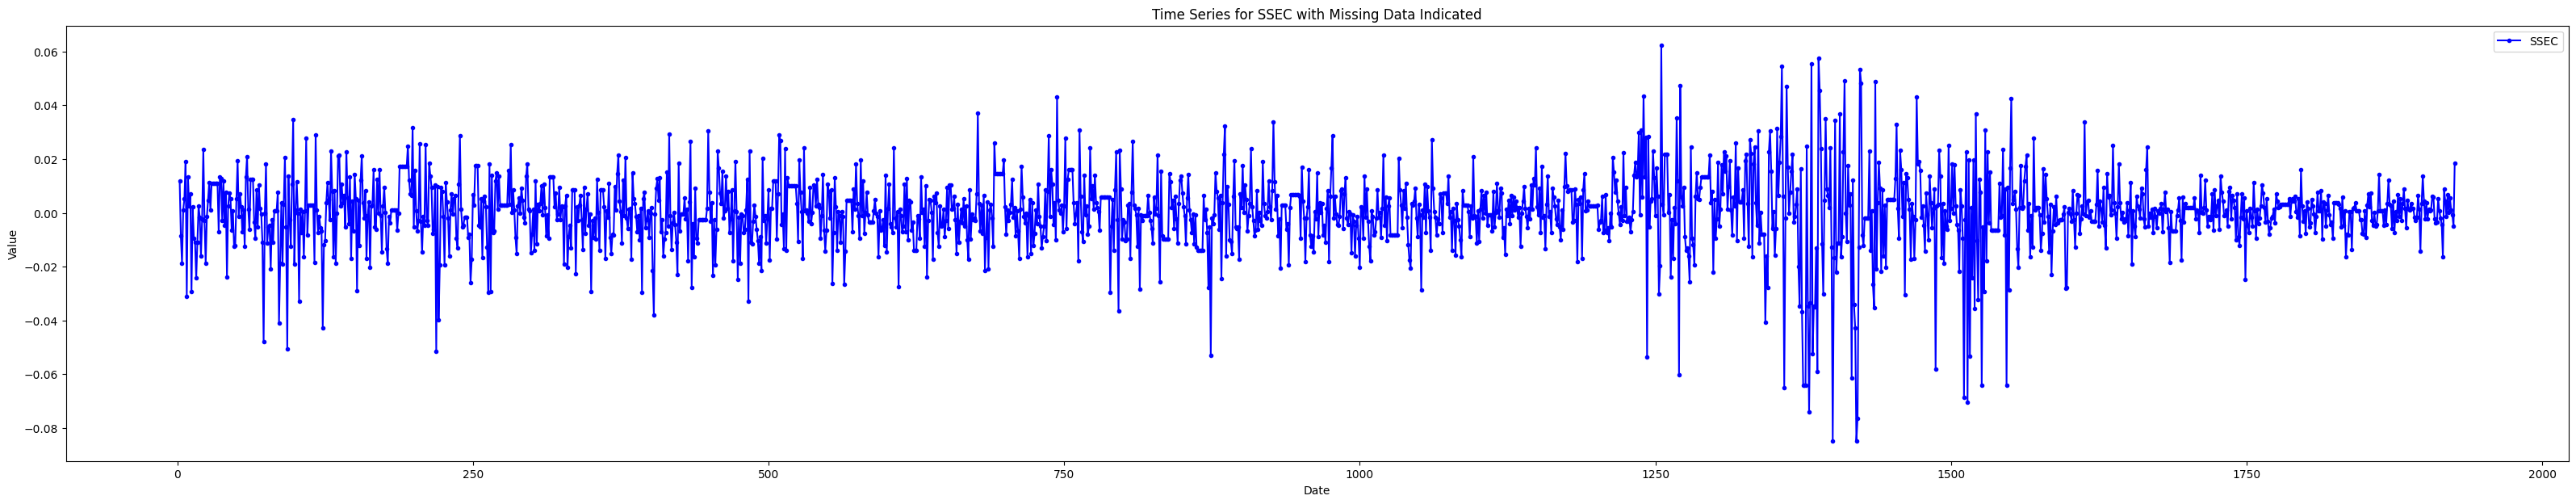

In [242]:
for df in dfs_list_processed:
   plot_with_missing(df, 'SSEC')

for the other feature , we can drop the nan values 

In [243]:
for df in dfs_list_processed:
    df.dropna(inplace=True)

/tmp/ipykernel_378161/3125562920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [244]:
dfs_list_processed[0].isnull().sum().sum()

0

### Match features accross dataframes

get the commen cols

In [245]:
common_columns = set(dfs_list_processed[0].columns)
for df in dfs_list_processed[1:]:
    common_columns = common_columns.intersection(set(df.columns))

common_columns_list = list(common_columns)
common_columns_list

['FTSE-F',
 'DTB6',
 'S&P-F',
 'EMA_50',
 'EMA_20',
 'AMZN',
 'HSI-F',
 'Volume',
 'FTSE',
 'AAPL',
 'DBAA',
 'NZD',
 'Date',
 'WFC',
 'copper-F',
 'MSFT',
 'GDAXI',
 'KOSPI-F',
 'RUSSELL-F',
 'CAD',
 'FCHI',
 'TE1',
 'XAU',
 'gold-F',
 'DAX-F',
 'silver-F',
 'TE2',
 'CNY',
 'CHF',
 'DGS5',
 'XAG',
 'Oil',
 'CTB6M',
 'NASDAQ-F',
 'DAAA',
 'CTB1Y',
 'TE6',
 'JNJ',
 'DJI-F',
 'CTB3M',
 'GBP',
 'ROC_20',
 'ROC_15',
 'mom2',
 'GE',
 'DE4',
 'Dollar index',
 'AUD',
 'DE2',
 'mom3',
 'TE5',
 'wheat-F',
 'TE3',
 'ROC_10',
 'ROC_5',
 'Gold',
 'mom',
 'EMA_200',
 'WIT-oil',
 'Close',
 'DE6',
 'EMA_10',
 'GAS-F',
 'DE5',
 'CAC-F',
 'JPY',
 'DTB4WK',
 'DTB3',
 'Brent',
 'Dollar index-F',
 'JPM',
 'Name',
 'EUR',
 'Nikkei-F',
 'SSEC',
 'DE1',
 'DGS10',
 'XOM',
 'HSI',
 'mom1']

In [246]:
len(common_columns_list)

80

- one way to accept all the features and change the name
- other way is to get only the common features

In [247]:
# if we used other cols from other dataframe
# it will make issue when we run the model in a new data, bc thtese data points might not exisist
# one way is to fill them with zeros

In [248]:
all_columns = set().union(*(df.columns for df in dfs_list_processed))

In [249]:
len(all_columns)

86

In [250]:
for i, df in enumerate(dfs_list_processed):
    # Add missing columns and fill them with zeros
    missing_cols = all_columns - set(df.columns)
    for col in missing_cols:
        df[col] = 0
    

/tmp/ipykernel_378161/4201847852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = 0
/tmp/ipykernel_378161/4201847852.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = 0


In [251]:
len(dfs_list_processed[0].columns)

86

In [252]:
dfs_list_processed[0].head()

Date        Close    Volume       mom      mom1      mom2  \
199  2010-10-15  7520.600098  0.152030 -0.003444 -0.001972  0.009597   
200  2010-10-18  7571.100098 -0.222686  0.006715 -0.003444 -0.001972   
201  2010-10-19  7423.649902  0.258440 -0.019475  0.006715 -0.003444   
202  2010-10-20  7523.810059 -0.102184  0.013492 -0.019475  0.006715   
203  2010-10-21  7515.669922 -0.080036 -0.001082  0.013492 -0.019475   

         mom3     ROC_5    ROC_10    ROC_15  ...  RUSSELL-F  S&P-F   CHF  \
199  0.001419  0.564025  2.517615  3.007244  ...      -0.58   0.13  0.35   
200  0.009597  1.231317  4.105453  4.236738  ...       0.61   0.28  0.07   
201 -0.001972 -0.880822 -0.141647  1.550275  ...      -1.74  -1.23  1.27   
202 -0.003444 -0.498445  1.013381  3.075633  ...       0.91   0.94 -1.01   
203  0.006715 -0.409720  1.221011  3.222055  ...      -0.53   0.09  0.64   

     Dollar index-F  Dollar index  wheat-F   XAG   XAU  GSPC  NYSE  
199            0.51          0.51    -0.30 -1.30 -0.88     0     0  
200           -0.17         -0.14    -2.05  0.25  0.05     0     0  
201            1.66          1.62    -2.58 -4.14 -2.51     0     0  
202           -1.29         -1.29     2.52  2.44  0.82     0     0  
203            0.28          0.32    -3.09 -3.26 -1.55     0     0  

[5 rows x 86 columns]

### Non numaric features

In [253]:
unique_names = pd.unique(pd.concat([df['Name'] for df in dfs_list_processed]))
unique_names

array(['NYA', 'NASDAQ', 'DJI', 'S&P', 'RUT'], dtype=object)

- One way is to drop this col
- Other way is to keep it and use it

In [211]:
# we gonna drop it 

In [254]:
for df in dfs_list_processed:
    df.drop(columns=['Name'], inplace=True)

/tmp/ipykernel_378161/1902952229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Name'], inplace=True)


### Target column

here we gonna add the target column which is y , 1 if Close(t+1) > Close(t) , else 0 

In [290]:
for df in dfs_list_processed:
    df['Y'] = (df['Close'].shift(-1) > df['Close']).astype(int)

/tmp/ipykernel_378161/2626256356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'] = (df['Close'].shift(-1) > df['Close']).astype(int)


 ## Prepare Data

In [291]:
test_data = dfs_list_processed[0].copy()

In [292]:
test_data.head()

Date        Close    Volume       mom      mom1      mom2  \
199  2010-10-15  7520.600098  0.152030 -0.003444 -0.001972  0.009597   
200  2010-10-18  7571.100098 -0.222686  0.006715 -0.003444 -0.001972   
201  2010-10-19  7423.649902  0.258440 -0.019475  0.006715 -0.003444   
202  2010-10-20  7523.810059 -0.102184  0.013492 -0.019475  0.006715   
203  2010-10-21  7515.669922 -0.080036 -0.001082  0.013492 -0.019475   

         mom3     ROC_5    ROC_10    ROC_15  ...  S&P-F   CHF  Dollar index-F  \
199  0.001419  0.564025  2.517615  3.007244  ...   0.13  0.35            0.51   
200  0.009597  1.231317  4.105453  4.236738  ...   0.28  0.07           -0.17   
201 -0.001972 -0.880822 -0.141647  1.550275  ...  -1.23  1.27            1.66   
202 -0.003444 -0.498445  1.013381  3.075633  ...   0.94 -1.01           -1.29   
203  0.006715 -0.409720  1.221011  3.222055  ...   0.09  0.64            0.28   

     Dollar index  wheat-F   XAG   XAU  GSPC  NYSE  Y  
199          0.51    -0.30 -1.30 -0.88     0     0  1  
200         -0.14    -2.05  0.25  0.05     0     0  0  
201          1.62    -2.58 -4.14 -2.51     0     0  1  
202         -1.29     2.52  2.44  0.82     0     0  0  
203          0.32    -3.09 -3.26 -1.55     0     0  1  

[5 rows x 86 columns]

In [294]:
test_data.drop(columns='Date',inplace=True)

In [287]:
# Y = test_data['Y'] 
# test_data.drop(columns='Y',inplace=True)

# X_train, X_test = train_test_split(test_data, shuffle=False)

# scalers = {column: StandardScaler() for column in X_train.columns}

# # Fit the scaler on the training data and transform both training and test data
# for column, scaler in scalers.items():
#     X_train[column] = scaler.fit_transform(X_train[[column]])
#     X_test[column] = scaler.transform(X_test[[column]])


In [309]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error


In [305]:
X = test_data.drop(['Close', 'Y'], axis=1)


# Separate the features (X) from the target (y)
y = test_data['Y']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for feature reduction, if needed
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['Target'] = y.values  # Add the target variable back

In [306]:
df_pca

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.173204 -4.140051  0.992070 -1.869546 -1.236837  0.112420 -2.024770   
1    -2.947804 -3.878511  1.299024  0.272738  1.201797 -1.036300 -2.522909   
2     8.015656 -3.909991  1.056814 -7.004976 -2.100622 -0.097199  0.329300   
3    -5.351712 -3.500201  1.936907  5.401383  1.776867 -0.995902 -1.755704   
4    -0.310765 -4.091562  0.816497 -4.373468 -0.762917 -0.421268 -0.459966   
...        ...       ...       ...       ...       ...       ...       ...   
1492  5.615289  7.273020 -2.882987  1.041140 -1.762032 -1.338541  1.459327   
1493  1.060312  7.225731 -3.164551  1.581796  2.027055 -1.962177  0.046860   
1494  0.722145  7.456038 -2.940681  1.407637  0.723707 -1.163841  0.740759   
1495 -3.417645  7.106155 -3.584640 -3.125318  0.592648 -1.349510  1.402746   
1496 -0.848218  7.417647 -2.667755  2.096413 -1.161623 -1.012770  0.129065   

           PC8       PC9      PC10  ...      PC30      PC31      PC32  \
0     0.478184 -1.926163  0.741003  ...  0.038104  1.930376  1.591095   
1    -0.968568  1.294292  2.109062  ...  0.612214 -0.675172 -0.038451   
2     0.532460 -0.062843  2.774494  ... -0.133562 -0.949401 -0.165105   
3     1.369993  1.618662  0.016295  ... -0.051205  0.623463 -0.808022   
4     2.183291  0.223572  2.045650  ... -0.722966  0.093541 -0.312031   
...        ...       ...       ...  ...       ...       ...       ...   
1492 -0.364454  1.420855  1.414042  ...  0.282474  0.022838 -0.008814   
1493 -0.983180  1.444599  0.228488  ...  0.656514 -0.153950 -0.451691   
1494  1.658796 -1.278908  0.965080  ... -0.201454  0.245810 -0.799038   
1495 -0.504792 -1.043837  1.328157  ... -0.727884 -0.032732 -1.053596   
1496  1.139946  0.062270 -0.233092  ... -0.474809 -0.509674 -0.908802   

          PC33      PC34      PC35      PC36      PC37      PC38  Target  
0    -1.091998 -0.975441  1.575048 -0.397085 -0.334709  0.219473       1  
1    -0.211983  1.110521 -0.406655 -0.094725 -1.391587  1.786431       0  
2    -0.598696  0.498876  0.297716  0.795992  0.201564  0.313900       1  
3    -0.094291  0.663908 -0.433930 -1.478852 -0.577494  0.135028       0  
4     0.397859  0.339220 -0.392619  0.255203 -0.908277 -0.284930       1  
...        ...       ...       ...       ...       ...       ...     ...  
1492 -0.688629  0.274645  0.261207  0.092477 -0.774954 -0.046929       0  
1493 -0.735649  0.190210  0.523367  0.029758 -0.537456 -0.073660       1  
1494 -0.939973 -0.207455  0.209675  0.653045 -0.530399  0.360722       1  
1495 -0.084000  0.097625  0.313419  0.119000  0.136782  0.094115       1  
1496 -0.110024  0.424200  0.461336 -0.254543 -0.054401 -1.124228       0  

[1497 rows x 39 columns]

In [310]:


# Separate features and target
X_pca = df_pca.drop('Target', axis=1)
y = df_pca['Target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, shuffle=False)

# Train a logistic regression model as an example
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.48      0.21      0.29       136
           1       0.55      0.80      0.66       164

    accuracy                           0.54       300
   macro avg       0.51      0.51      0.47       300
weighted avg       0.52      0.54      0.49       300

[[ 29 107]
 [ 32 132]]


## Summary and Conclusions

In this notebook we did data analysis, cleaning, and visualtions

We cover also feature reduction using pca, which we will use later in the final code for the model pipline

in this case we dropped the Close col , and replace it with discrete Y value, however in the python code we will to model for both cases